In [1]:
from timeit import default_timer as timer
from datetime import timedelta

import time
import warnings
from ripser import ripser
import numpy as np
from numpy import inf
import matplotlib.pyplot as plt
from persim import plot_diagrams
import persim
import glob
from numpy import asarray
from PIL import Image
import os


from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import random
from sklearn.datasets import load_breast_cancer

from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm import SVC
import warnings

import umap

import pandas as pd

from scipy.spatial.distance import pdist, squareform
import stablerank.srank as sr

warnings.filterwarnings('ignore')

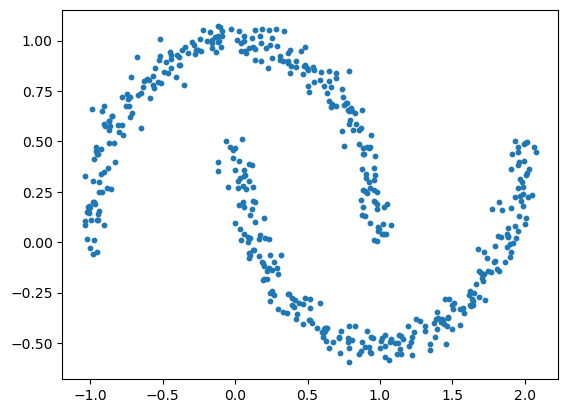

In [2]:
n_samples = 500
seed = 30
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
X,y=noisy_moons
plt.scatter(X[:, 0], X[:, 1],s=10)

In [3]:
def preparar_dataset(data,target,n_labeled=25):
  unos=np.where(target==1)[0]
  ceros=np.where(target==0)[0]

  datos_uno=np.array(data)[unos]
  datos_cero=np.array(data)[ceros]

  unos_valid=int((len(list(unos))-n_labeled)*0.2)
  ceros_valid=int((len(list(ceros))-n_labeled)*0.2)

  random.seed(15)
  indices_unos=random.sample(list(unos),n_labeled+unos_valid)

  random.seed(10)
  indices_ceros=random.sample(list(ceros),n_labeled+ceros_valid)


  puntos_unos=np.array(data)[indices_unos[0:n_labeled]]
  puntos_ceros=np.array(data)[indices_ceros[0:n_labeled]]

  puntos_unos_valid=np.array(data)[indices_unos[n_labeled:]]
  puntos_ceros_valid=np.array(data)[indices_ceros[n_labeled:]]

  unlabeled_unos=list(set(unos)-set(indices_unos))
  unlabeled_ceros=list(set(ceros)-set(indices_ceros))
  unlabeled=unlabeled_unos+unlabeled_ceros
  X_unlabeled_unos=np.array(data)[unlabeled_unos]
  X_unlabeled_ceros=np.array(data)[unlabeled_ceros]

  return (puntos_ceros,puntos_unos,X_unlabeled_ceros,X_unlabeled_unos,puntos_ceros_valid,puntos_unos_valid)

In [4]:
(ceros_toy,unos_toy,X_unlabeled_ceros,X_unlabeled_unos,puntos_ceros_valid,puntos_unos_valid)=preparar_dataset(X,y)

"#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00"

import matplotlib.pyplot as plt

x = range(100)
y = range(100,200)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x[:4], y[:4], s=10, c='b', marker="s", label='first')
ax1.scatter(x[40:],y[40:], s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left')
plt.show()

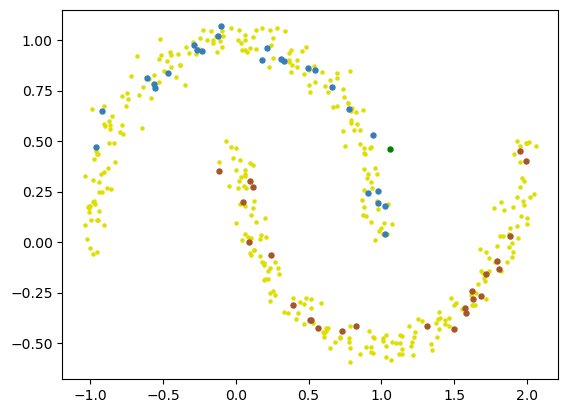

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

X_unlabeled=X_unlabeled_ceros+X_unlabeled_unos
ax1.scatter(X_unlabeled_ceros[:, 0], X_unlabeled_ceros[:, 1],s=5,color="#dede00")
ax1.scatter(X_unlabeled_unos[:, 0], X_unlabeled_unos[:, 1],s=5,color="#dede00")
ax1.scatter(ceros_toy[:, 0], ceros_toy[:, 1],s=13,color="#377eb8")
ax1.scatter(unos_toy[:, 0], unos_toy[:, 1],s=13,color="#a65628")
ax1.scatter(X_unlabeled[0,0],X_unlabeled[0,1],s=13,color="green")
plt.show()

In [6]:
X_unlabeled[0]

array([1.06197027, 0.45900354])

In [7]:
ceros_distances=squareform(pdist(ceros_toy,"euclidean"))
distance_ceros=sr.Distance(ceros_distances)
ceros_distances

array([[0.        , 0.32307745, 1.21554836, 1.12519322, 1.02759484,
        1.06753716, 0.41740786, 1.2071718 , 0.32787254, 0.49641178,
        0.84449099, 0.75384944, 0.15291634, 0.36588306, 0.64896727,
        0.47226735, 0.64468235, 0.75060455, 1.11319622, 0.79605561,
        0.44931137, 0.31503165, 0.1302731 , 0.98146694, 0.06989558],
       [0.32307745, 0.        , 1.00288557, 0.880668  , 1.33989828,
        1.37646602, 0.13749057, 1.50936665, 0.04833618, 0.81808129,
        1.16709658, 0.50663906, 0.46906107, 0.68339716, 0.39271676,
        0.17355941, 0.96775975, 0.50997734, 1.42346465, 0.53543941,
        0.16351926, 0.63221971, 0.44518983, 1.29008664, 0.33754992],
       [1.21554836, 1.00288557, 0.        , 0.18151638, 1.94675687,
        1.95631063, 0.86539999, 2.03084271, 1.04238787, 1.64348873,
        1.89870522, 0.49972754, 1.3586874 , 1.54765696, 0.61291949,
        0.83908911, 1.74457763, 0.49397591, 2.0053451 , 0.48455838,
        0.84103971, 1.50259177, 1.33958081, 1.

In [8]:
unos_distances=squareform(pdist(unos_toy,"euclidean"))
distance_unos=sr.Distance(unos_distances)

In [9]:
unos_toy[0]

array([ 1.63164801, -0.28278719])

In [10]:
squareform(pdist(np.array([unos_toy[0].tolist()]+ceros_toy.tolist())))[0]

array([0.        , 1.8726629 , 2.18371204, 2.69733966, 2.71361607,
       0.84506826, 0.80735186, 2.23557128, 0.68573597, 2.19747326,
       1.43273501, 1.06879064, 2.43980848, 1.75460403, 1.57263628,
       2.37843417, 2.29382775, 1.27023915, 2.42615804, 0.76028041,
       2.49516416, 2.26399676, 1.61603068, 1.77649725, 0.89372013,
       1.88727833])

In [11]:
ceros_wr_unos_distances=[]
for point in unos_toy:
    d_ceros_mod = squareform(pdist(np.array([point.tolist()]+ceros_toy.tolist()), "euclidean"))
    l=d_ceros_mod[0].tolist()
    l.pop(0)
    ceros_wr_unos_distances.append(l)
ceros_wr_unos_distances=np.array(ceros_wr_unos_distances)

In [12]:
unos_wr_ceros_distances=[]
for point in ceros_toy:
    d_unos_mod = squareform(pdist(np.array([point.tolist()]+unos_toy.tolist()), "euclidean"))
    l=d_unos_mod[0].tolist()
    l.pop(0)
    unos_wr_ceros_distances.append(l)
unos_wr_ceros_distances=np.array(unos_wr_ceros_distances)

In [13]:
#Where is my data, so that I can choose a proper mean deviation

#Is there any way to "center the data"? So that I do this canonically

l1=min(X[:,0])
l2=min(X[:,1])
l3=max(X[:,0])
l4=max(X[:,1])

s1=((l3-l1)/2+(l4-l2)/2)/2
s1
s2=s1/2
s3=1.5*s1
s4=2*s1
s5=0.1

In [14]:
distributions = {}
distributions["N1"] = sr.get_distribution(name="norm", loc=0, scale=s1)
distributions["N2"] = sr.get_distribution(name="norm", loc=0, scale=s2)
distributions["N3"] = sr.get_distribution(name="norm", loc=0, scale=s3)
distributions["N4"] = sr.get_distribution(name="norm", loc=0, scale=s4)
distributions["N5"] = sr.get_distribution(name="norm", loc=0, scale=s5)

In [15]:
number_instances=100
sample_size=10

start = timer()    
h0_sr_00 = {}
h1_sr_00 = {}
for k in  distributions.keys():
    h0_sr_00[k] = []
    h1_sr_00[k] = []
    for point in ceros_distances:
        p = distributions[k](point)
        s = sr.get_sample(number_instances, sample_size, p)
        f = distance_ceros.get_h0sr(sample=s,clustering_method="complete")#change clustering method?
        b = distance_ceros.get_bc(sample=s, maxdim=1)
        g = sr.bc_to_sr(b,degree="H1")
        h0_sr_00[k].append(f)
        h1_sr_00[k].append(g)
end = timer()
print(timedelta(seconds=end-start)) 

0:00:15.055707


In [16]:
number_instances=100
sample_size=10

start = timer()    
h0_sr_11 = {}
h1_sr_11 = {}
for k in  distributions.keys():
    h0_sr_11[k] = []
    h1_sr_11[k] = []
    for point in unos_distances:
        p = distributions[k](point)
        s = sr.get_sample(number_instances, sample_size, p)
        f = distance_unos.get_h0sr(sample=s,clustering_method="complete")
        b = distance_unos.get_bc(sample=s, maxdim=1)
        g = sr.bc_to_sr(b,degree="H1")
        h0_sr_11[k].append(f)
        h1_sr_11[k].append(g)
end = timer()
print(timedelta(seconds=end-start))

0:00:16.336986


In [17]:
number_instances=100
sample_size=10

start = timer()    
h0_sr_01 = {}
h1_sr_01 = {}
for k in  distributions.keys():
    h0_sr_01[k] = []
    h1_sr_01[k] = []
    for point in ceros_wr_unos_distances:
        p = distributions[k](point)
        s = sr.get_sample(number_instances, sample_size, p)
        f = distance_ceros.get_h0sr(sample=s,clustering_method="complete")
        b = distance_ceros.get_bc(sample=s, maxdim=1)
        g = sr.bc_to_sr(b,degree="H1")
        h0_sr_01[k].append(f)
        h1_sr_01[k].append(g)
end = timer()
print(timedelta(seconds=end-start))

0:00:16.782736


In [18]:
number_instances=100
sample_size=10

start = timer()    
h0_sr_10 = {}
h1_sr_10 = {}
for k in  distributions.keys():
    h0_sr_10[k] = []
    h1_sr_10[k] = []
    for point in unos_wr_ceros_distances:
        p = distributions[k](point)
        s = sr.get_sample(number_instances, sample_size, p)
        f = distance_unos.get_h0sr(sample=s,clustering_method="complete")
        b = distance_unos.get_bc(sample=s, maxdim=1)
        g = sr.bc_to_sr(b,degree="H1")
        h0_sr_10[k].append(f)
        h1_sr_10[k].append(g)
end = timer()
print(timedelta(seconds=end-start))

0:00:17.069439


In [20]:
len(ceros_toy)

25

50


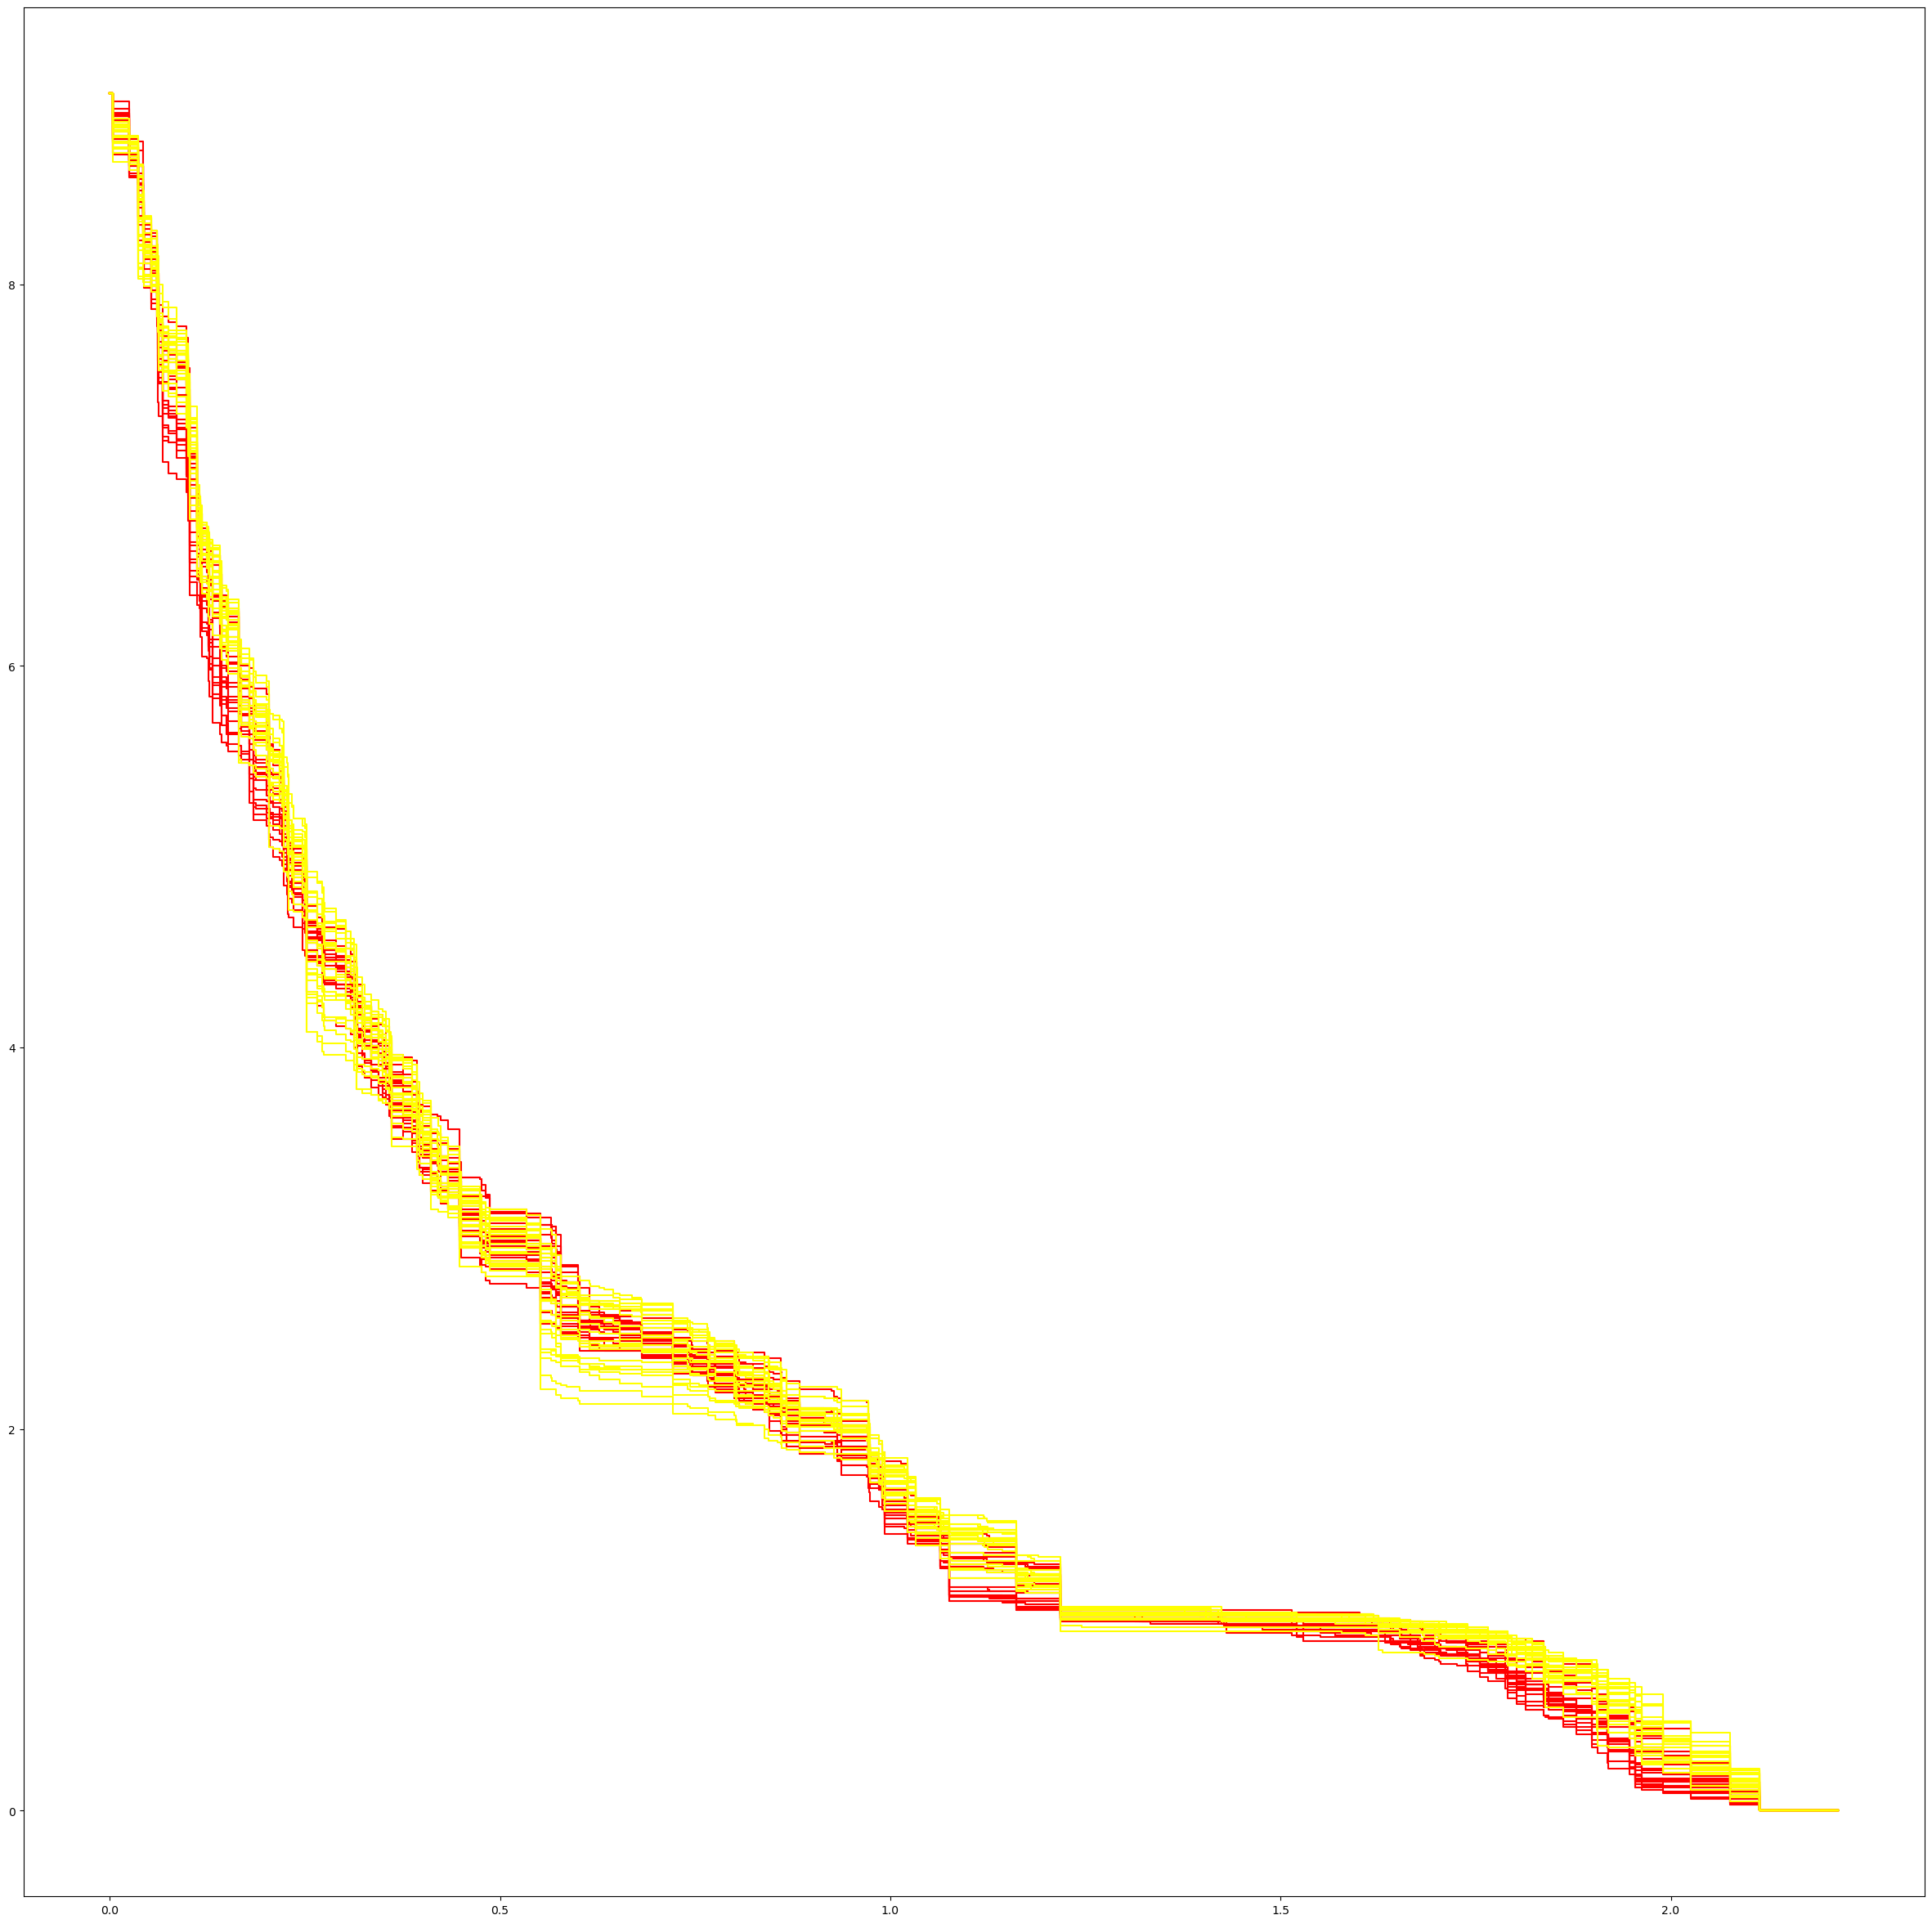

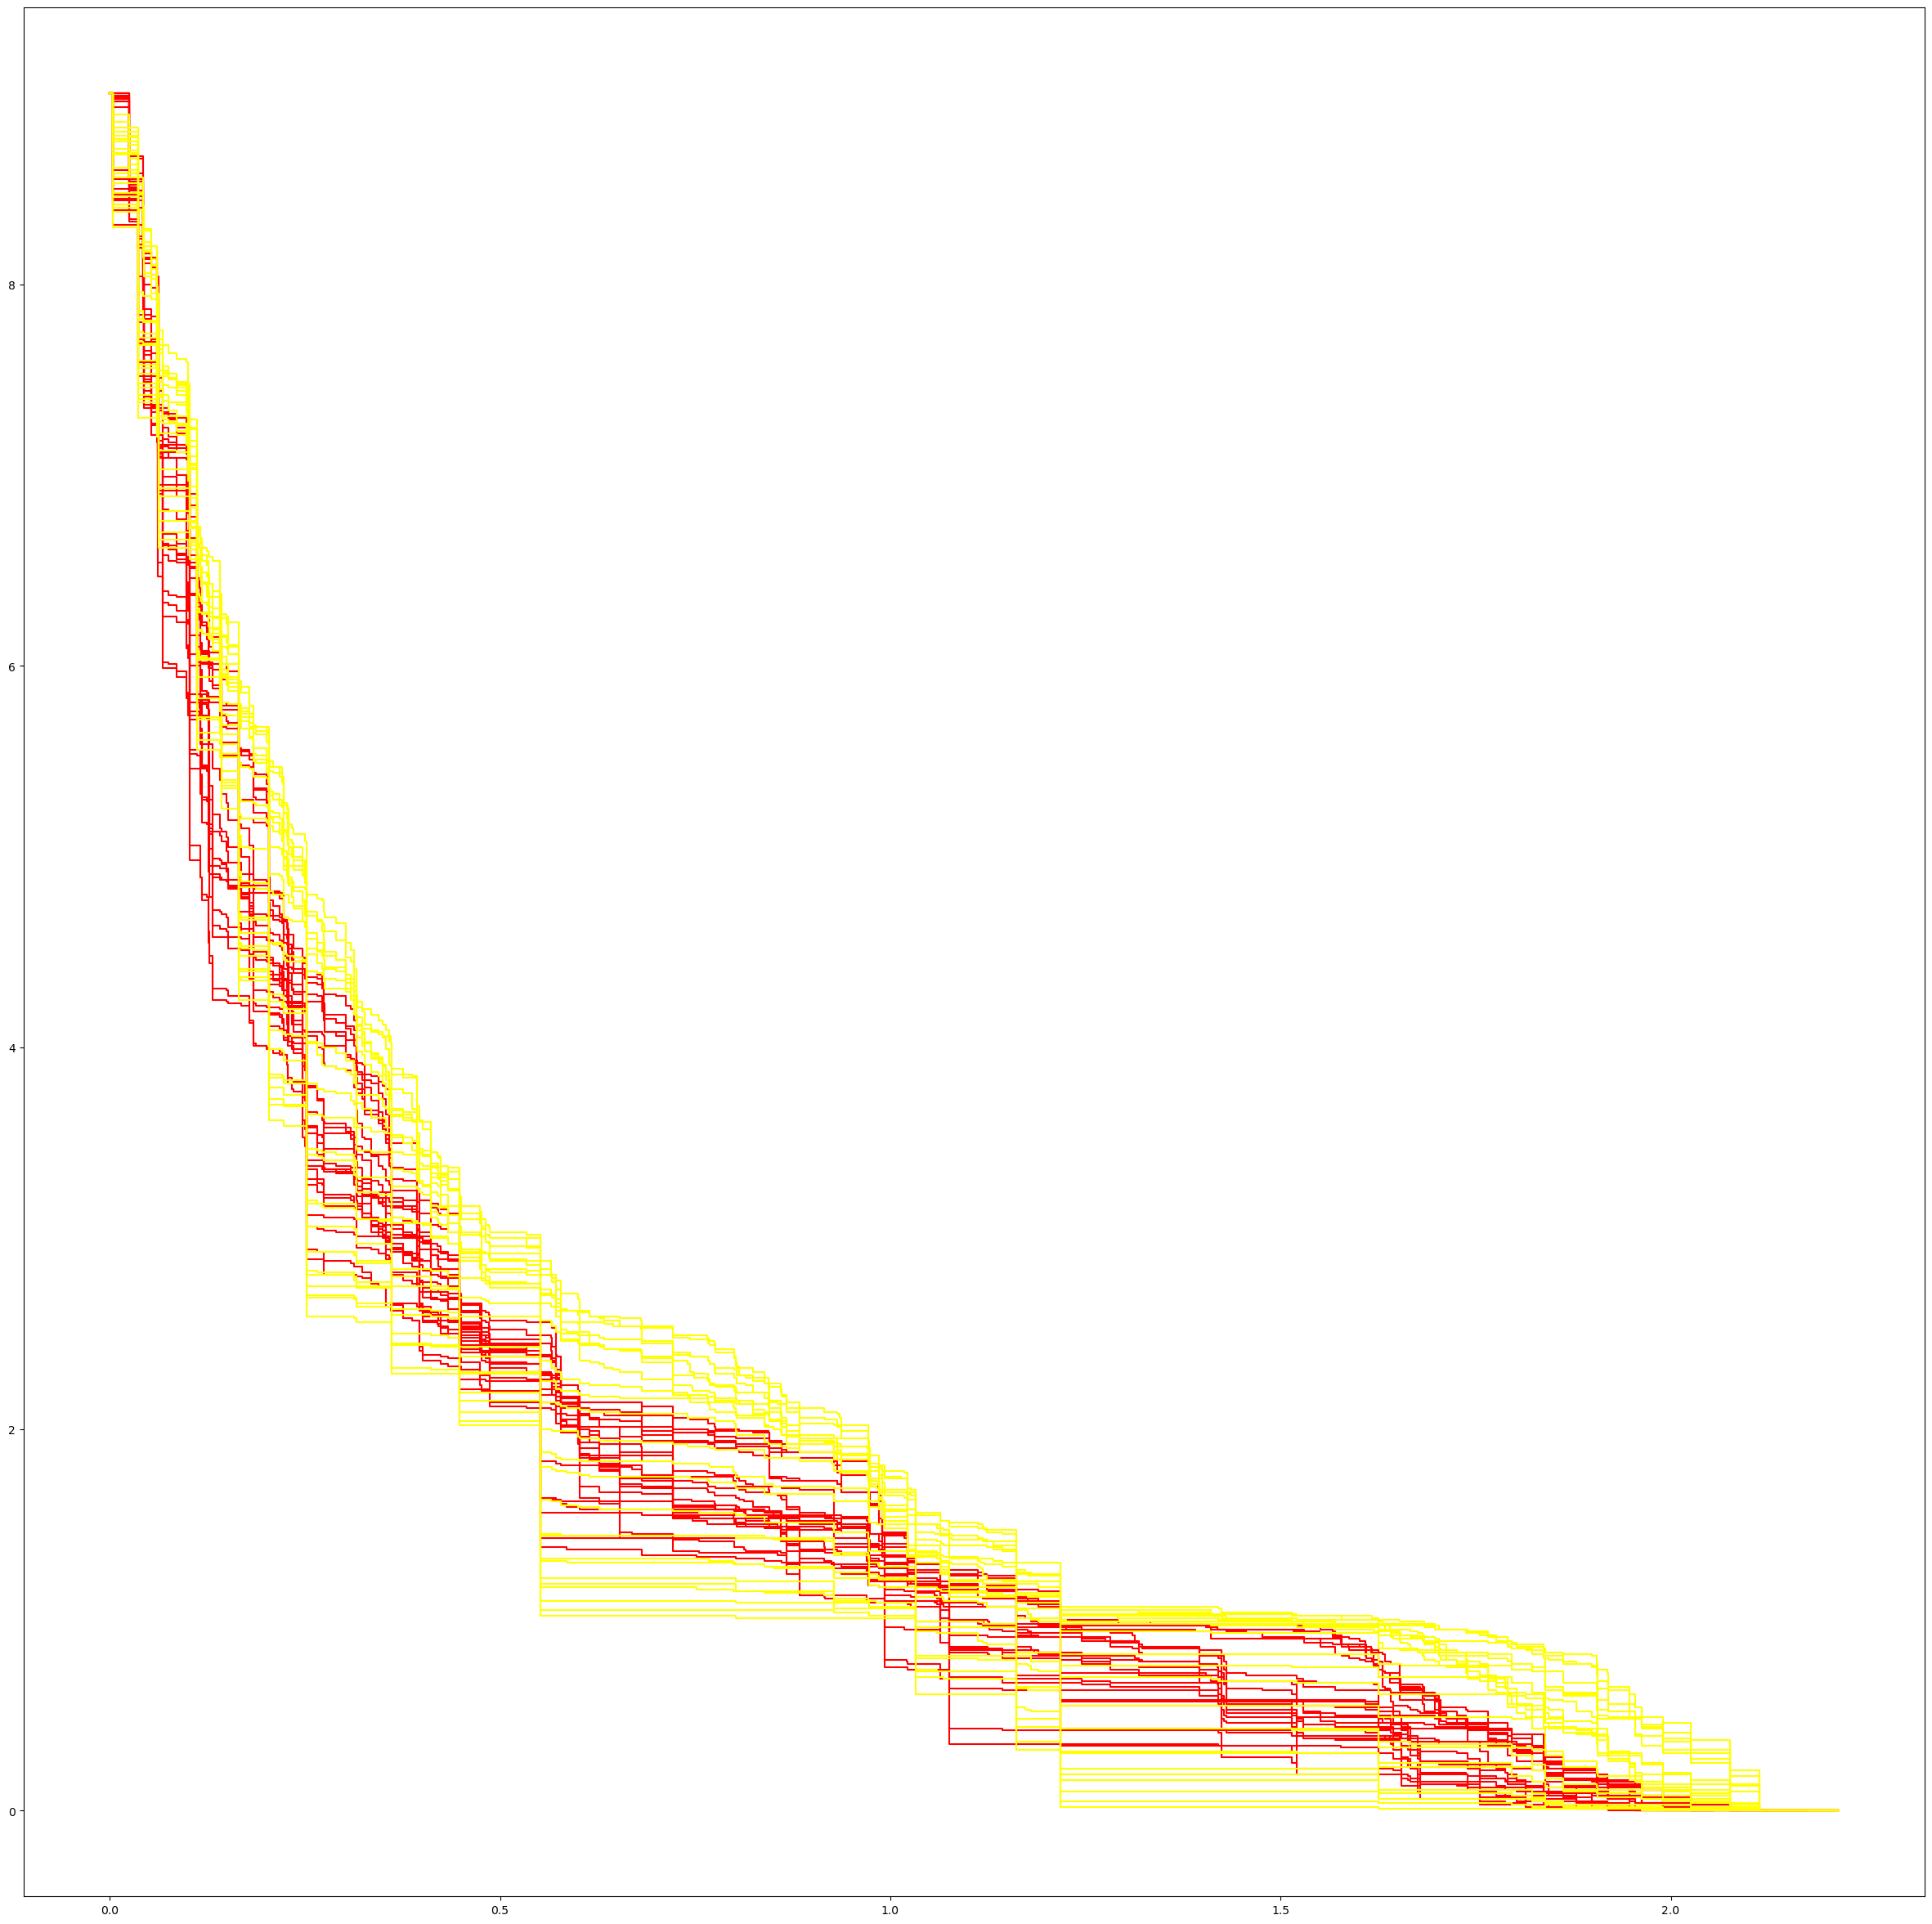

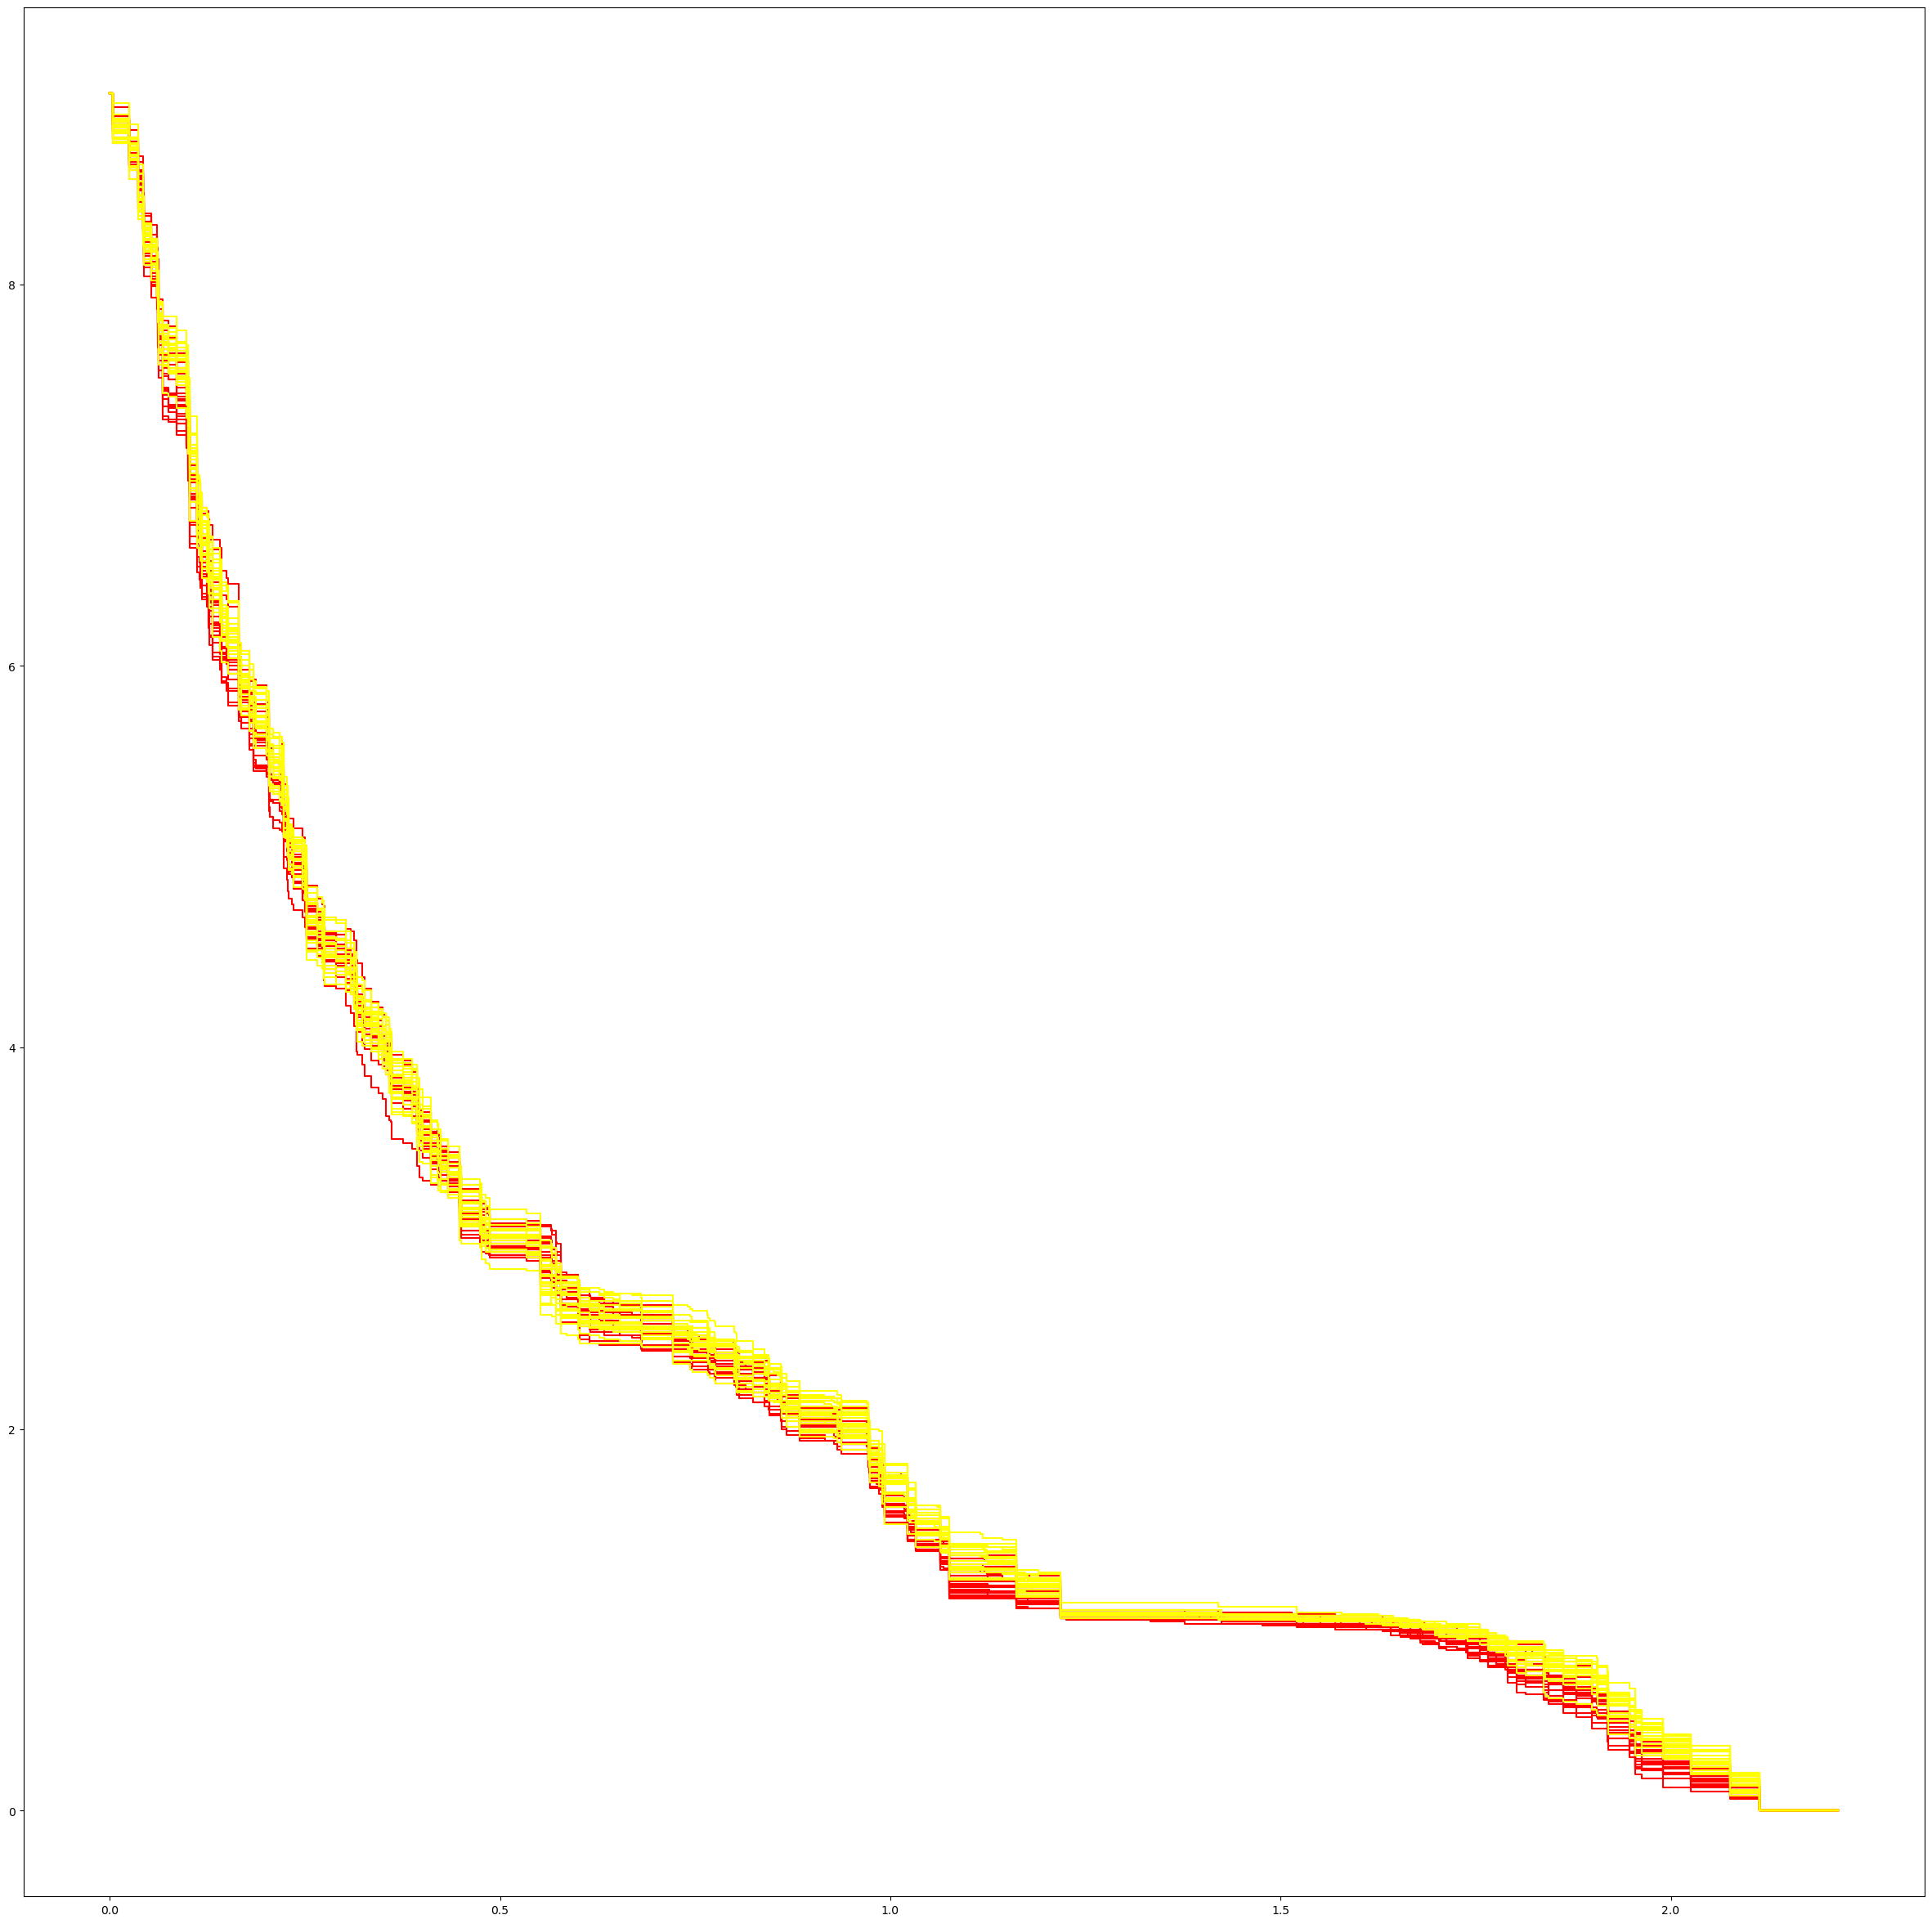

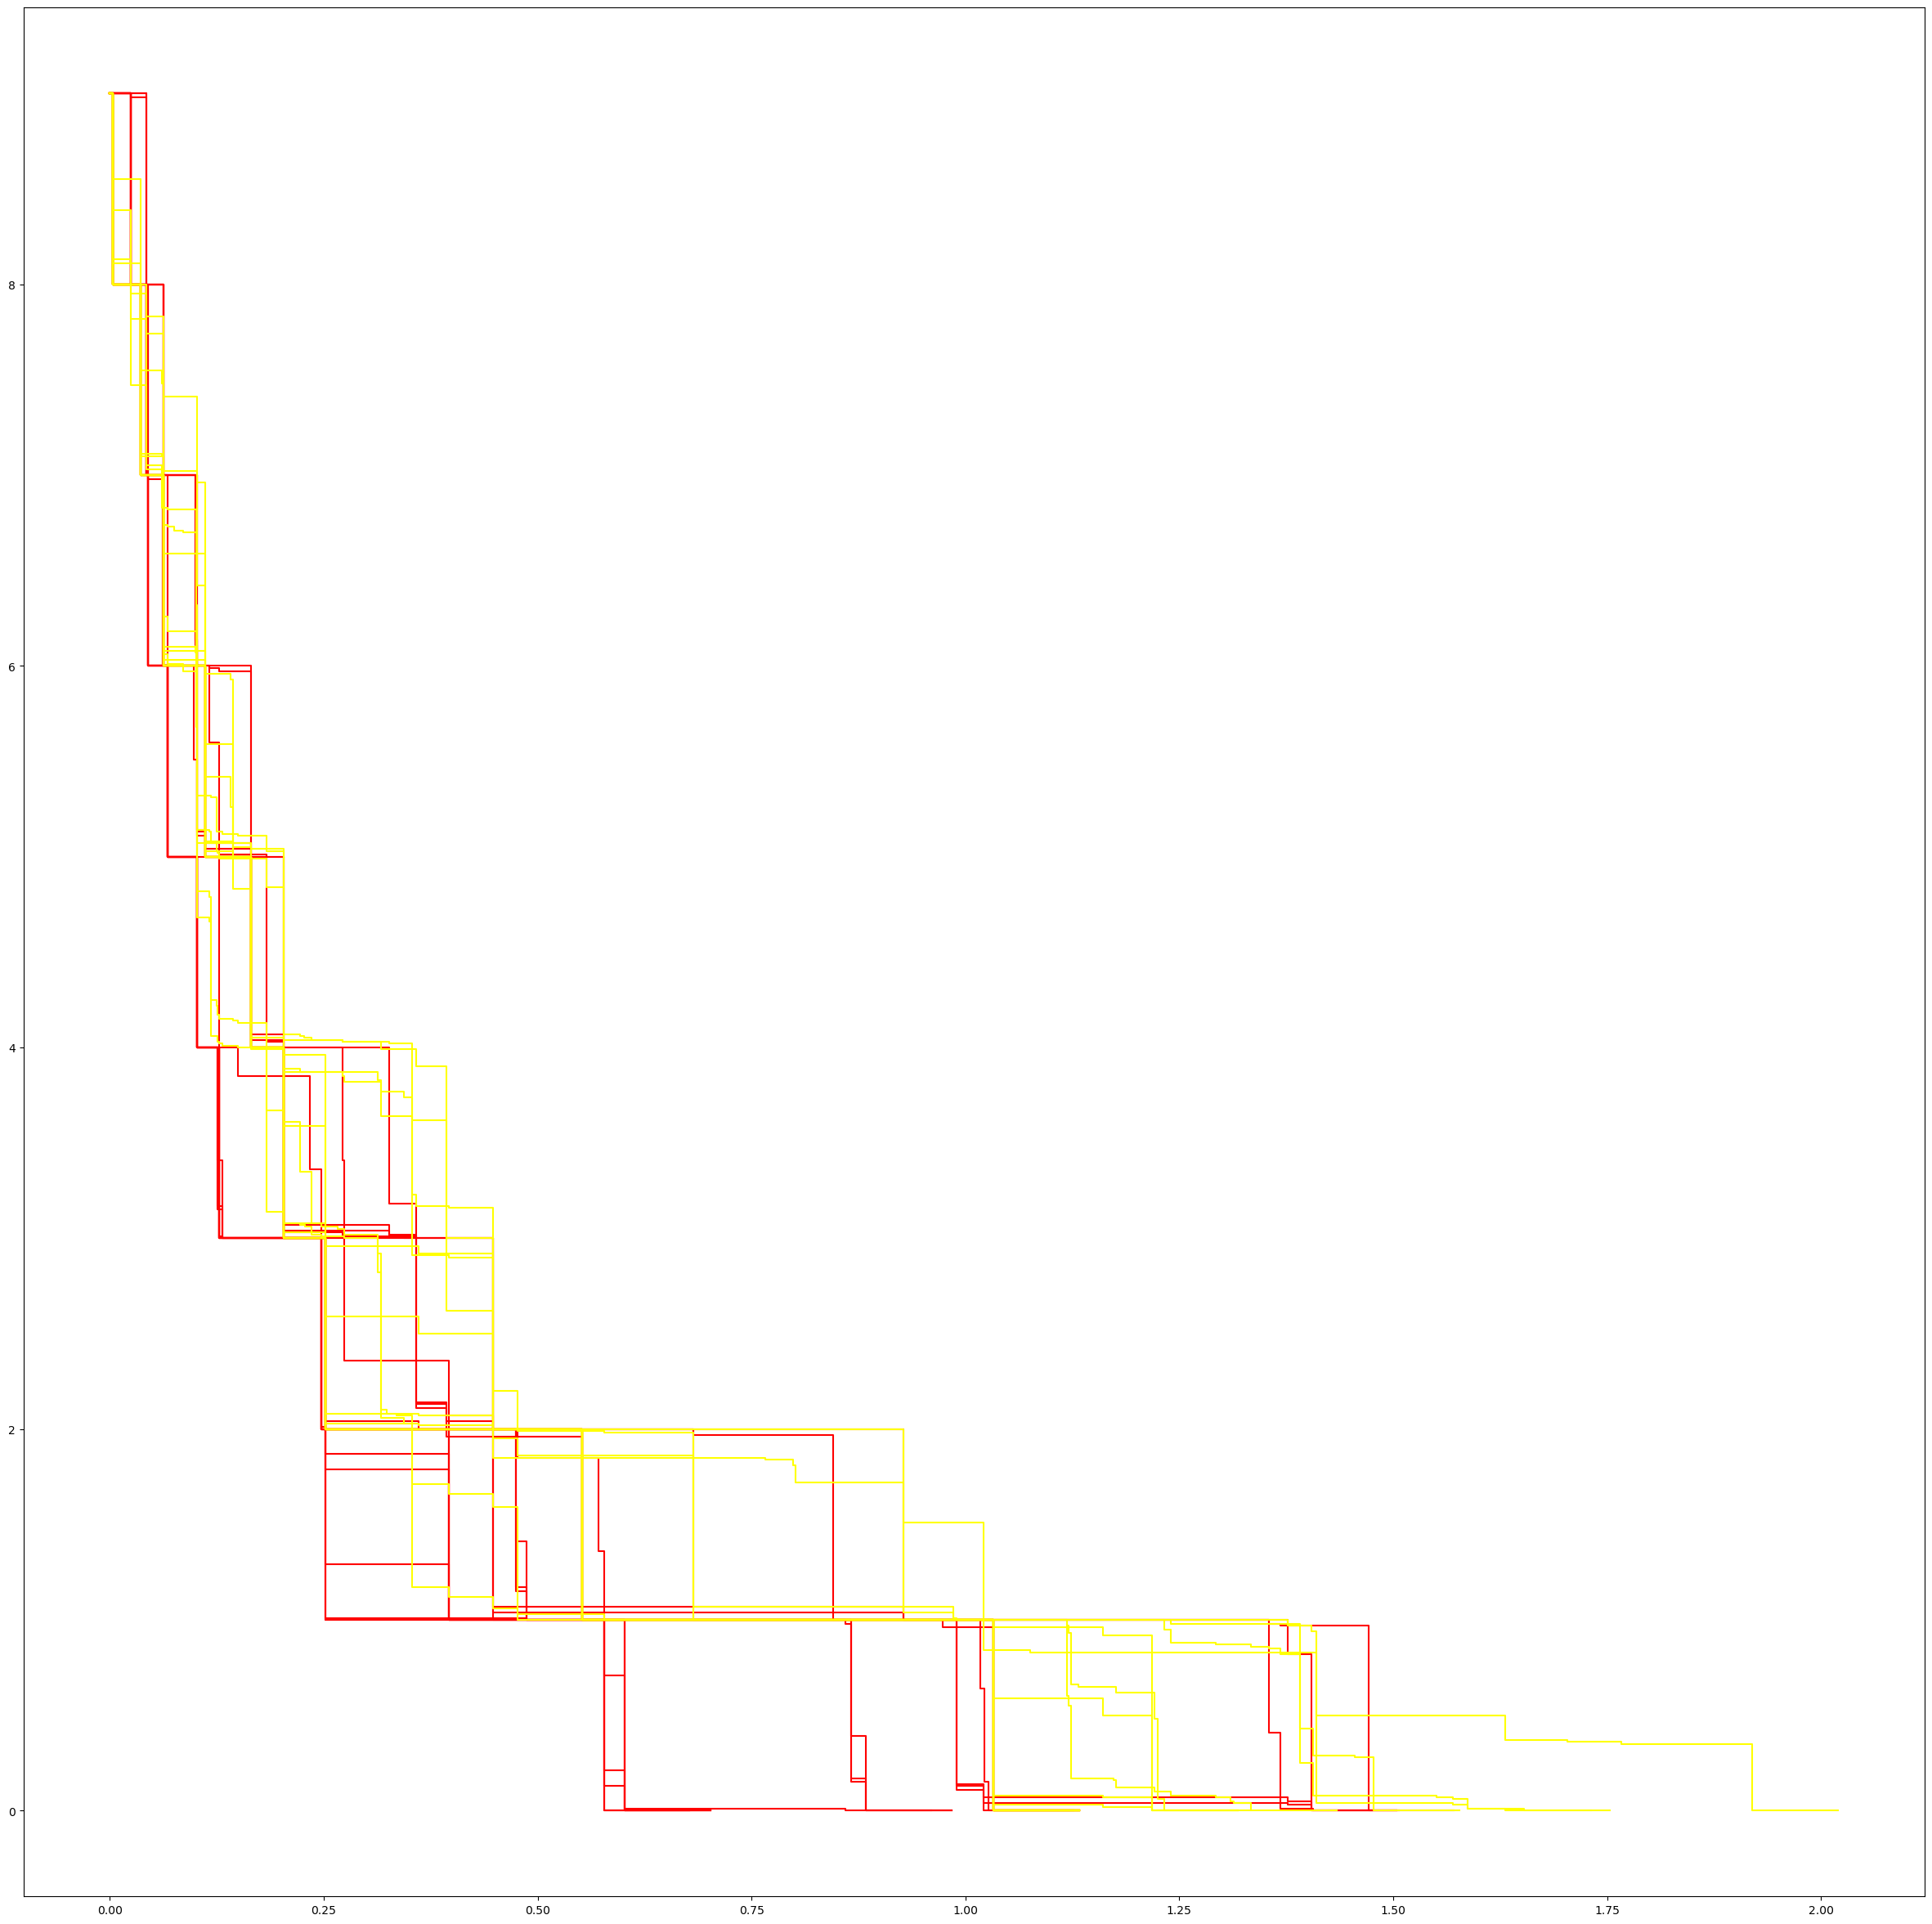

In [21]:
for k in distributions.keys():
    fig = plt.figure(k,figsize=(30,30))
    i = 0
    for f in h0_sr_11[k]:
        f.plot(color = "red")
        i += 1
    
    for f in h0_sr_10[k]:
        f.plot(color = "yellow")
        i += 1
        
print(i)

50


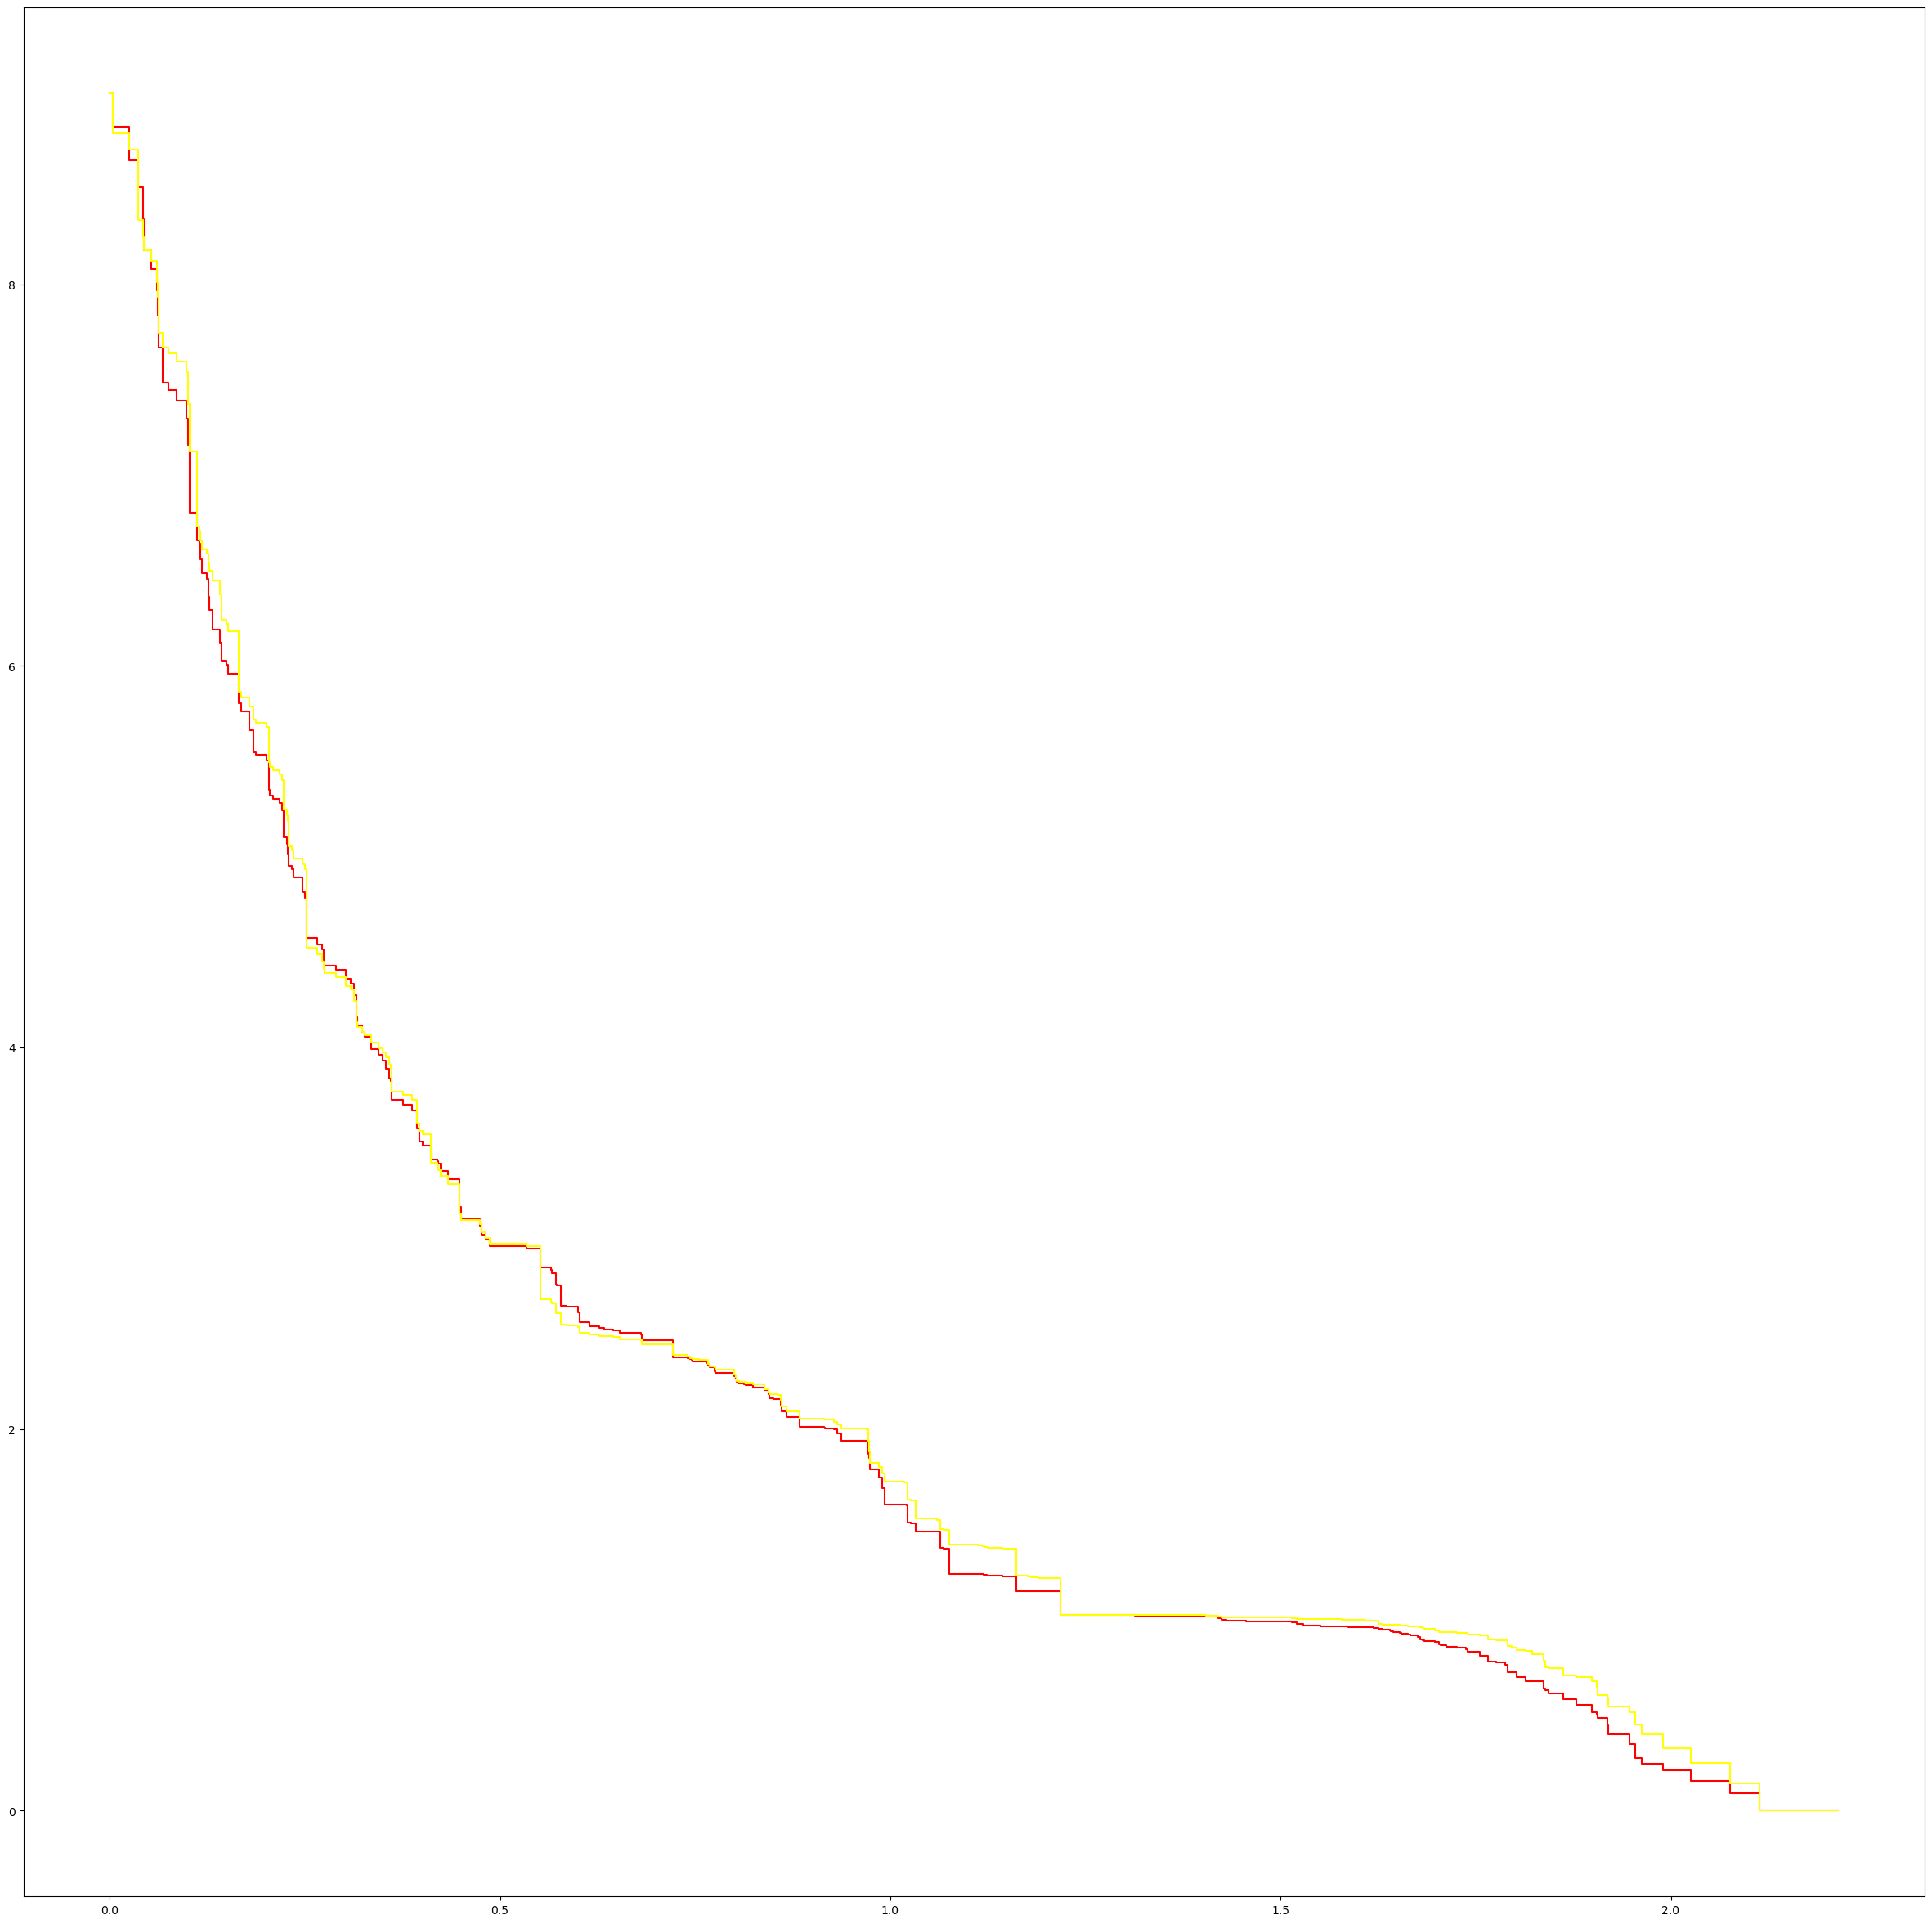

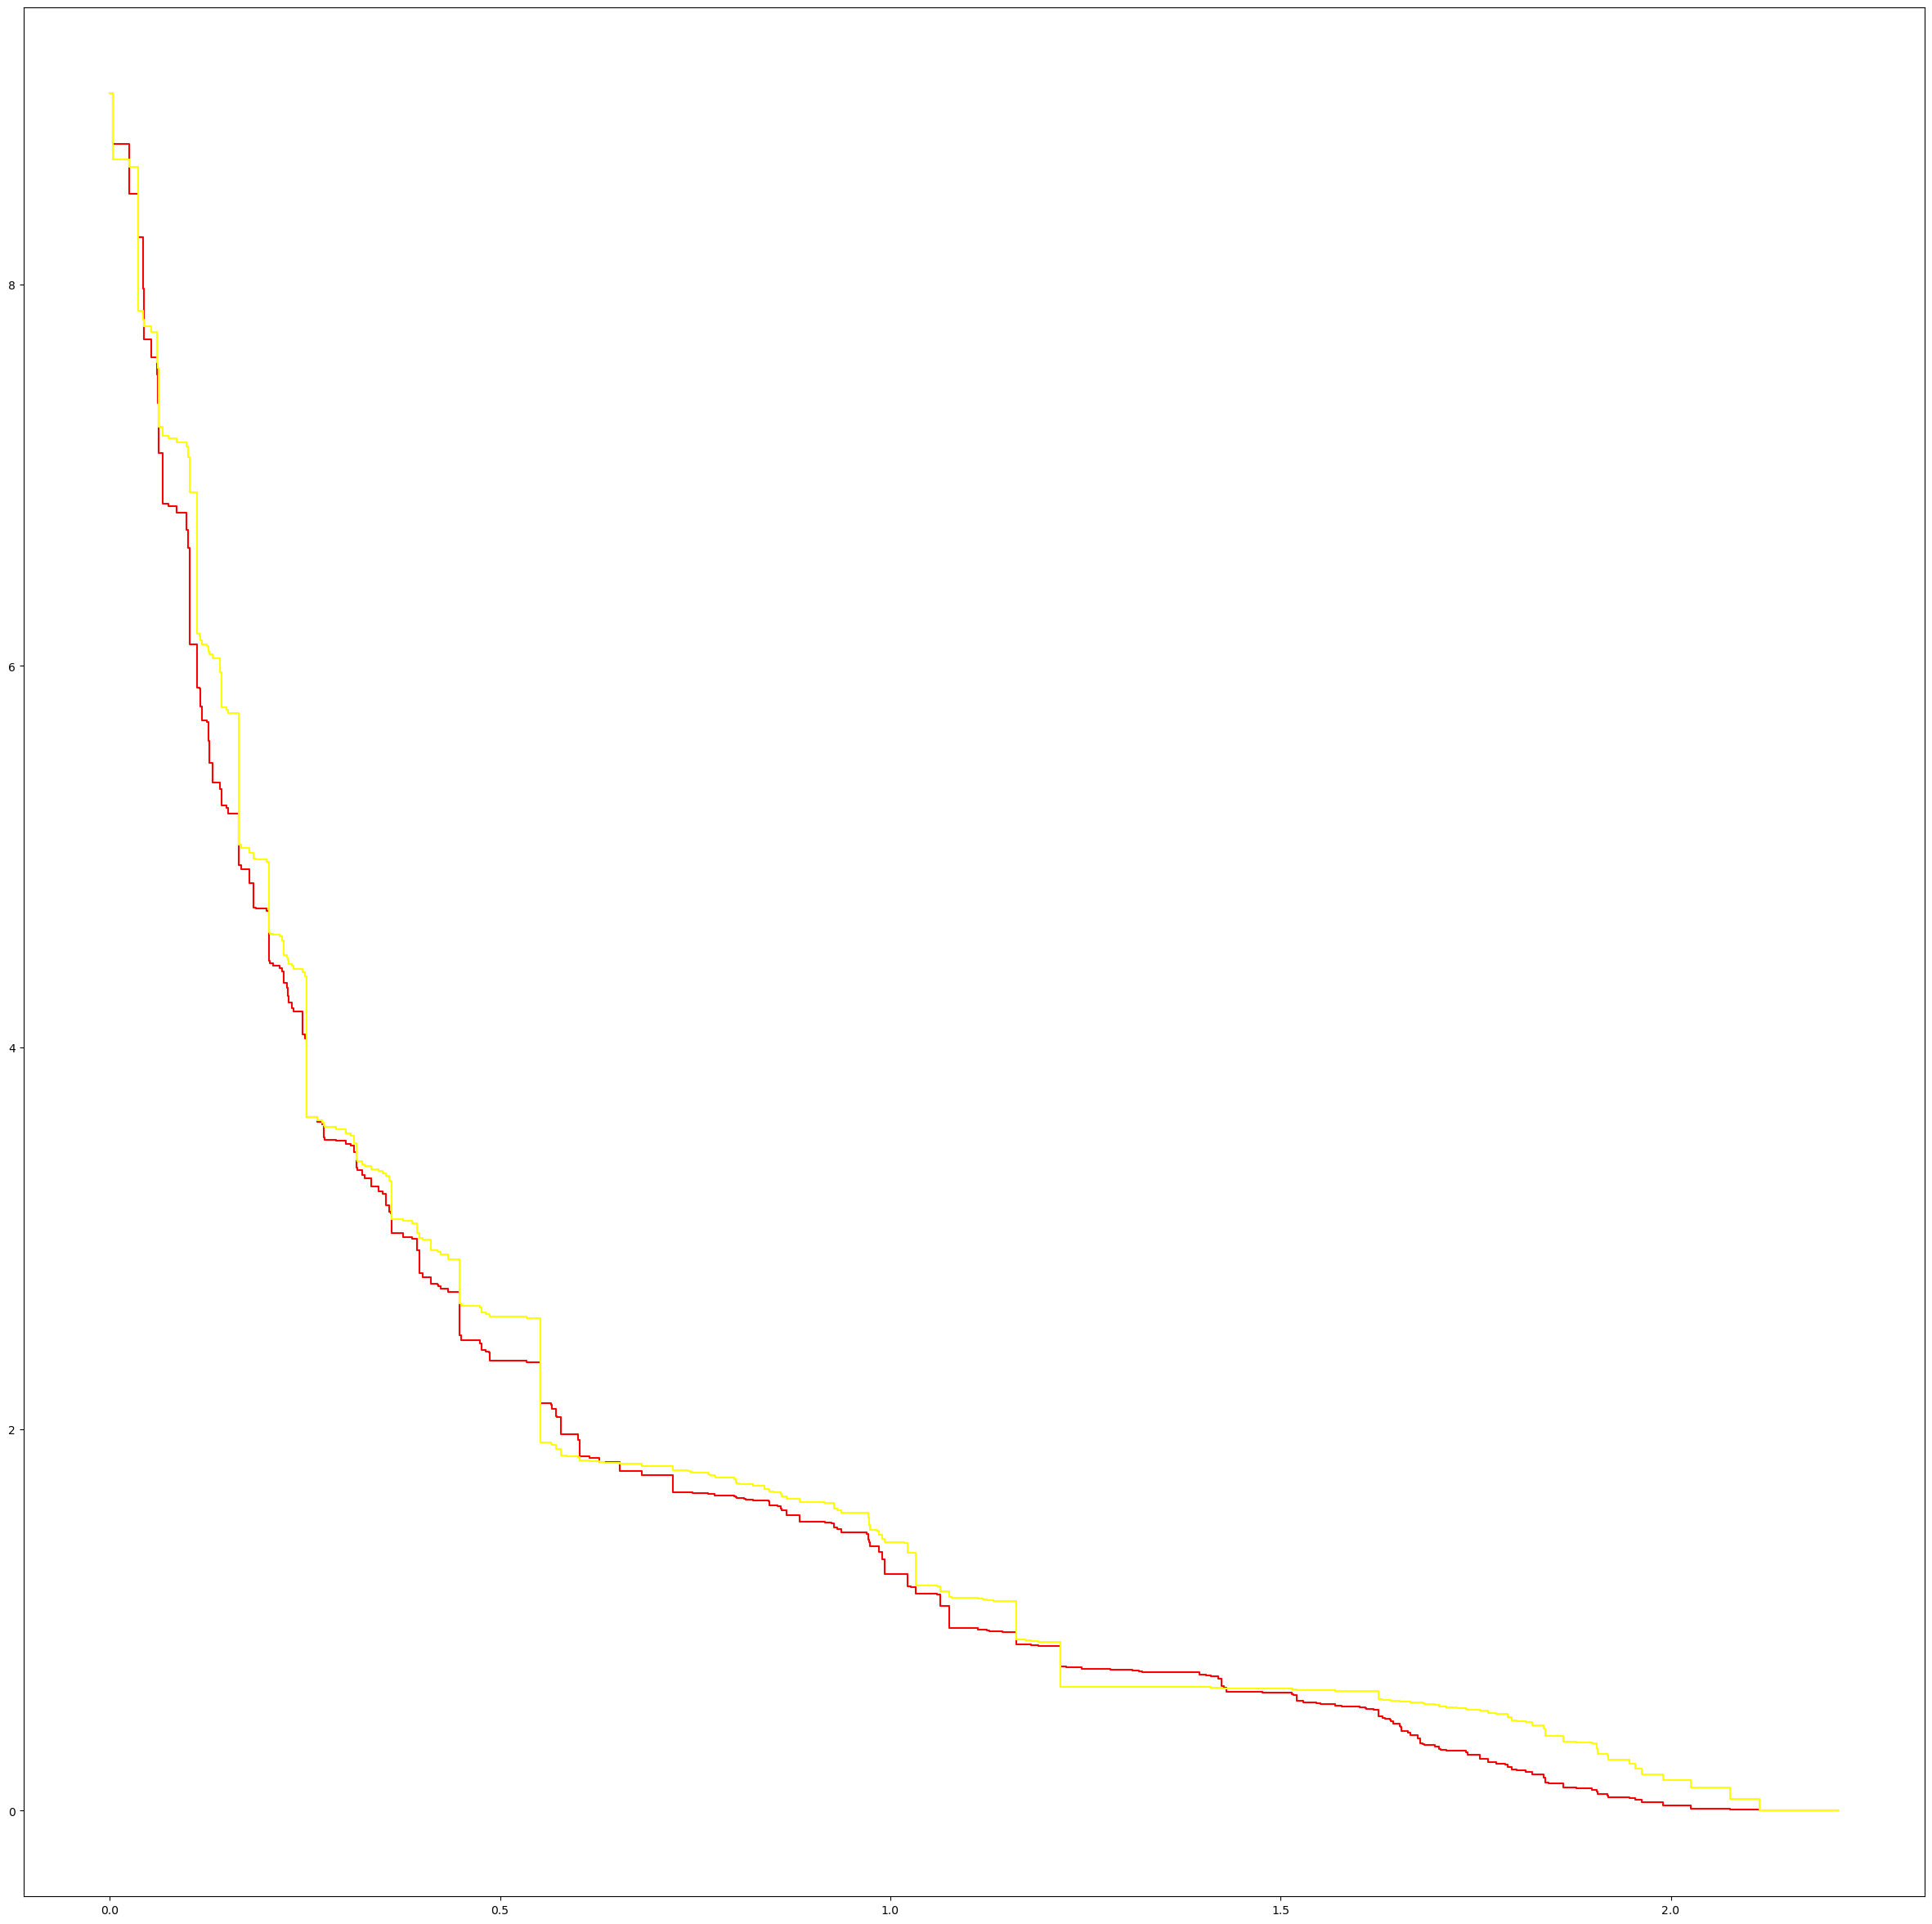

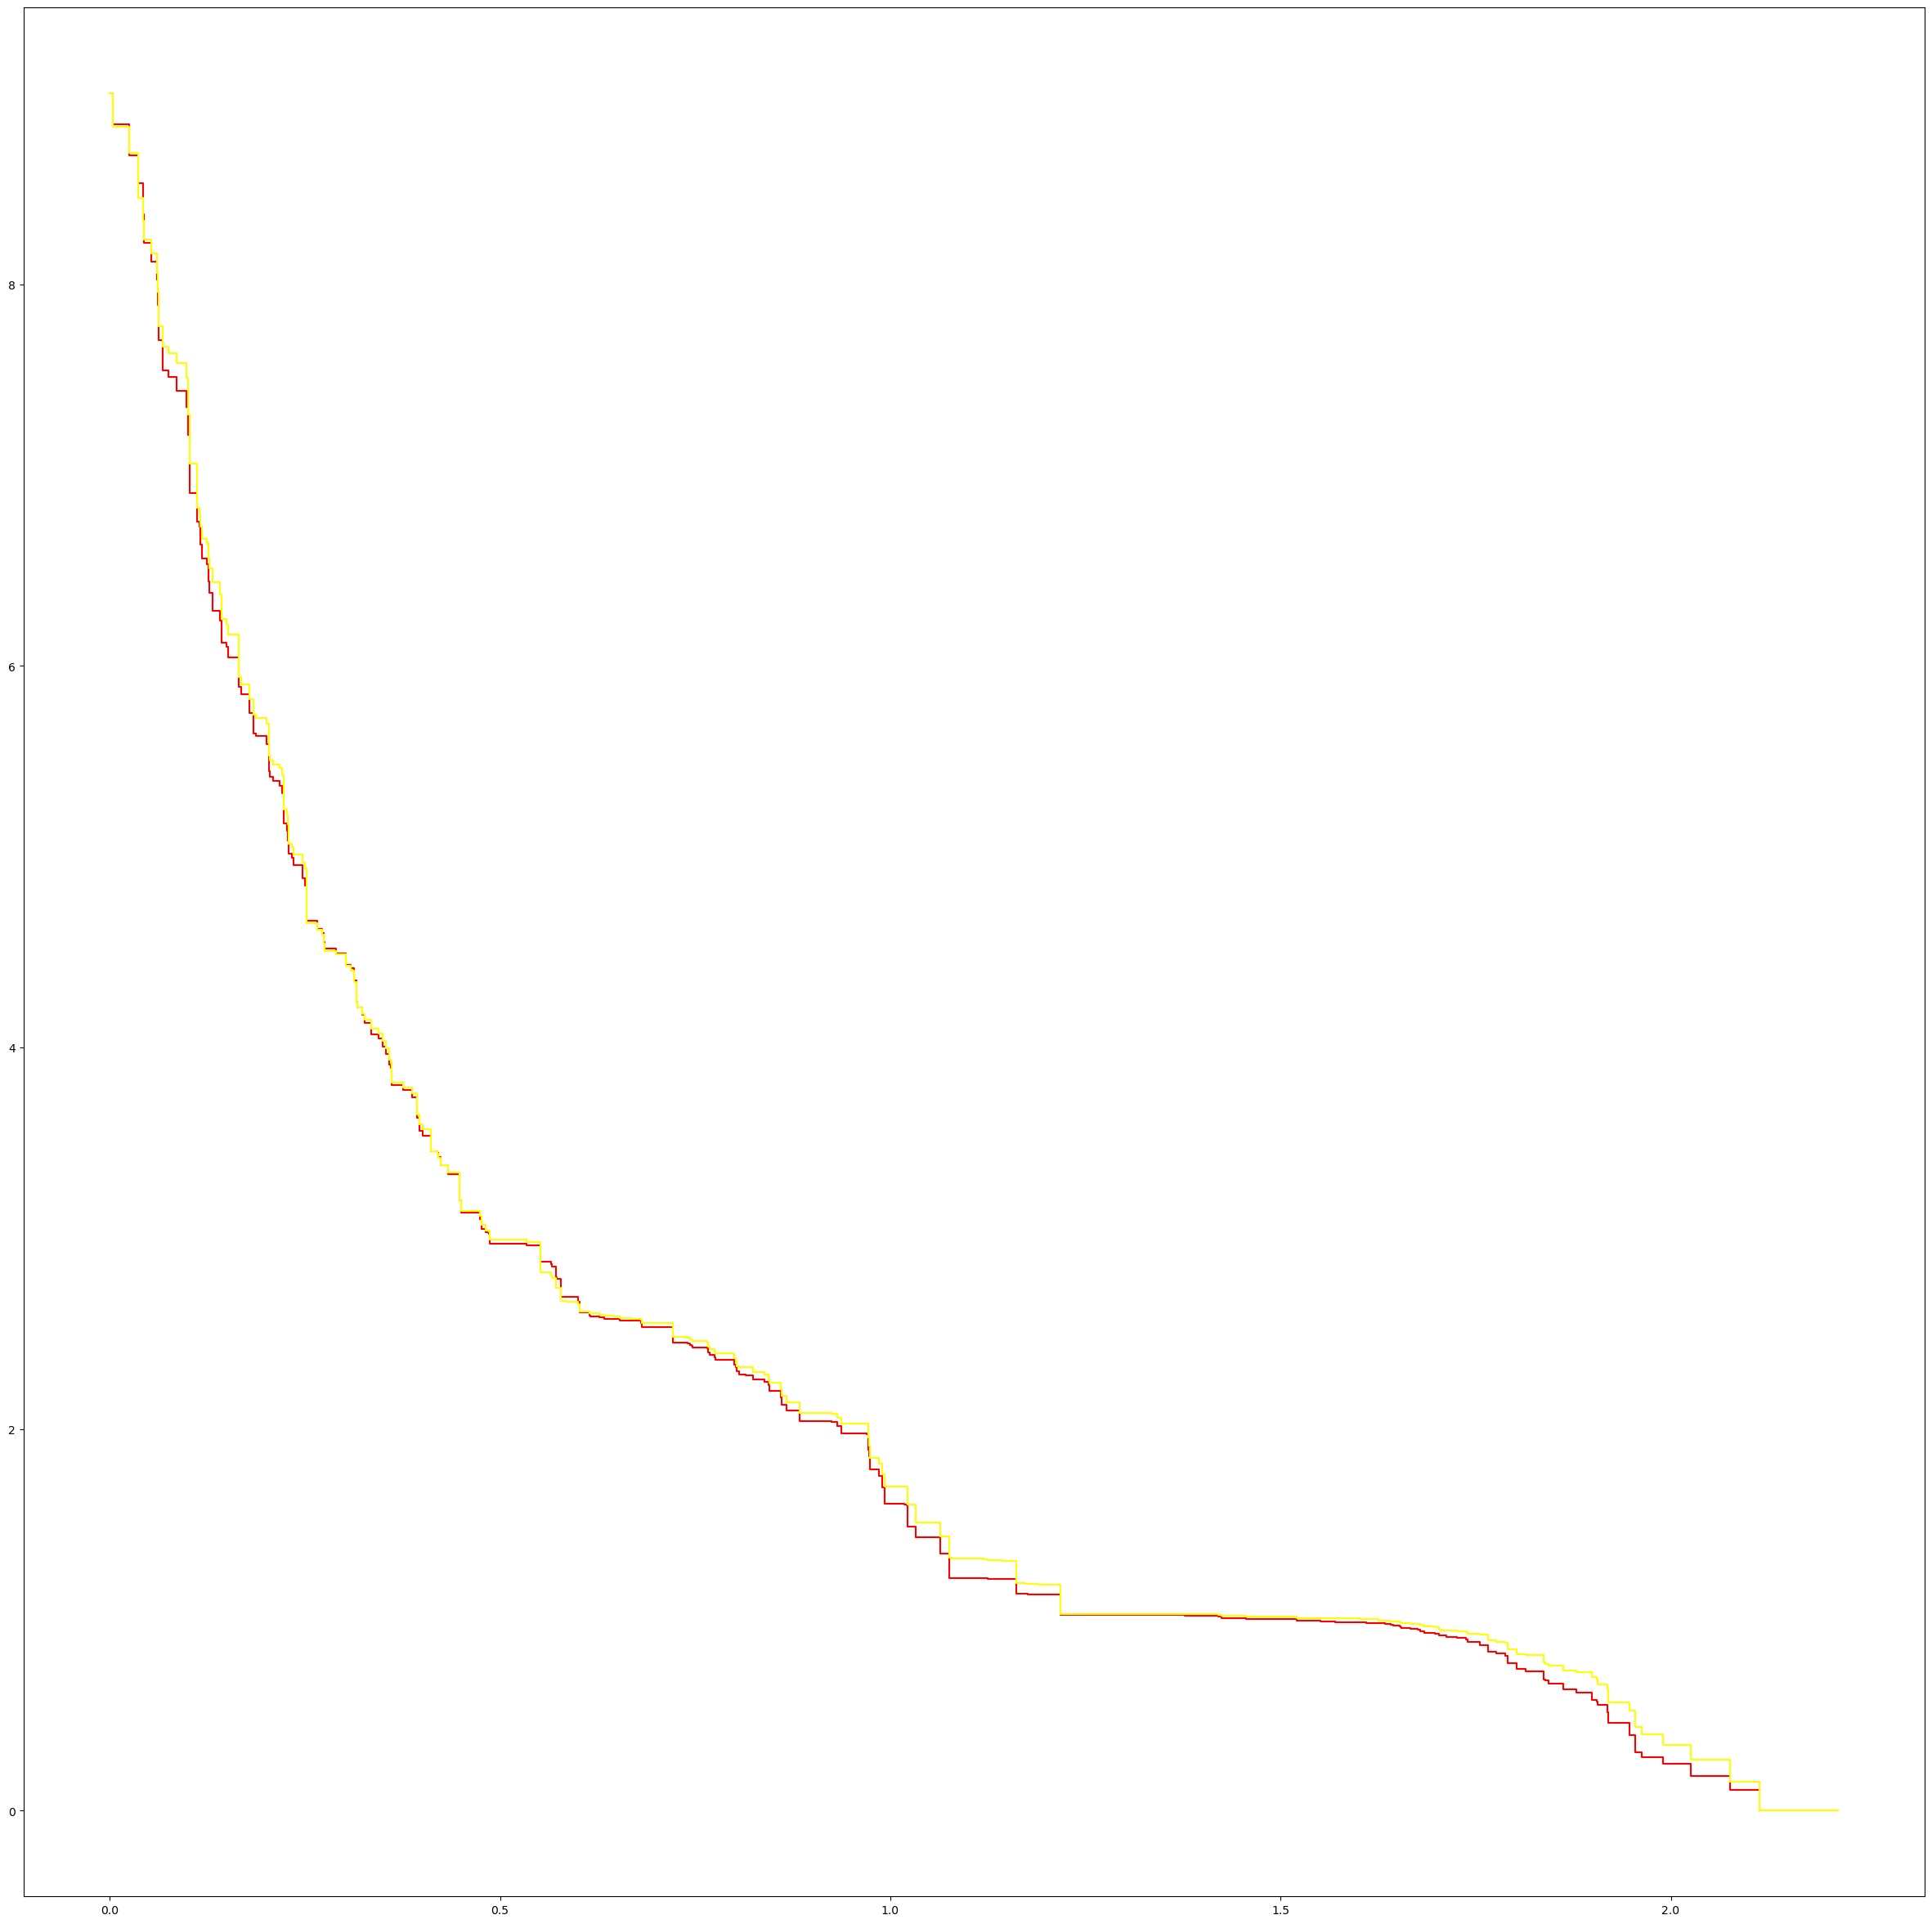

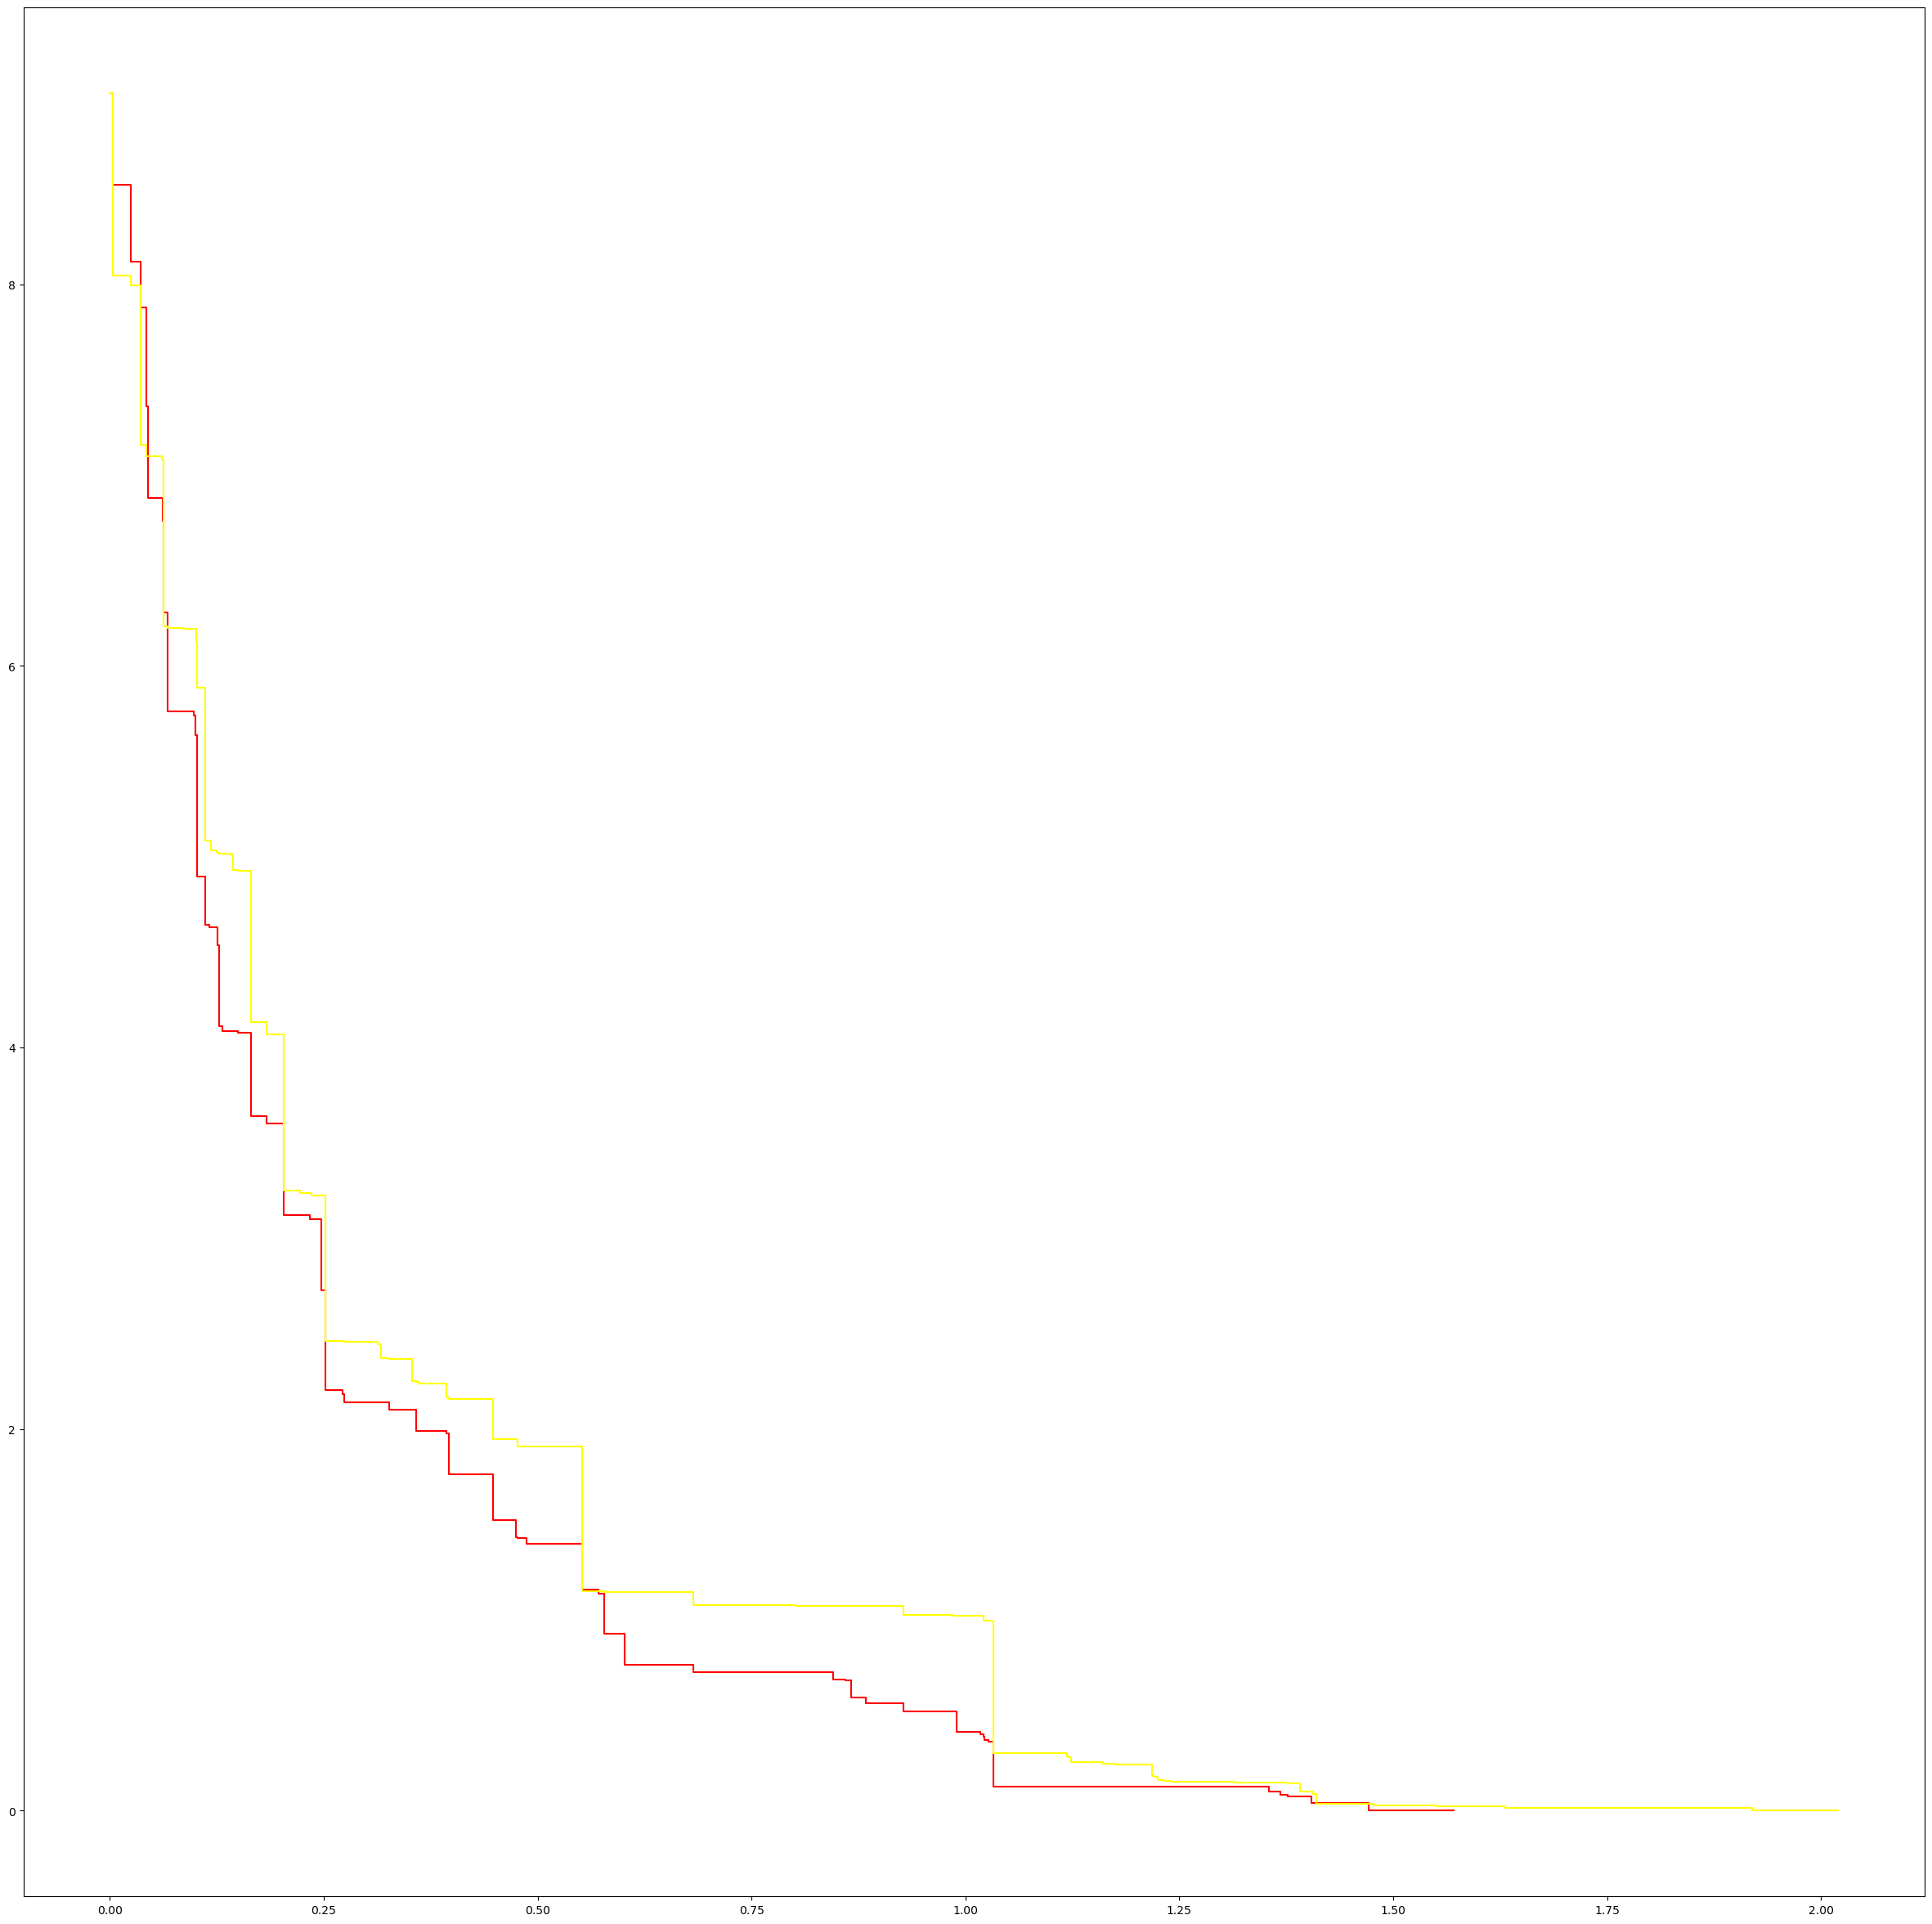

In [22]:
for k in distributions.keys():
    fig = plt.figure(k,figsize=(30,30))
    i = 0
    m_0=0
    m_1=0
    for f in h0_sr_11[k]:
        m_1=m_1+f
        i += 1
    m_1=m_1/25
    m_1.plot(color="red")
    for f in h0_sr_10[k]:
        m_0=m_0+f
        i += 1
    m_0=m_0/25
    m_0.plot(color="yellow")
        
print(i)

50


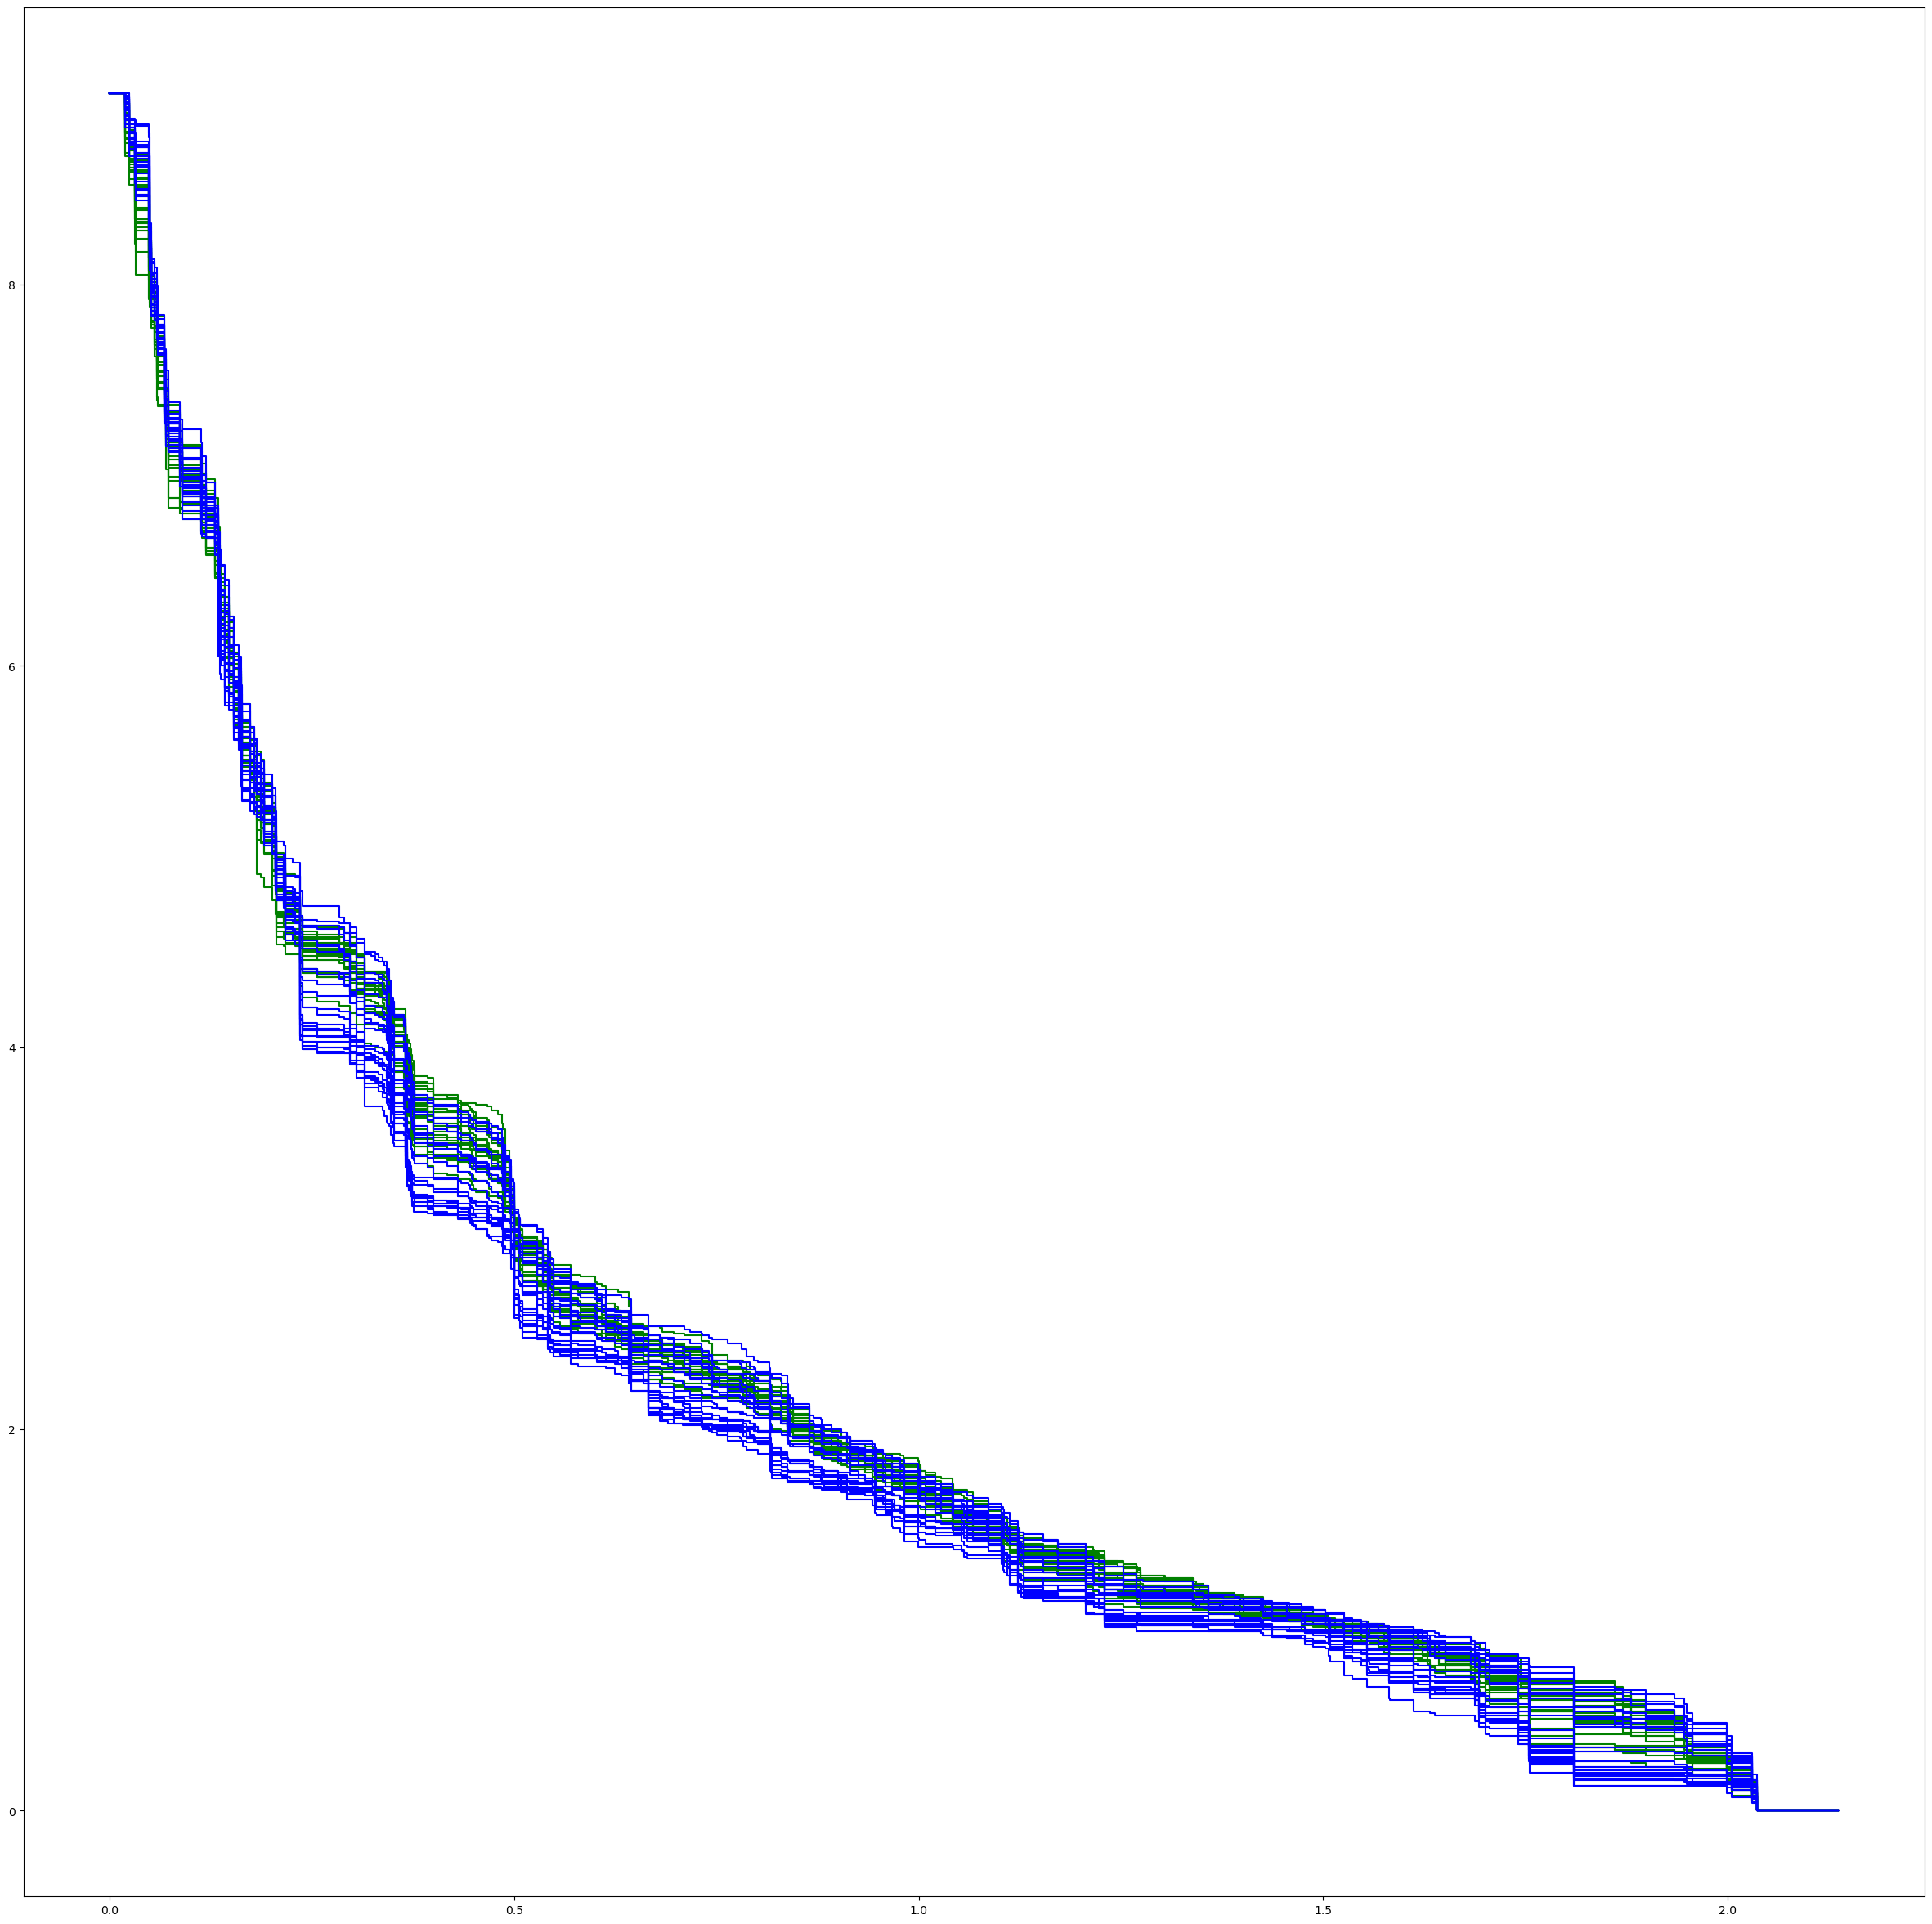

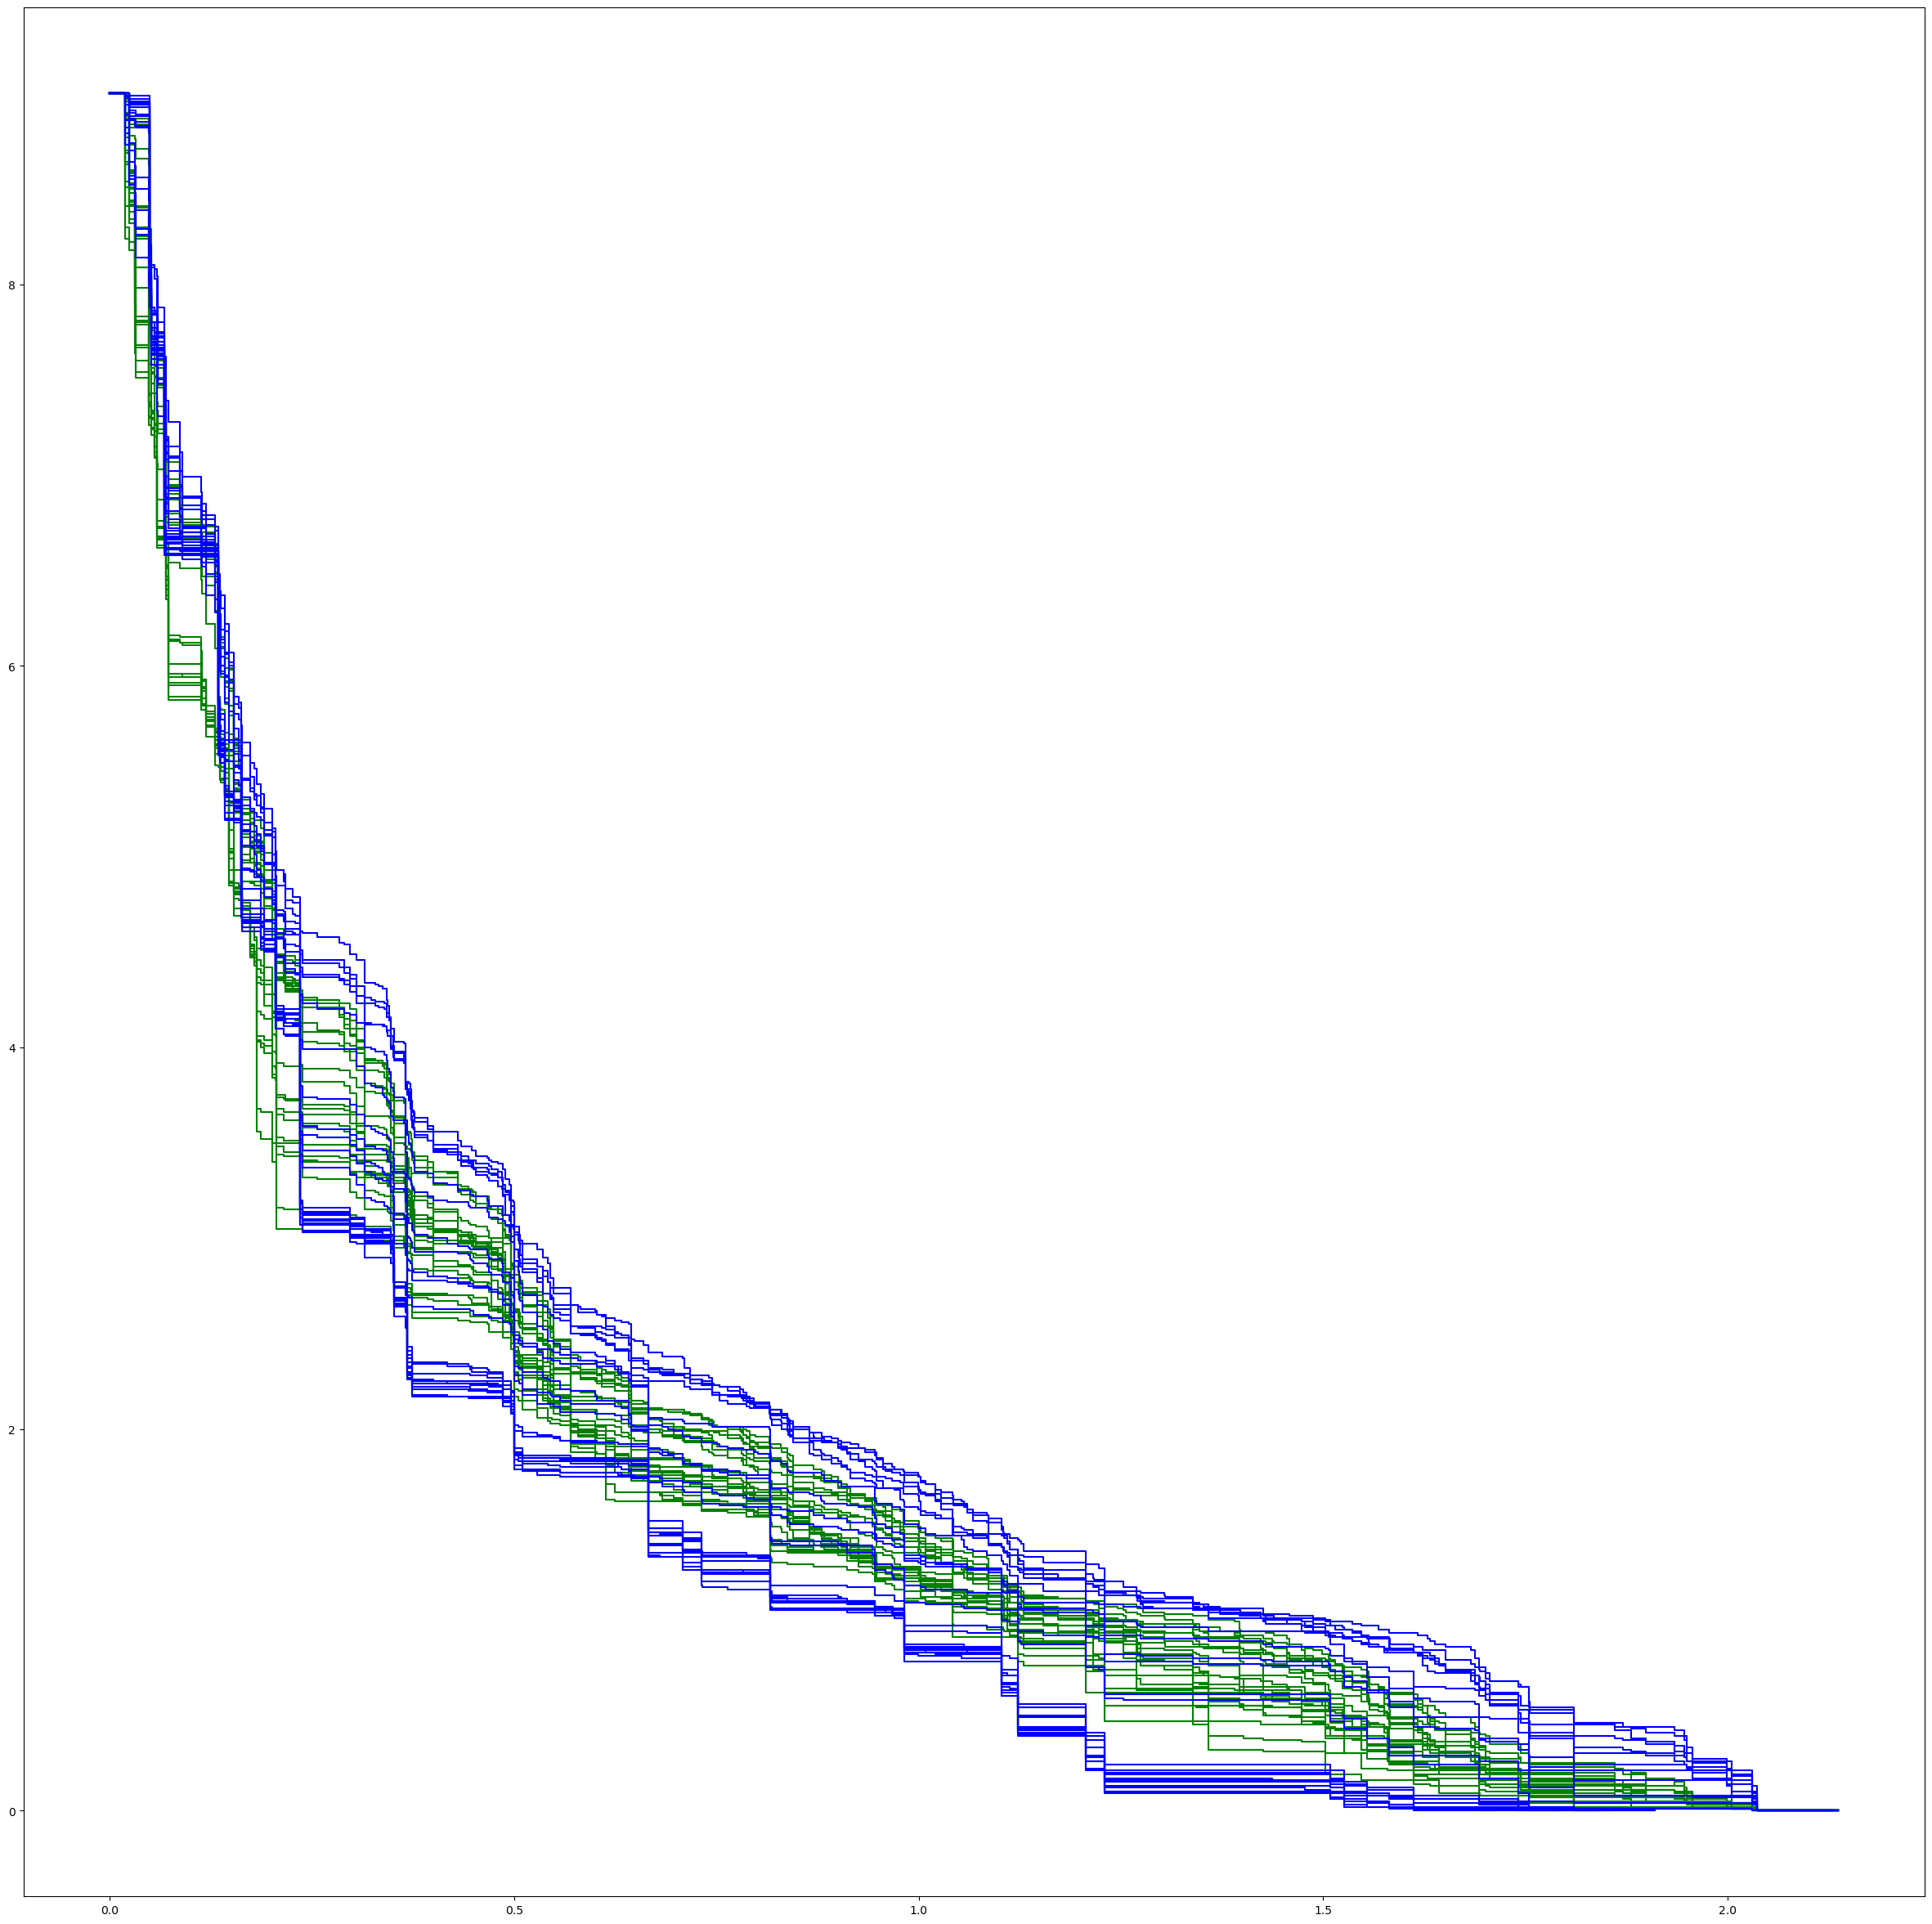

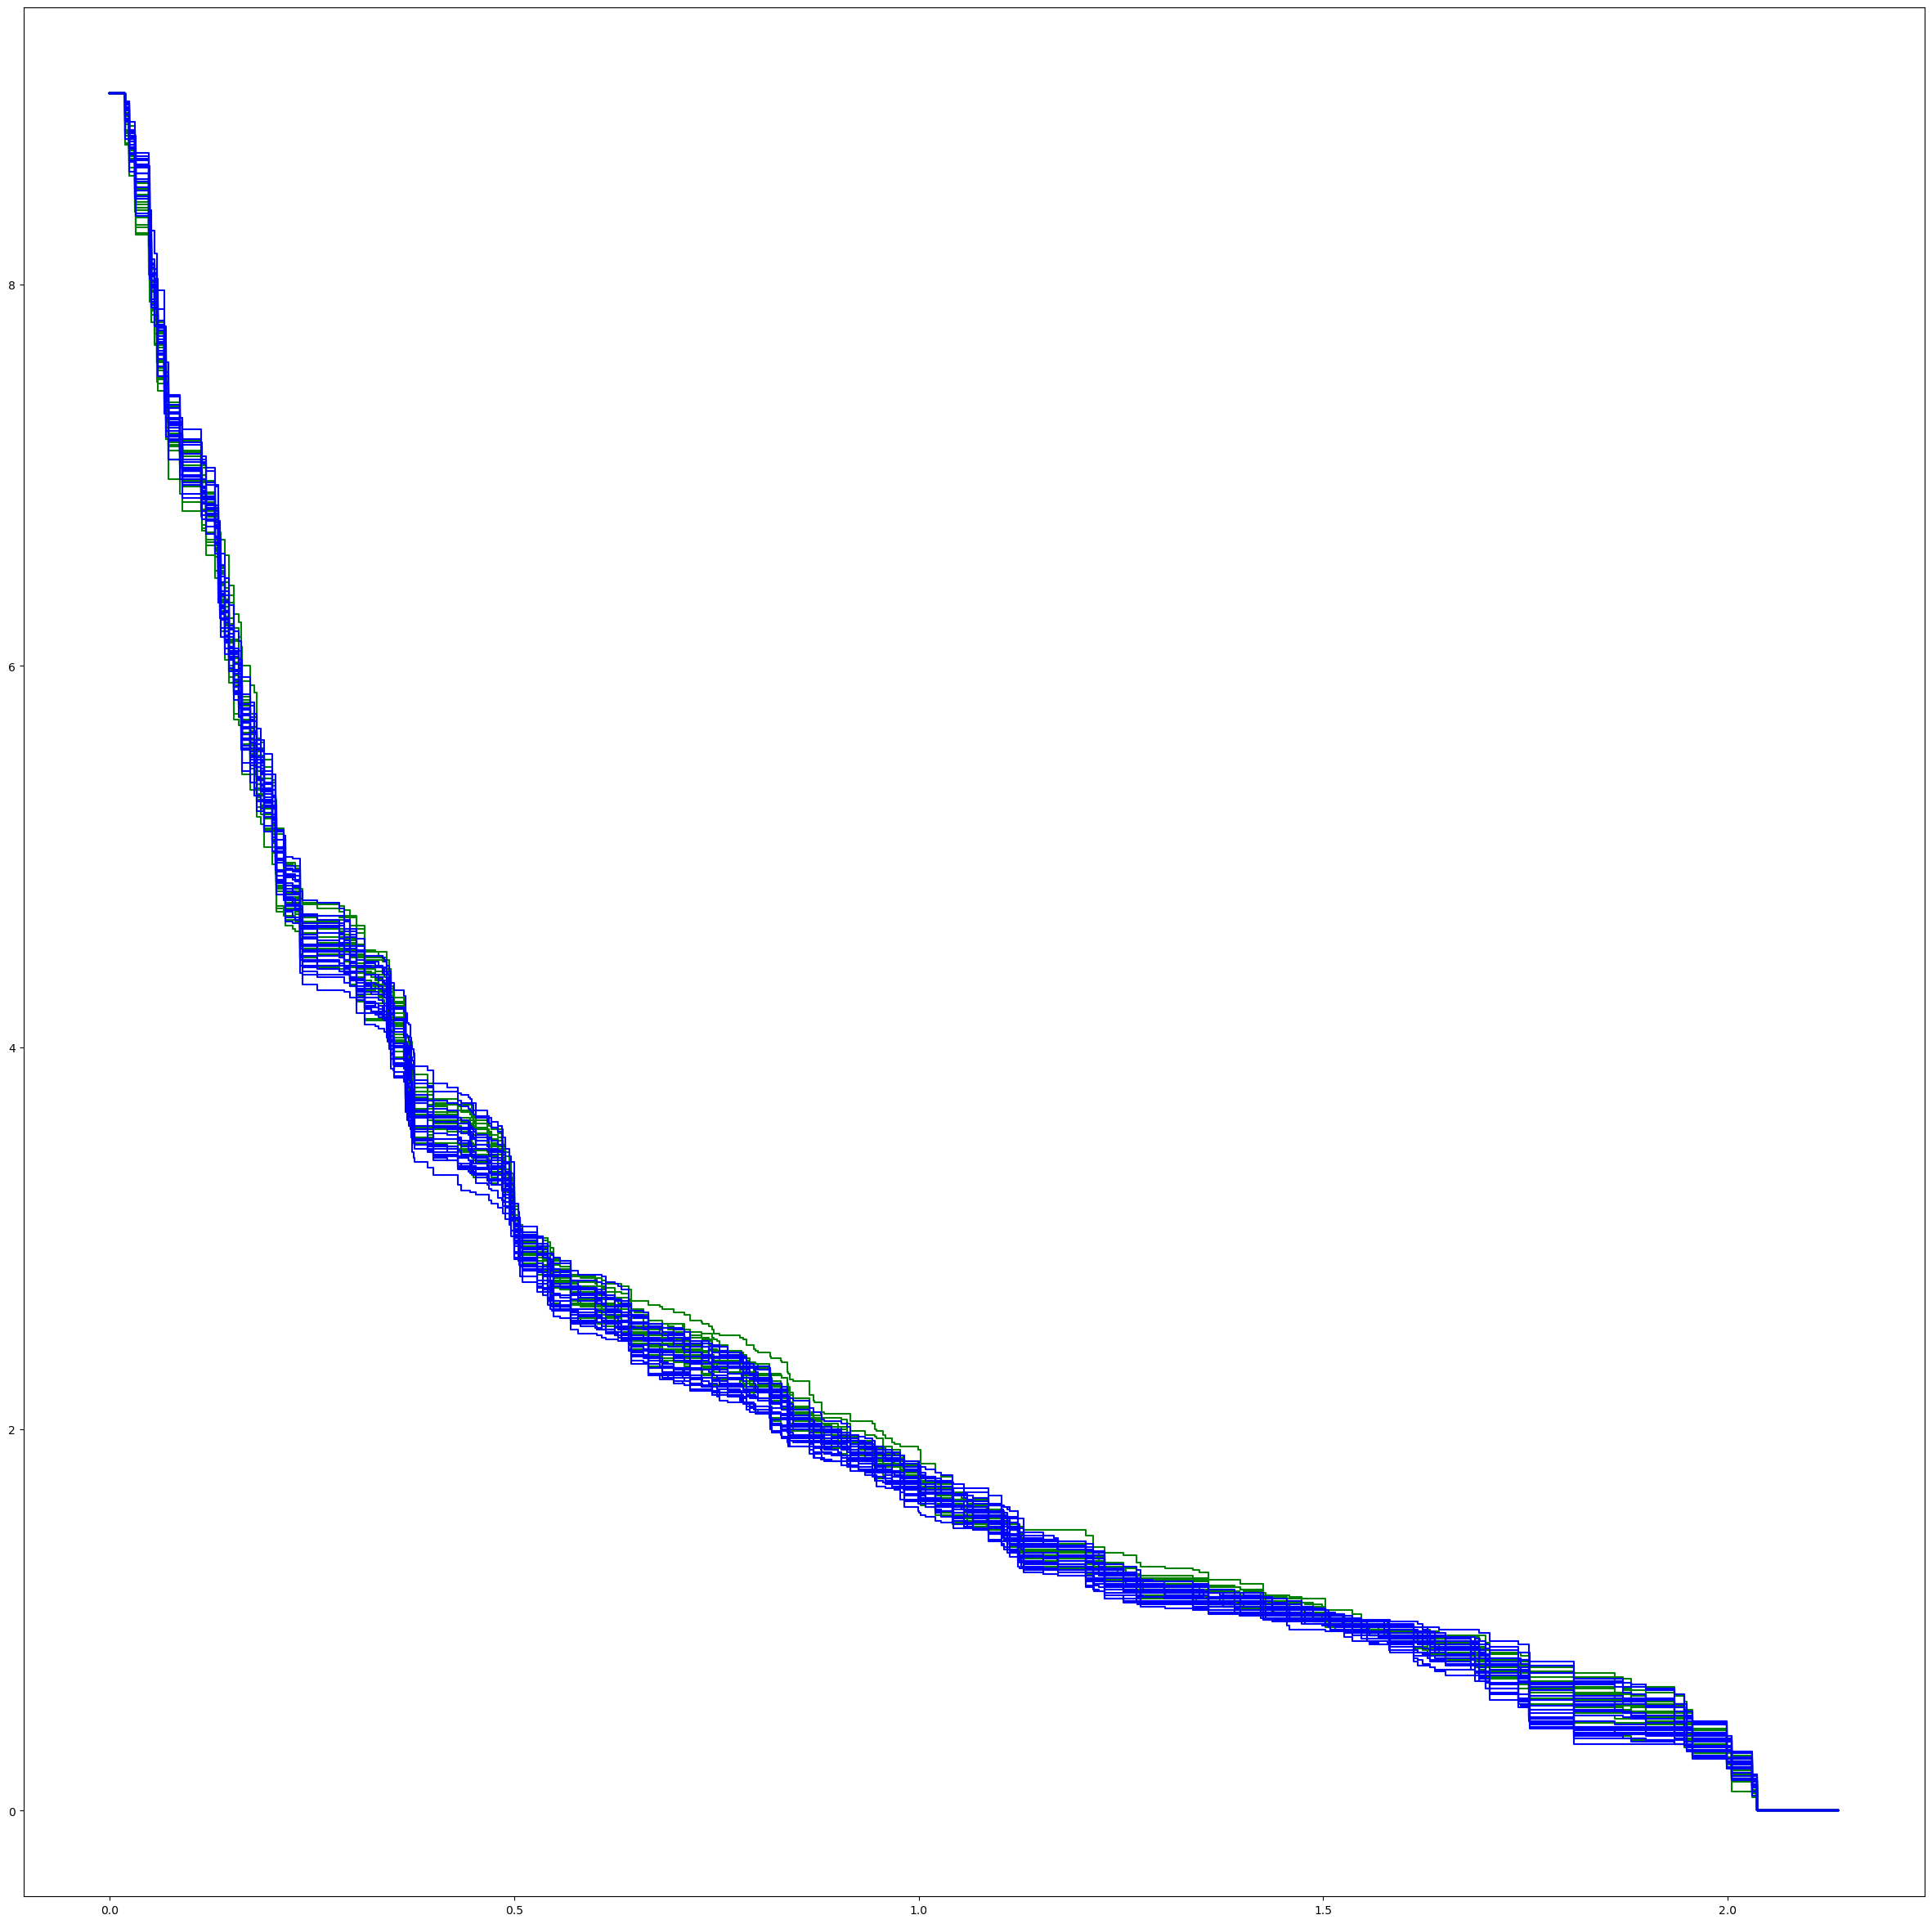

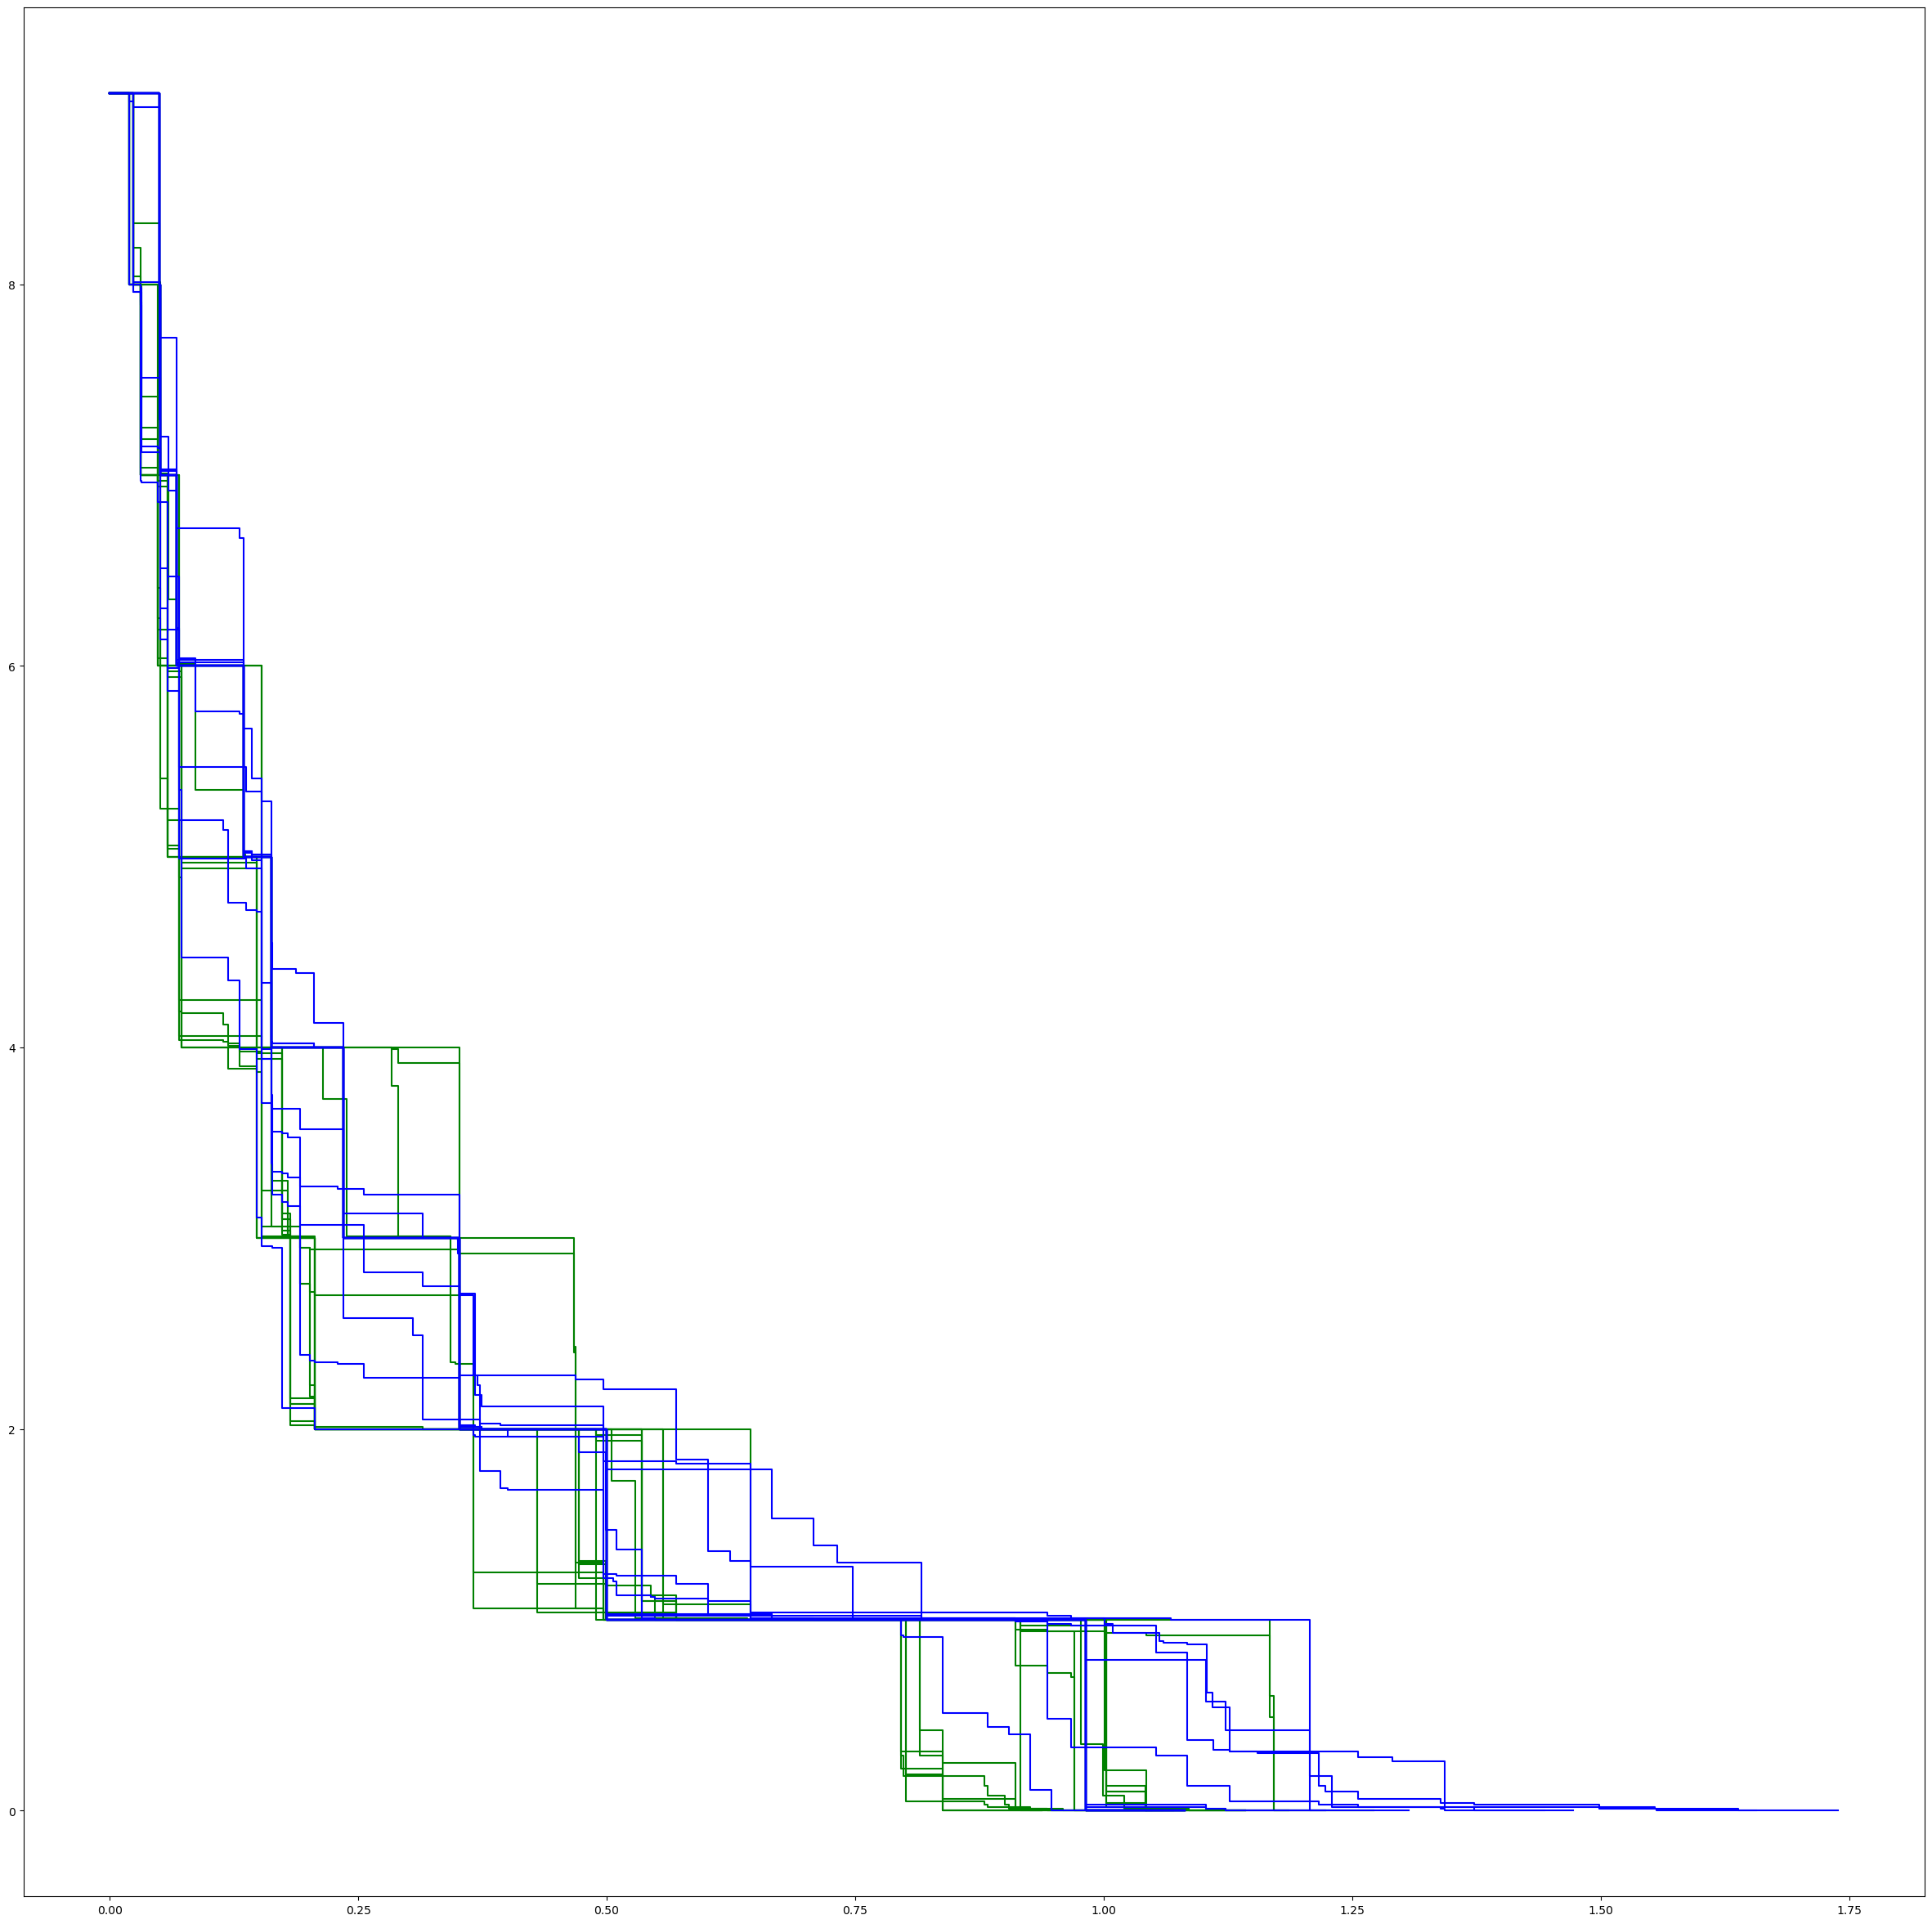

In [23]:
for k in distributions.keys():
    fig = plt.figure(k,figsize=(30,30))
    i = 0
    for f in h0_sr_00[k]:
        f.plot(color = "green")
        i += 1
    
    for f in h0_sr_01[k]:
        f.plot(color = "blue")
        i += 1
        
print(i)

50


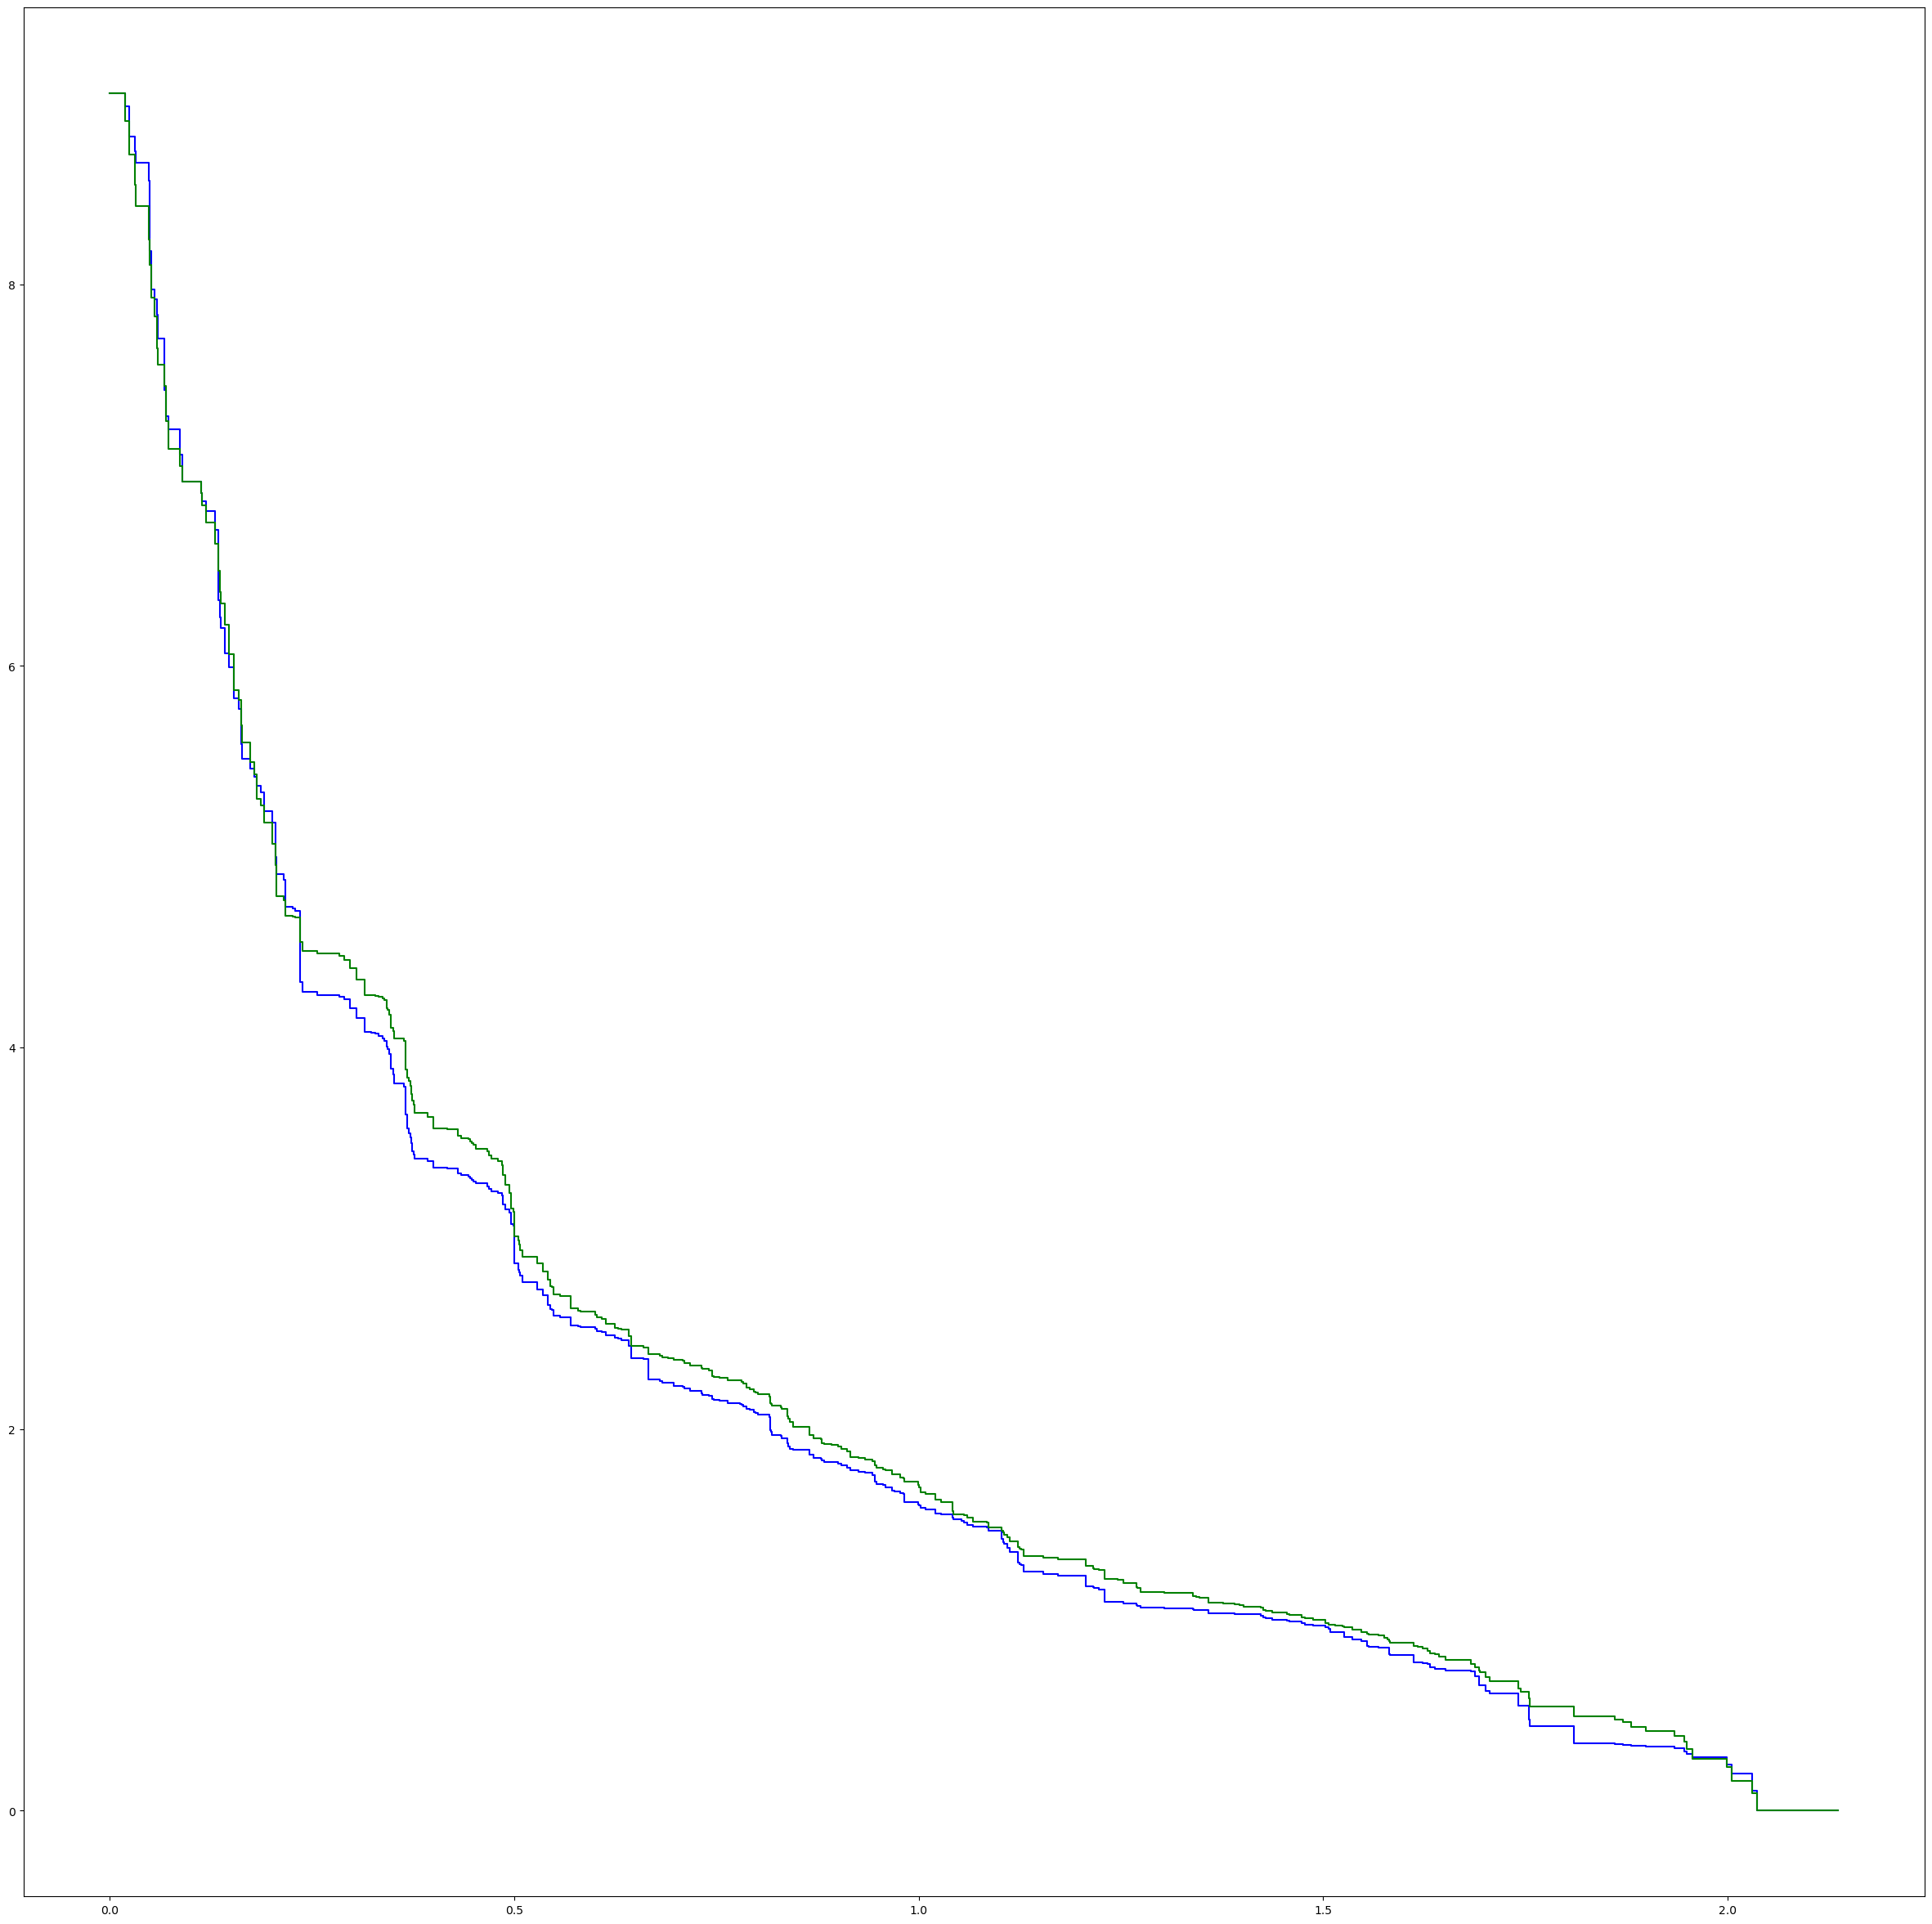

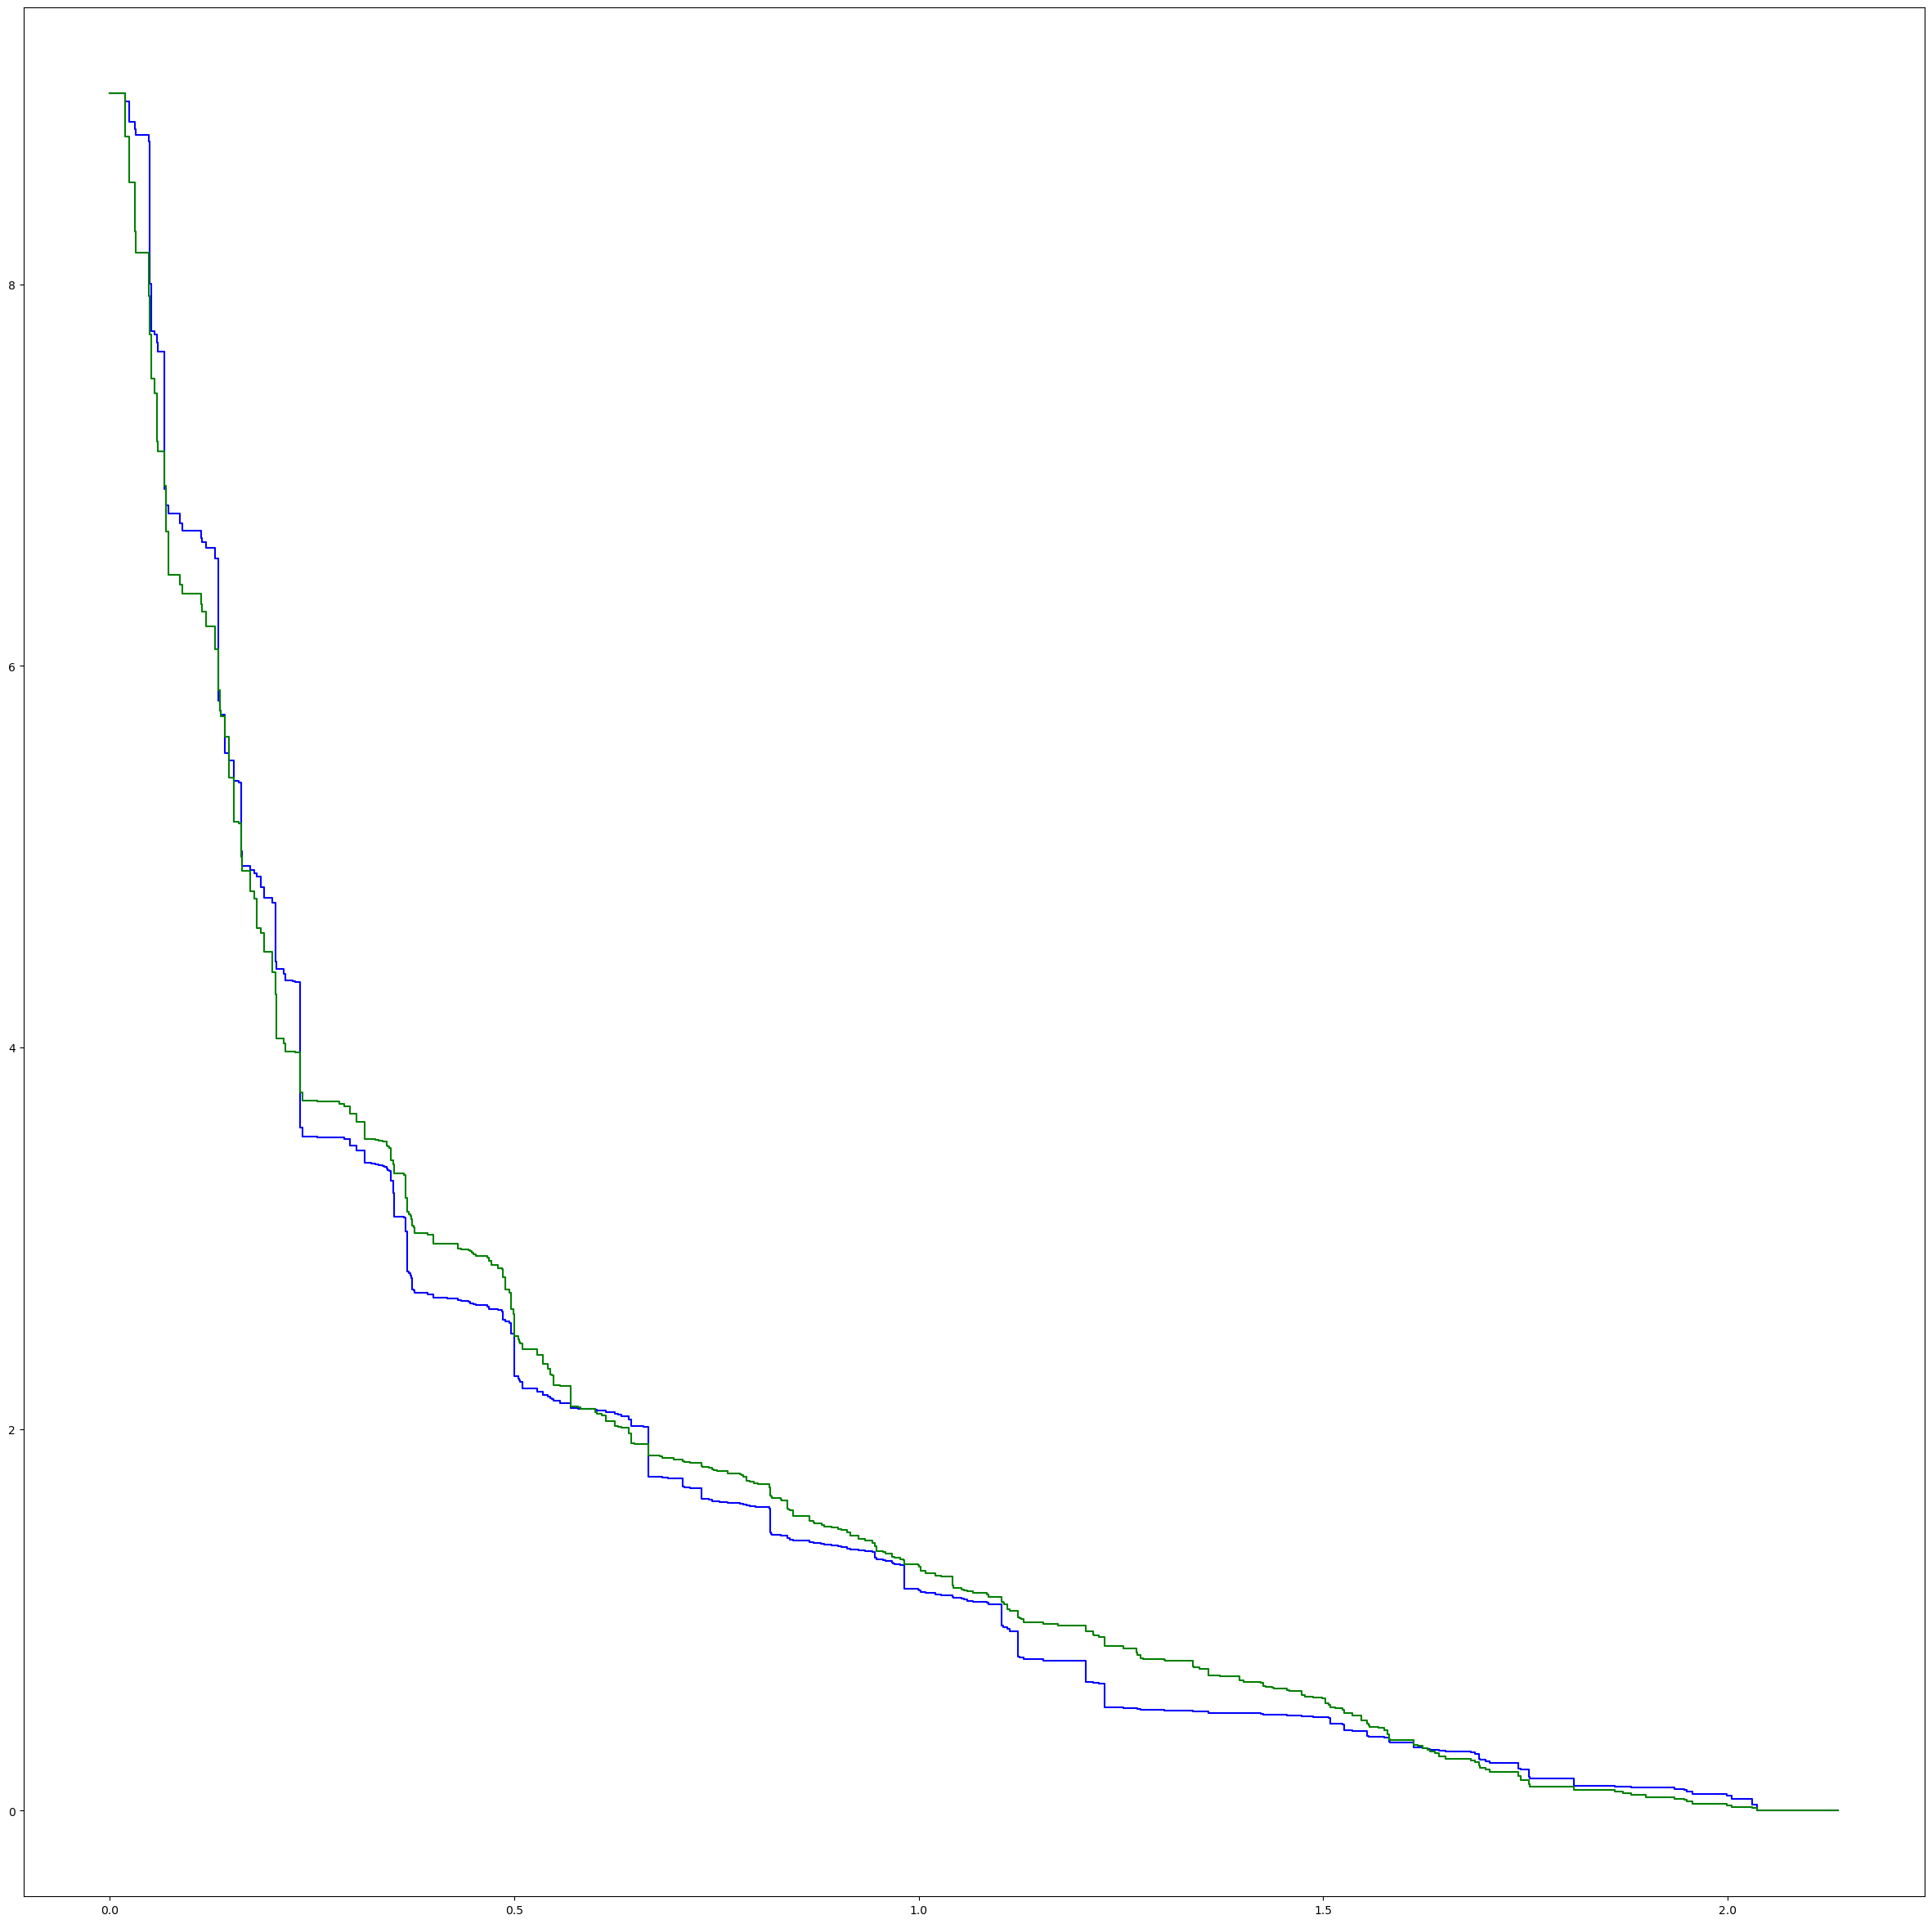

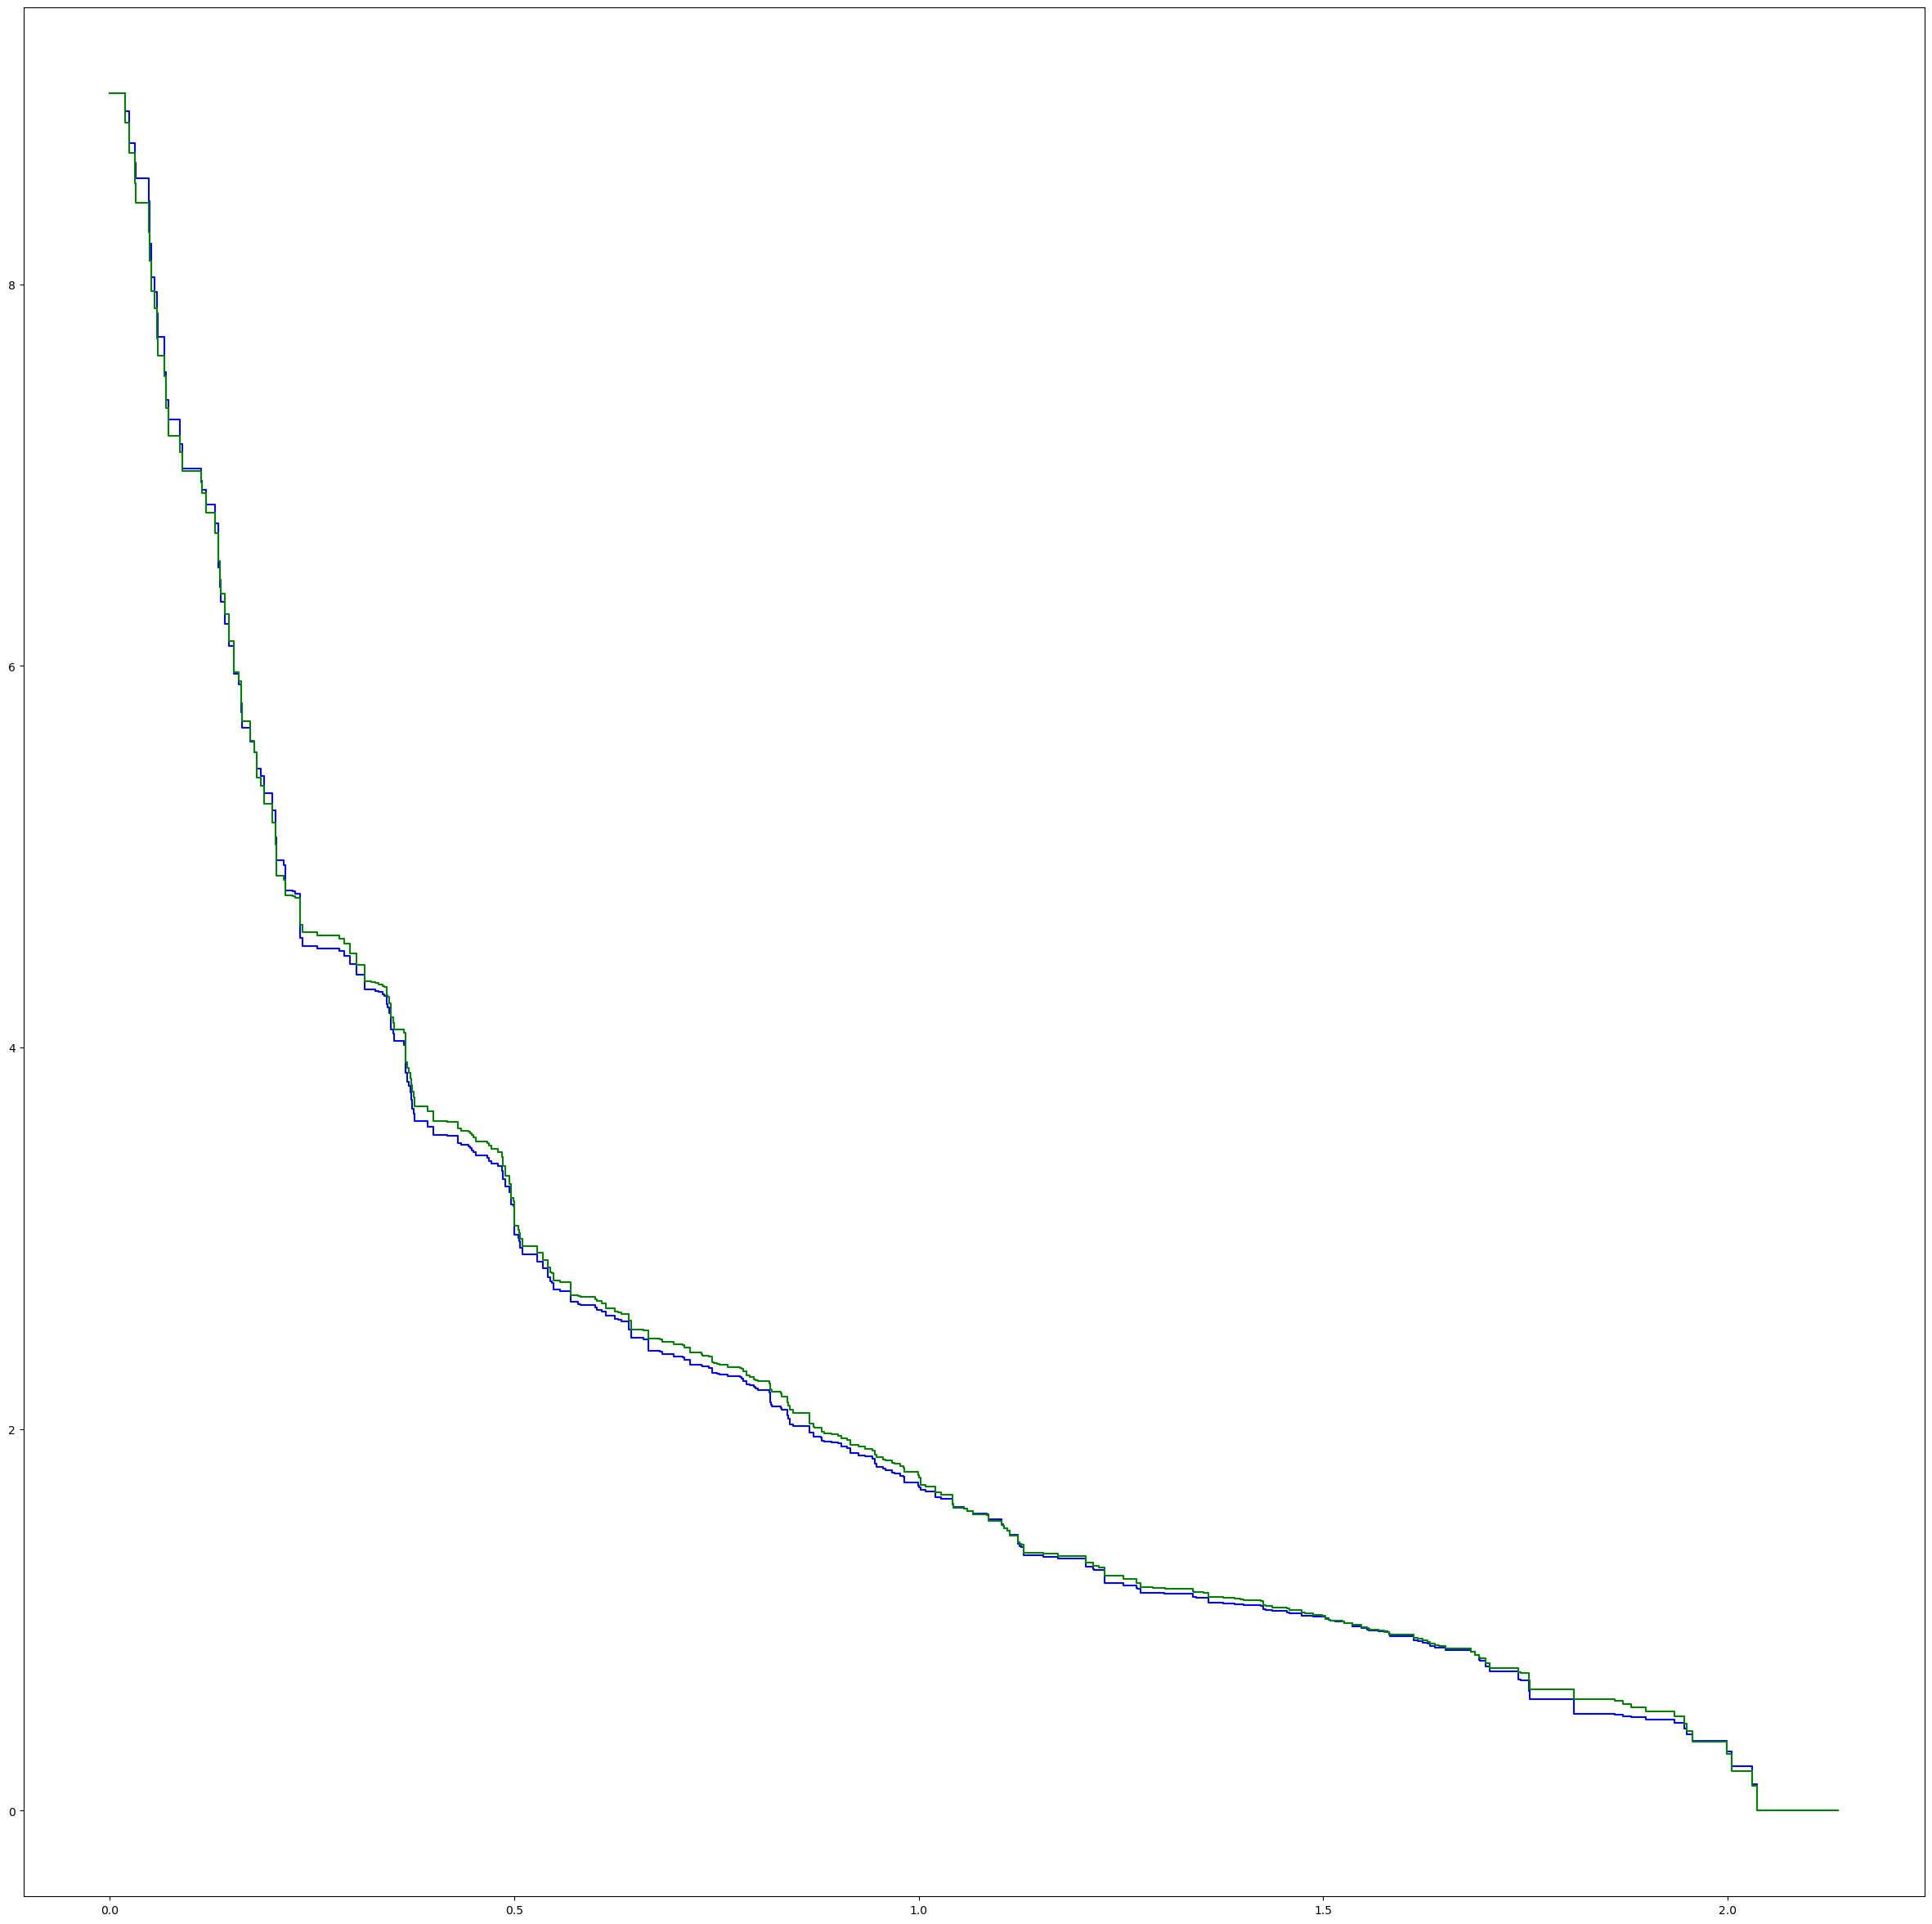

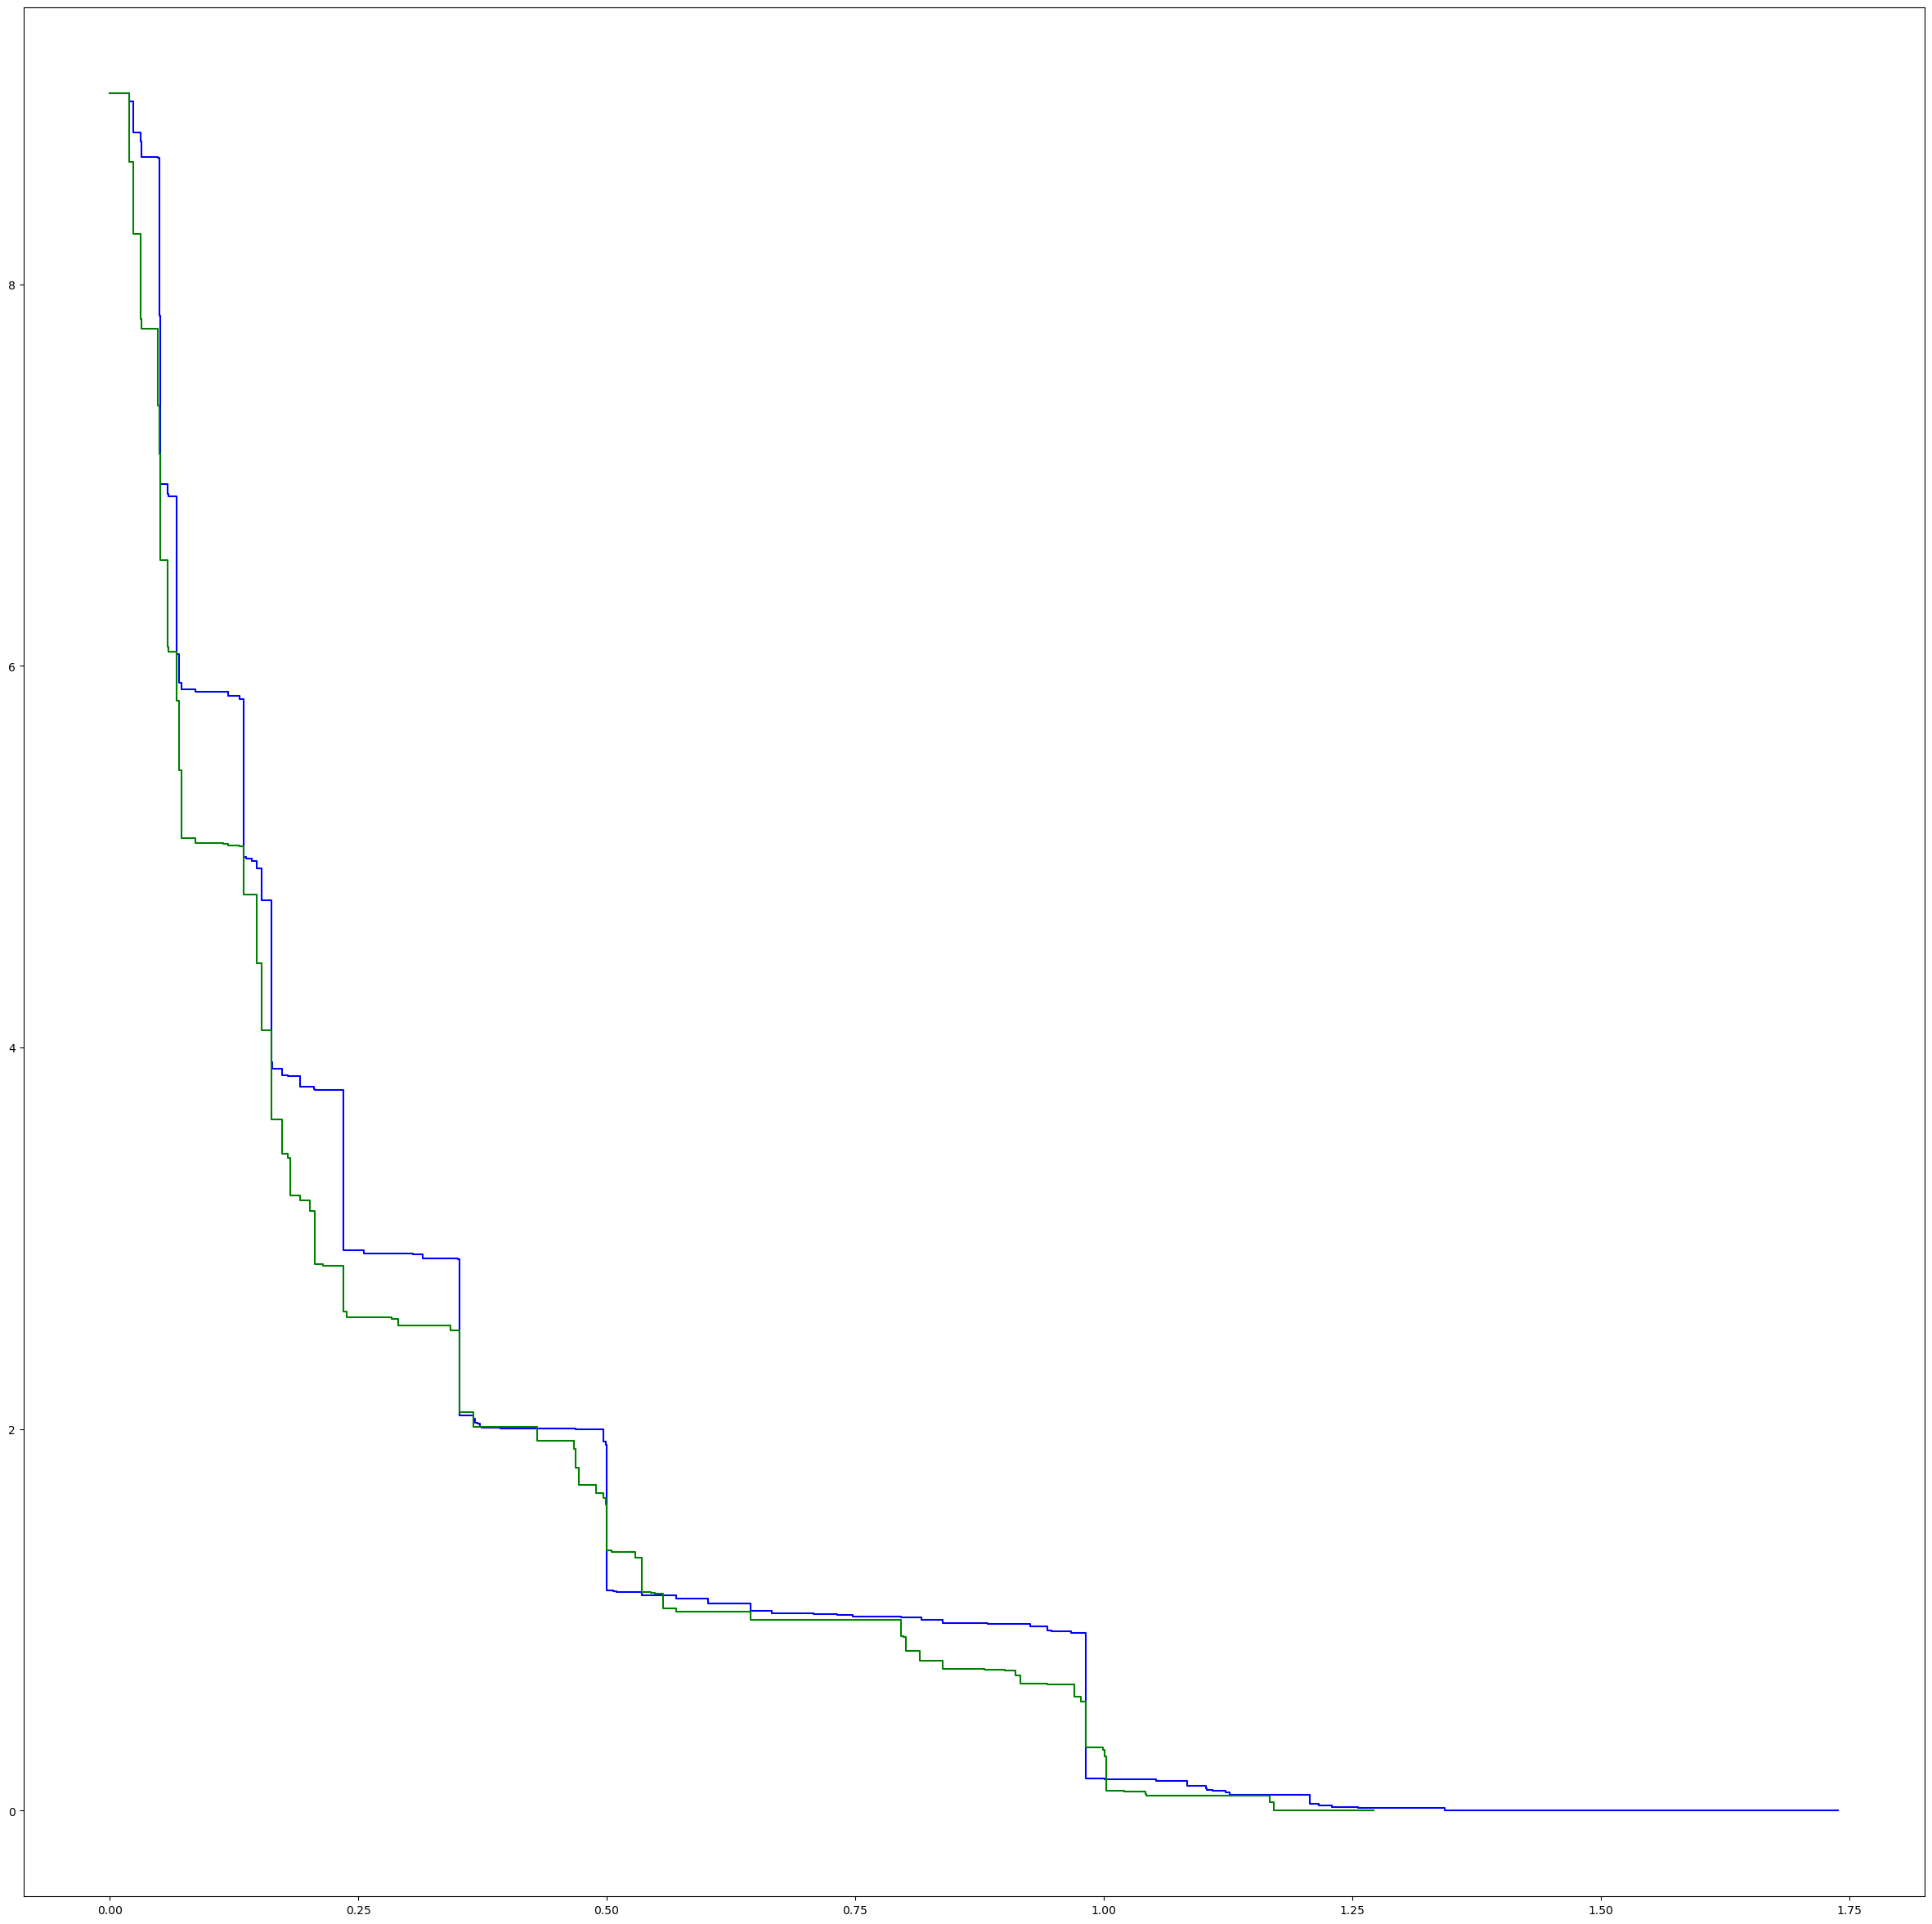

In [24]:
for k in distributions.keys():
    fig = plt.figure(k,figsize=(30,30))
    i = 0
    m_0=0
    m_1=0
    for f in h0_sr_01[k]:
        m_1=m_1+f
        i += 1
    m_1=m_1/25
    m_1.plot(color="blue")
    for f in h0_sr_00[k]:
        m_0=m_0+f
        i += 1
    m_0=m_0/25
    m_0.plot(color="green")
        
print(i)

In [25]:
#Idea: no utilizar la media de "todos los unos" o "todos los ceros", sino la media de los unos mas cercanos o los ceros mas cercanos

In [54]:
def analizar_punto_stable_rank(punto,puntos_ceros,puntos_unos,mh0_00,mh0_11,mh0_01,mh0_10,mh1_00,mh1_11,mh1_01,mh1_10,distributions,number_instances,sample_size,contour=sr.standard_contour(),clustering_method="complete",w_p=inf,w_q=1,reduced=True,p=2):
    (mh0_00_p,mh0_11_p,mh0_01_p,mh0_10_p,mh1_00_p,mh1_11_p,mh1_01_p,mh1_10_p)=calcular_sranks_punto_v_muestra(punto,puntos_ceros,puntos_unos,distributions,number_instances,sample_size,contour=sr.standard_contour(),clustering_method="complete",w_p=inf,w_q=1,reduced=True)
    
    clase={}
    for k in  distributions.keys():
        distance_cero=max(abs(mh0_00[k].lp_distance(mh0_00_p[k],p)),abs(mh0_10[k].lp_distance(mh0_10_p[k],p)))
        distance_uno=max(abs(mh0_11[k].lp_distance(mh0_11_p[k],p)),abs(mh0_01[k].lp_distance(mh0_01_p[k],p)))

        
        if distance_cero>distance_uno:
            clase[k]=1
        else:
            clase[k]=0
    return clase

In [27]:
#To do: hacer que la parte de arriba sean programas:calcular el srank de los ceros wr los unos, los unos wr los ceros para poder llamarlo como llamo los de arriba a los normales.

In [28]:
def calcular_sranks_muestra(puntos_ceros,puntos_unos,distributions,number_instances,sample_size,contour=sr.standard_contour(),clustering_method="single",w_p=inf,w_q=1,reduced=True):
    
    n_ceros=len(puntos_ceros)
    n_unos=len(puntos_unos)
    
    ceros_distances=squareform(pdist(puntos_ceros,"euclidean"))
    distance_ceros=sr.Distance(ceros_distances)
    
    unos_distances=squareform(pdist(puntos_unos,"euclidean"))
    distance_unos=sr.Distance(unos_distances)
    
    ceros_wr_unos_distances=[]
    for point in puntos_unos:
        d_ceros_mod = squareform(pdist(np.array([point.tolist()]+puntos_ceros.tolist()), "euclidean"))
        l=d_ceros_mod[0].tolist()
        l.pop(0)
        ceros_wr_unos_distances.append(l)
    ceros_wr_unos_distances=np.array(ceros_wr_unos_distances)
    
    unos_wr_ceros_distances=[]
    for point in puntos_ceros:
        d_unos_mod = squareform(pdist(np.array([point.tolist()]+puntos_unos.tolist()), "euclidean"))
        l=d_unos_mod[0].tolist()
        l.pop(0)
        unos_wr_ceros_distances.append(l)
    unos_wr_ceros_distances=np.array(unos_wr_ceros_distances)
    
    start = timer()    
    h0_sr_00 = {}
    h1_sr_00 = {}
    h0_sr_11 = {}
    h1_sr_11 = {}
    h0_sr_01 = {}
    h1_sr_01 = {}
    h0_sr_10 = {}
    h1_sr_10 = {}
    mh0_00 = {}
    mh1_00 = {}
    mh0_11 = {}
    mh1_11 = {}
    mh0_01 = {}
    mh1_01 = {}
    mh0_10 = {}
    mh1_10 = {}
    for k in  distributions.keys():
        h0_sr_00[k] = []
        h1_sr_00[k] = []
        h0_sr_11[k] = []
        h1_sr_11[k] = []
        h0_sr_01[k] = []
        h1_sr_01[k] = []
        h0_sr_10[k] = []
        h1_sr_10[k] = []
        mh0_00[k] = 0
        mh1_00[k] = 0
        mh0_11[k] = 0
        mh1_11[k] = 0
        mh0_01[k] = 0
        mh1_01[k] = 0
        mh0_10[k] = 0
        mh1_10[k] = 0
        for point in ceros_distances:
            p = distributions[k](point)
            s = sr.get_sample(number_instances, sample_size, p)
            f = distance_ceros.get_h0sr(sample=s,contour=sr.standard_contour(),clustering_method="single",w_p=inf,w_q=1,reduced=True)
            b = distance_ceros.get_bc(sample=s, maxdim=1)
            g = sr.bc_to_sr(b,degree="H1")
            h0_sr_00[k].append(f)
            h1_sr_00[k].append(g)
            mh0_00[k] = mh0_00[k]+f
            mh1_00[k] = mh1_00[k]+g
            
        for point in unos_distances:
            p = distributions[k](point)
            s = sr.get_sample(number_instances, sample_size, p)
            f = distance_unos.get_h0sr(sample=s,contour=sr.standard_contour(),clustering_method="single",w_p=inf,w_q=1,reduced=True)
            b = distance_unos.get_bc(sample=s, maxdim=1)
            g = sr.bc_to_sr(b,degree="H1")
            h0_sr_11[k].append(f)
            h1_sr_11[k].append(g)
            mh0_11[k] = mh0_11[k]+f
            mh1_11[k] = mh1_11[k]+g
        
        for point in ceros_wr_unos_distances:
            p = distributions[k](point)
            s = sr.get_sample(number_instances, sample_size, p)
            f = distance_ceros.get_h0sr(sample=s,contour=sr.standard_contour(),clustering_method="single",w_p=inf,w_q=1,reduced=True)
            b = distance_ceros.get_bc(sample=s, maxdim=1)
            g = sr.bc_to_sr(b,degree="H1")
            h0_sr_01[k].append(f)
            h1_sr_01[k].append(g)
            mh0_01[k] = mh0_01[k]+f
            mh1_01[k] = mh1_01[k]+g
        
        for point in unos_wr_ceros_distances:
            p = distributions[k](point)
            s = sr.get_sample(number_instances, sample_size, p)
            f = distance_unos.get_h0sr(sample=s,contour=sr.standard_contour(),clustering_method="single",w_p=inf,w_q=1,reduced=True)
            b = distance_unos.get_bc(sample=s, maxdim=1)
            g = sr.bc_to_sr(b,degree="H1")
            h0_sr_10[k].append(f)
            h1_sr_10[k].append(g)
            mh0_10[k] = mh0_10[k]+f
            mh1_10[k] = mh1_10[k]+g
            
    end = timer()
    print(timedelta(seconds=end-start))
    
    for k in distributions.keys():
        mh0_00[k] = mh0_00[k]/n_ceros
        mh1_00[k] = mh1_00[k]/n_ceros
        mh0_11[k] = mh0_11[k]/n_unos
        mh1_11[k] = mh1_11[k]/n_unos
        mh0_01[k] = mh0_01[k]/n_ceros
        mh1_01[k] = mh1_01[k]/n_ceros
        mh0_10[k] = mh0_10[k]/n_unos
        mh1_10[k] = mh1_10[k]/n_unos
    
    return (mh0_00,mh0_11,mh0_01,mh0_10,mh1_00,mh1_11,mh1_01,mh1_10)

In [29]:
def calcular_sranks_punto_v_muestra(punto,puntos_ceros,puntos_unos,distributions,number_instances,sample_size,contour=sr.standard_contour(),clustering_method="single",w_p=inf,w_q=1,reduced=True):
    
    n_ceros=len(puntos_ceros)
    n_unos=len(puntos_unos)
    
    ceros_distances=squareform(pdist(ceros_toy,"euclidean"))
    distance_ceros=sr.Distance(ceros_distances)
    
    unos_distances=squareform(pdist(unos_toy,"euclidean"))
    distance_unos=sr.Distance(unos_distances)
    
    ceros_wr_punto_distances=[]
    d_ceros_mod = squareform(pdist(np.array([punto.tolist()]+ceros_toy.tolist()), "euclidean"))
    l=d_ceros_mod[0].tolist()
    l.pop(0)
    ceros_wr_punto_distances.append(l)
    ceros_wr_punto_distances=np.array(ceros_wr_punto_distances)
    
    unos_wr_punto_distances=[]
    d_unos_mod = squareform(pdist(np.array([punto.tolist()]+unos_toy.tolist()), "euclidean"))
    l=d_unos_mod[0].tolist()
    l.pop(0)
    unos_wr_punto_distances.append(l)
    unos_wr_punto_distances=np.array(unos_wr_punto_distances)
    
    distance_ceros_mod=sr.Distance(d_ceros_mod)
    distance_unos_mod=sr.Distance(d_unos_mod)
    
    start = timer()    
    h0_sr_00 = {}
    h1_sr_00 = {}
    h0_sr_11 = {}
    h1_sr_11 = {}
    h0_sr_01 = {}
    h1_sr_01 = {}
    h0_sr_10 = {}
    h1_sr_10 = {}
    mh0_00 = {}
    mh1_00 = {}
    mh0_11 = {}
    mh1_11 = {}
    mh0_01 = {}
    mh1_01 = {}
    mh0_10 = {}
    mh1_10 = {}
    for k in  distributions.keys():
        h0_sr_00[k] = []
        h1_sr_00[k] = []
        h0_sr_11[k] = []
        h1_sr_11[k] = []
        h0_sr_01[k] = []
        h1_sr_01[k] = []
        h0_sr_10[k] = []
        h1_sr_10[k] = []
        mh0_00[k] = 0
        mh1_00[k] = 0
        mh0_11[k] = 0
        mh1_11[k] = 0
        mh0_01[k] = 0
        mh1_01[k] = 0
        mh0_10[k] = 0
        mh1_10[k] = 0
        for point in ceros_wr_punto_distances:
            p = distributions[k](point)
            s = sr.get_sample(number_instances, sample_size, p)
            f = distance_ceros_mod.get_h0sr(sample=s,contour=sr.standard_contour(),clustering_method="single",w_p=inf,w_q=1,reduced=True)
            b = distance_ceros_mod.get_bc(sample=s, maxdim=1)
            g = sr.bc_to_sr(b,degree="H1")
            h0_sr_00[k].append(f)
            h1_sr_00[k].append(g)
            mh0_00[k] = mh0_00[k]+f
            mh1_00[k] = mh1_00[k]+g
            
        for point in unos_wr_punto_distances:
            p = distributions[k](point)
            s = sr.get_sample(number_instances, sample_size, p)
            f = distance_unos_mod.get_h0sr(sample=s,contour=sr.standard_contour(),clustering_method="single",w_p=inf,w_q=1,reduced=True)
            b = distance_unos_mod.get_bc(sample=s, maxdim=1)
            g = sr.bc_to_sr(b,degree="H1")
            h0_sr_11[k].append(f)
            h1_sr_11[k].append(g)
            mh0_11[k] = mh0_11[k]+f
            mh1_11[k] = mh1_11[k]+g
        
        for point in ceros_wr_punto_distances:
            p = distributions[k](point)
            s = sr.get_sample(number_instances, sample_size, p)
            f = distance_ceros.get_h0sr(sample=s,contour=sr.standard_contour(),clustering_method="single",w_p=inf,w_q=1,reduced=True)
            b = distance_ceros.get_bc(sample=s, maxdim=1)
            g = sr.bc_to_sr(b,degree="H1")
            h0_sr_01[k].append(f)
            h1_sr_01[k].append(g)
            mh0_01[k] = mh0_01[k]+f
            mh1_01[k] = mh1_01[k]+g
        
        for point in unos_wr_punto_distances:
            p = distributions[k](point)
            s = sr.get_sample(number_instances, sample_size, p)
            f = distance_unos.get_h0sr(sample=s,contour=sr.standard_contour(),clustering_method="single",w_p=inf,w_q=1,reduced=True)
            b = distance_unos.get_bc(sample=s, maxdim=1)
            g = sr.bc_to_sr(b,degree="H1")
            h0_sr_10[k].append(f)
            h1_sr_10[k].append(g)
            mh0_10[k] = mh0_10[k]+f
            mh1_10[k] = mh1_10[k]+g
            
    end = timer()
    print(timedelta(seconds=end-start))
    print(h0_sr_00)
    print(h0_sr_01)
    
    for k in distributions.keys():
        mh0_00[k] = mh0_00[k]
        mh1_00[k] = mh1_00[k]
        mh0_11[k] = mh0_11[k]
        mh1_11[k] = mh1_11[k]
        mh0_01[k] = mh0_01[k]
        mh1_01[k] = mh1_01[k]
        mh0_10[k] = mh0_10[k]
        mh1_10[k] = mh1_10[k]
    
    return (mh0_00,mh0_11,mh0_01,mh0_10,mh1_00,mh1_11,mh1_01,mh1_10)

In [30]:
(mh0_00,mh0_11,mh0_01,mh0_10,mh1_00,mh1_11,mh1_01,mh1_10)=calcular_sranks_muestra(ceros_toy,unos_toy,distributions,number_instances,sample_size,clustering_method="complete")

0:01:08.214686


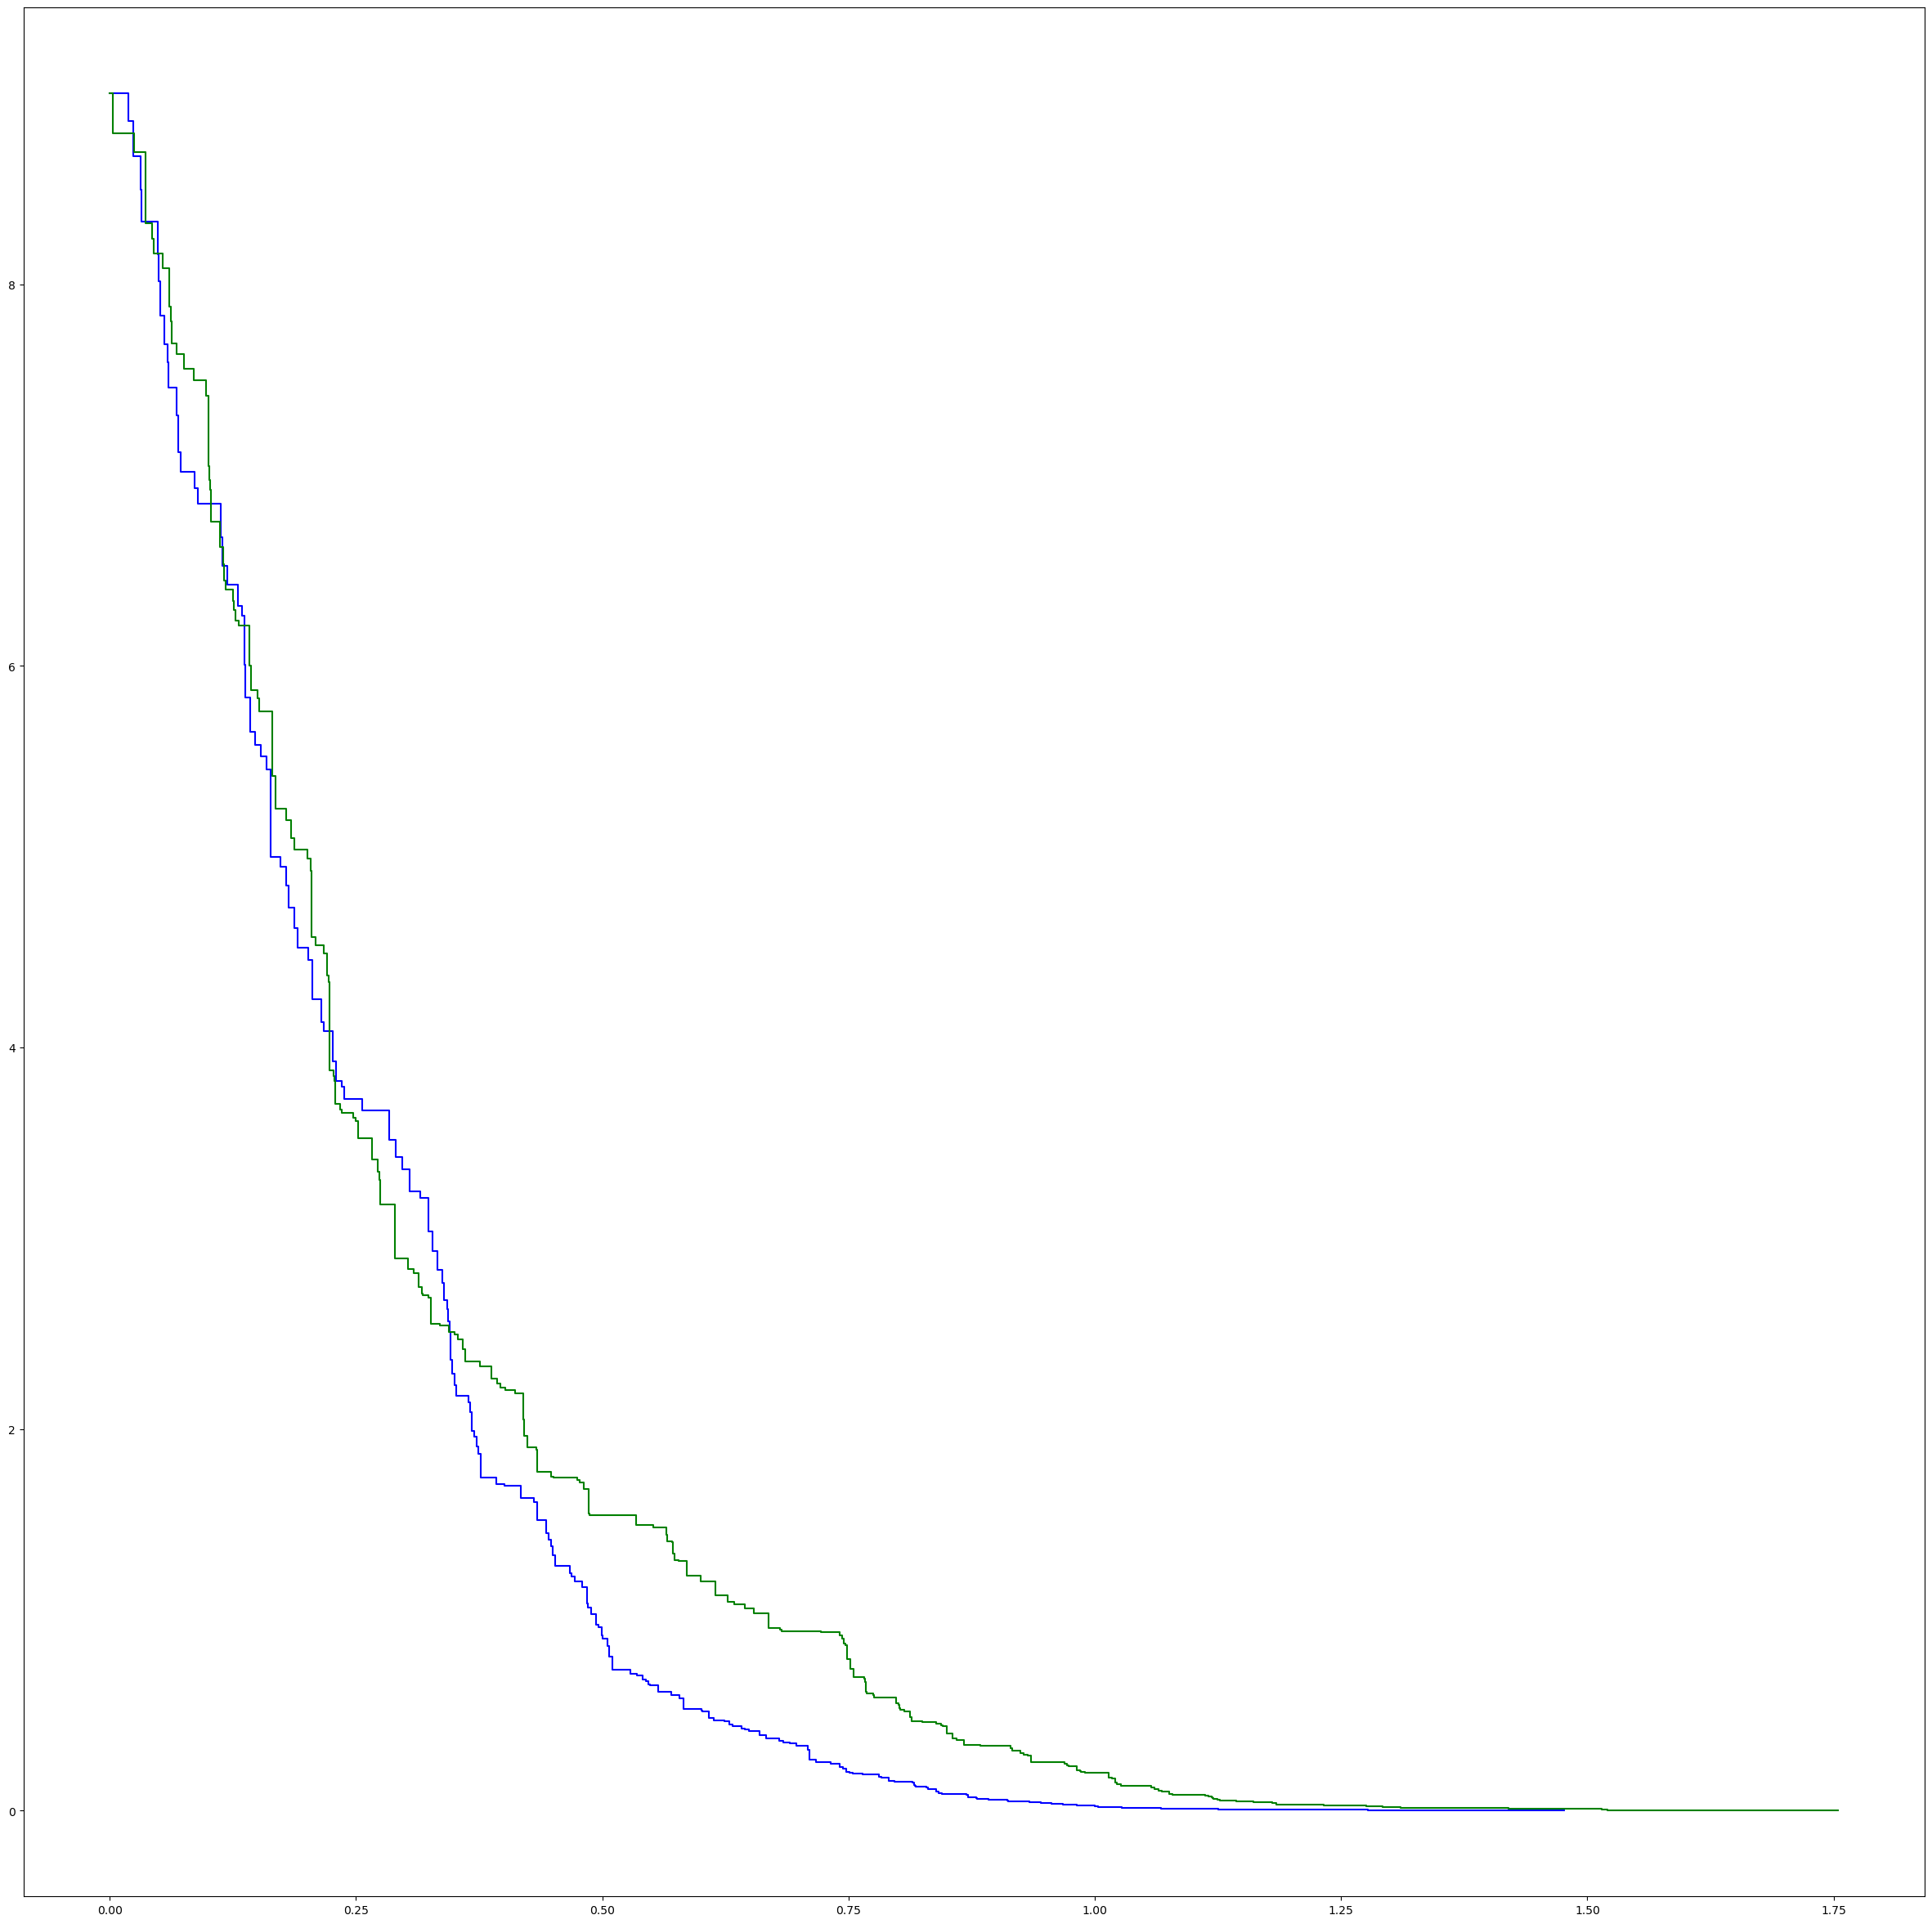

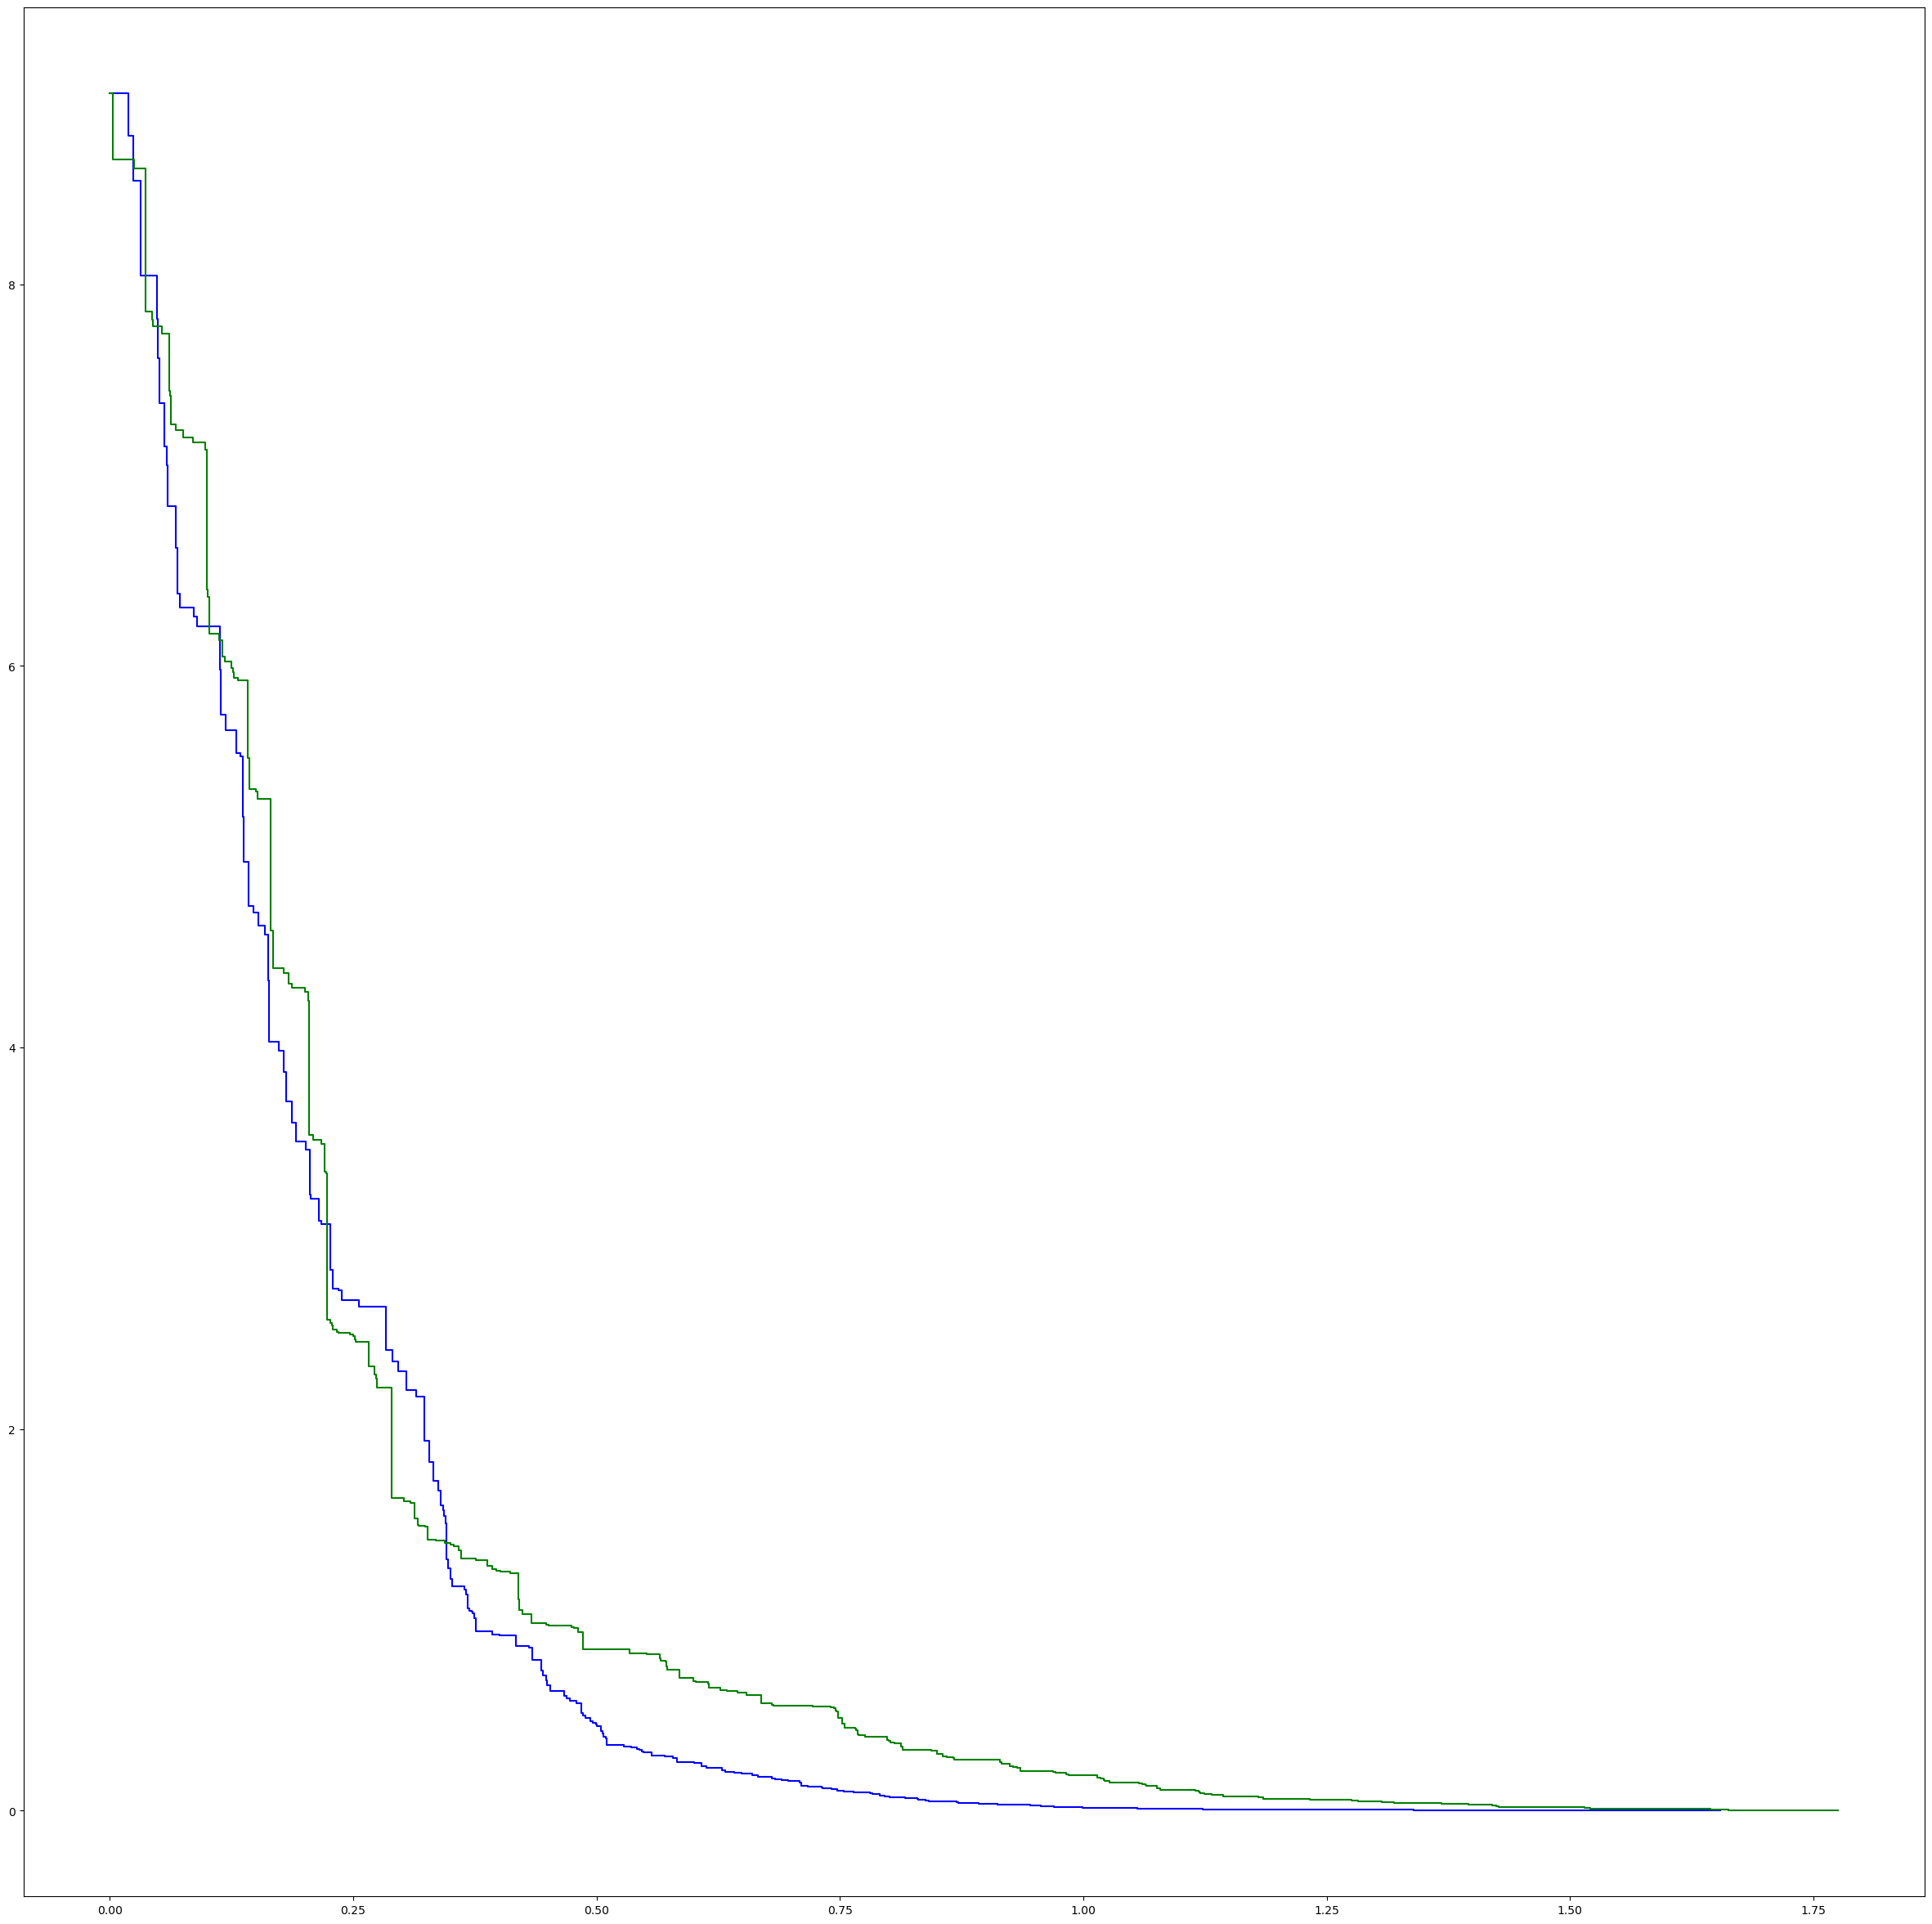

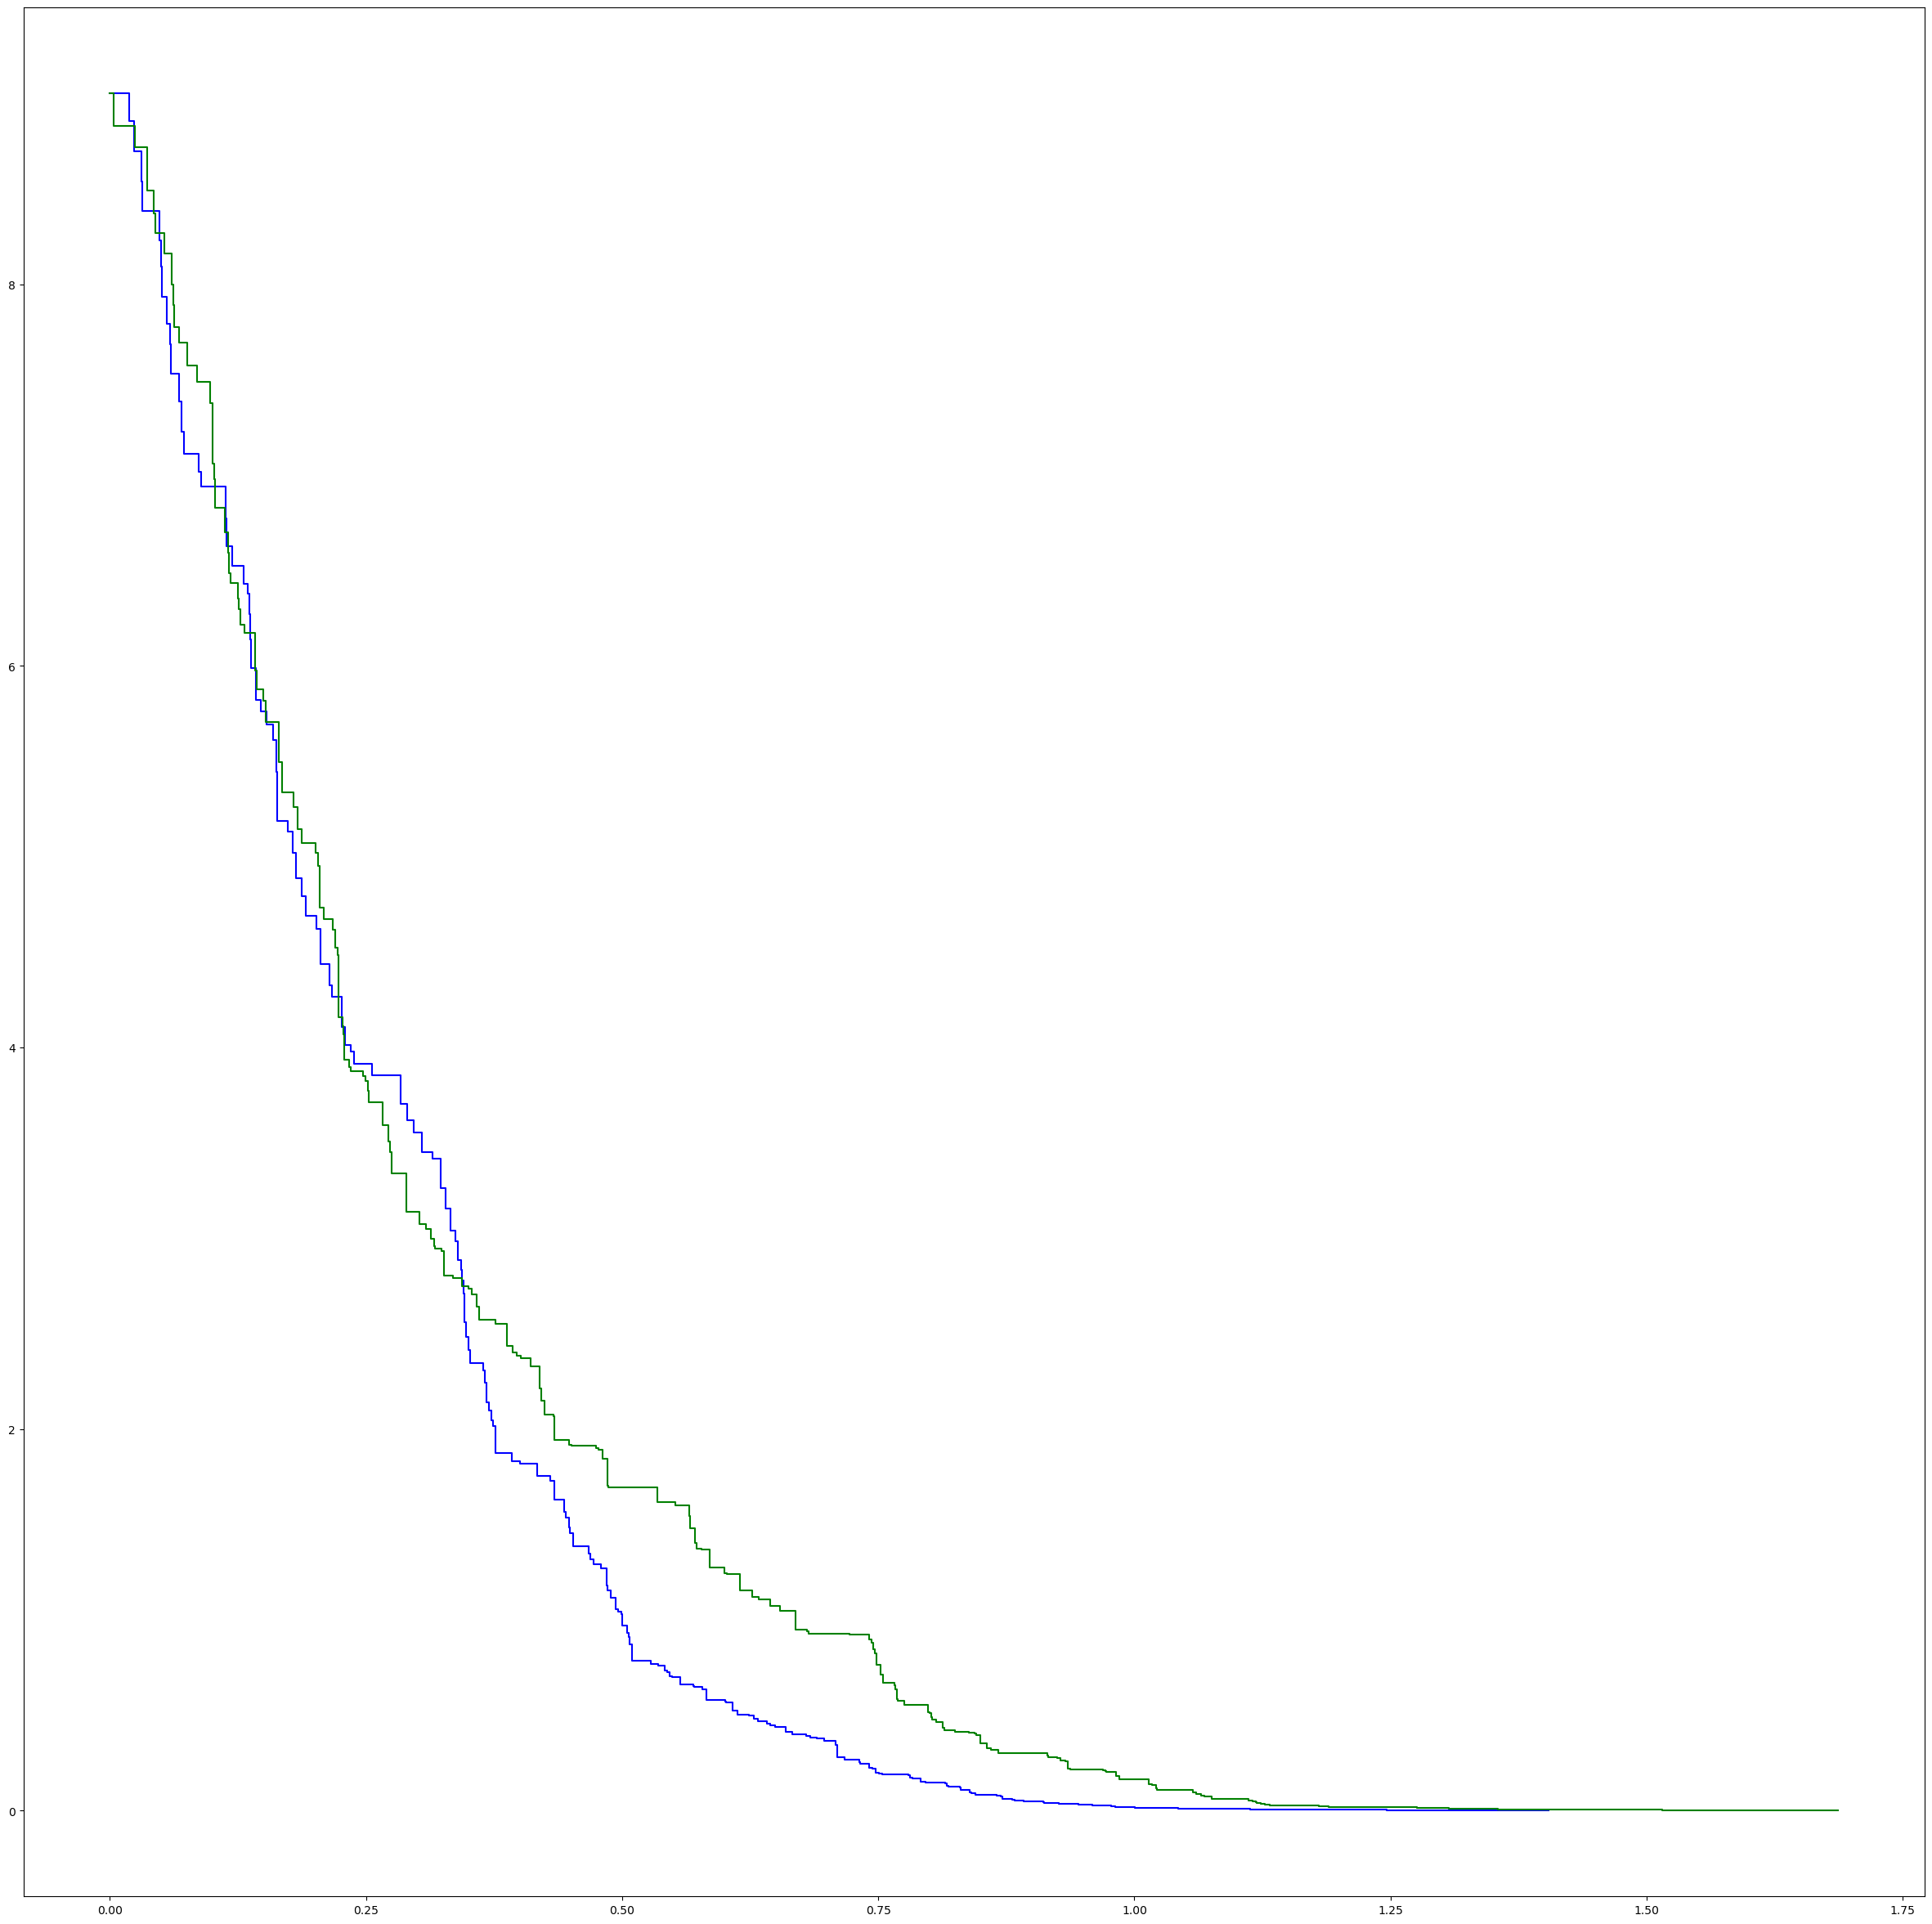

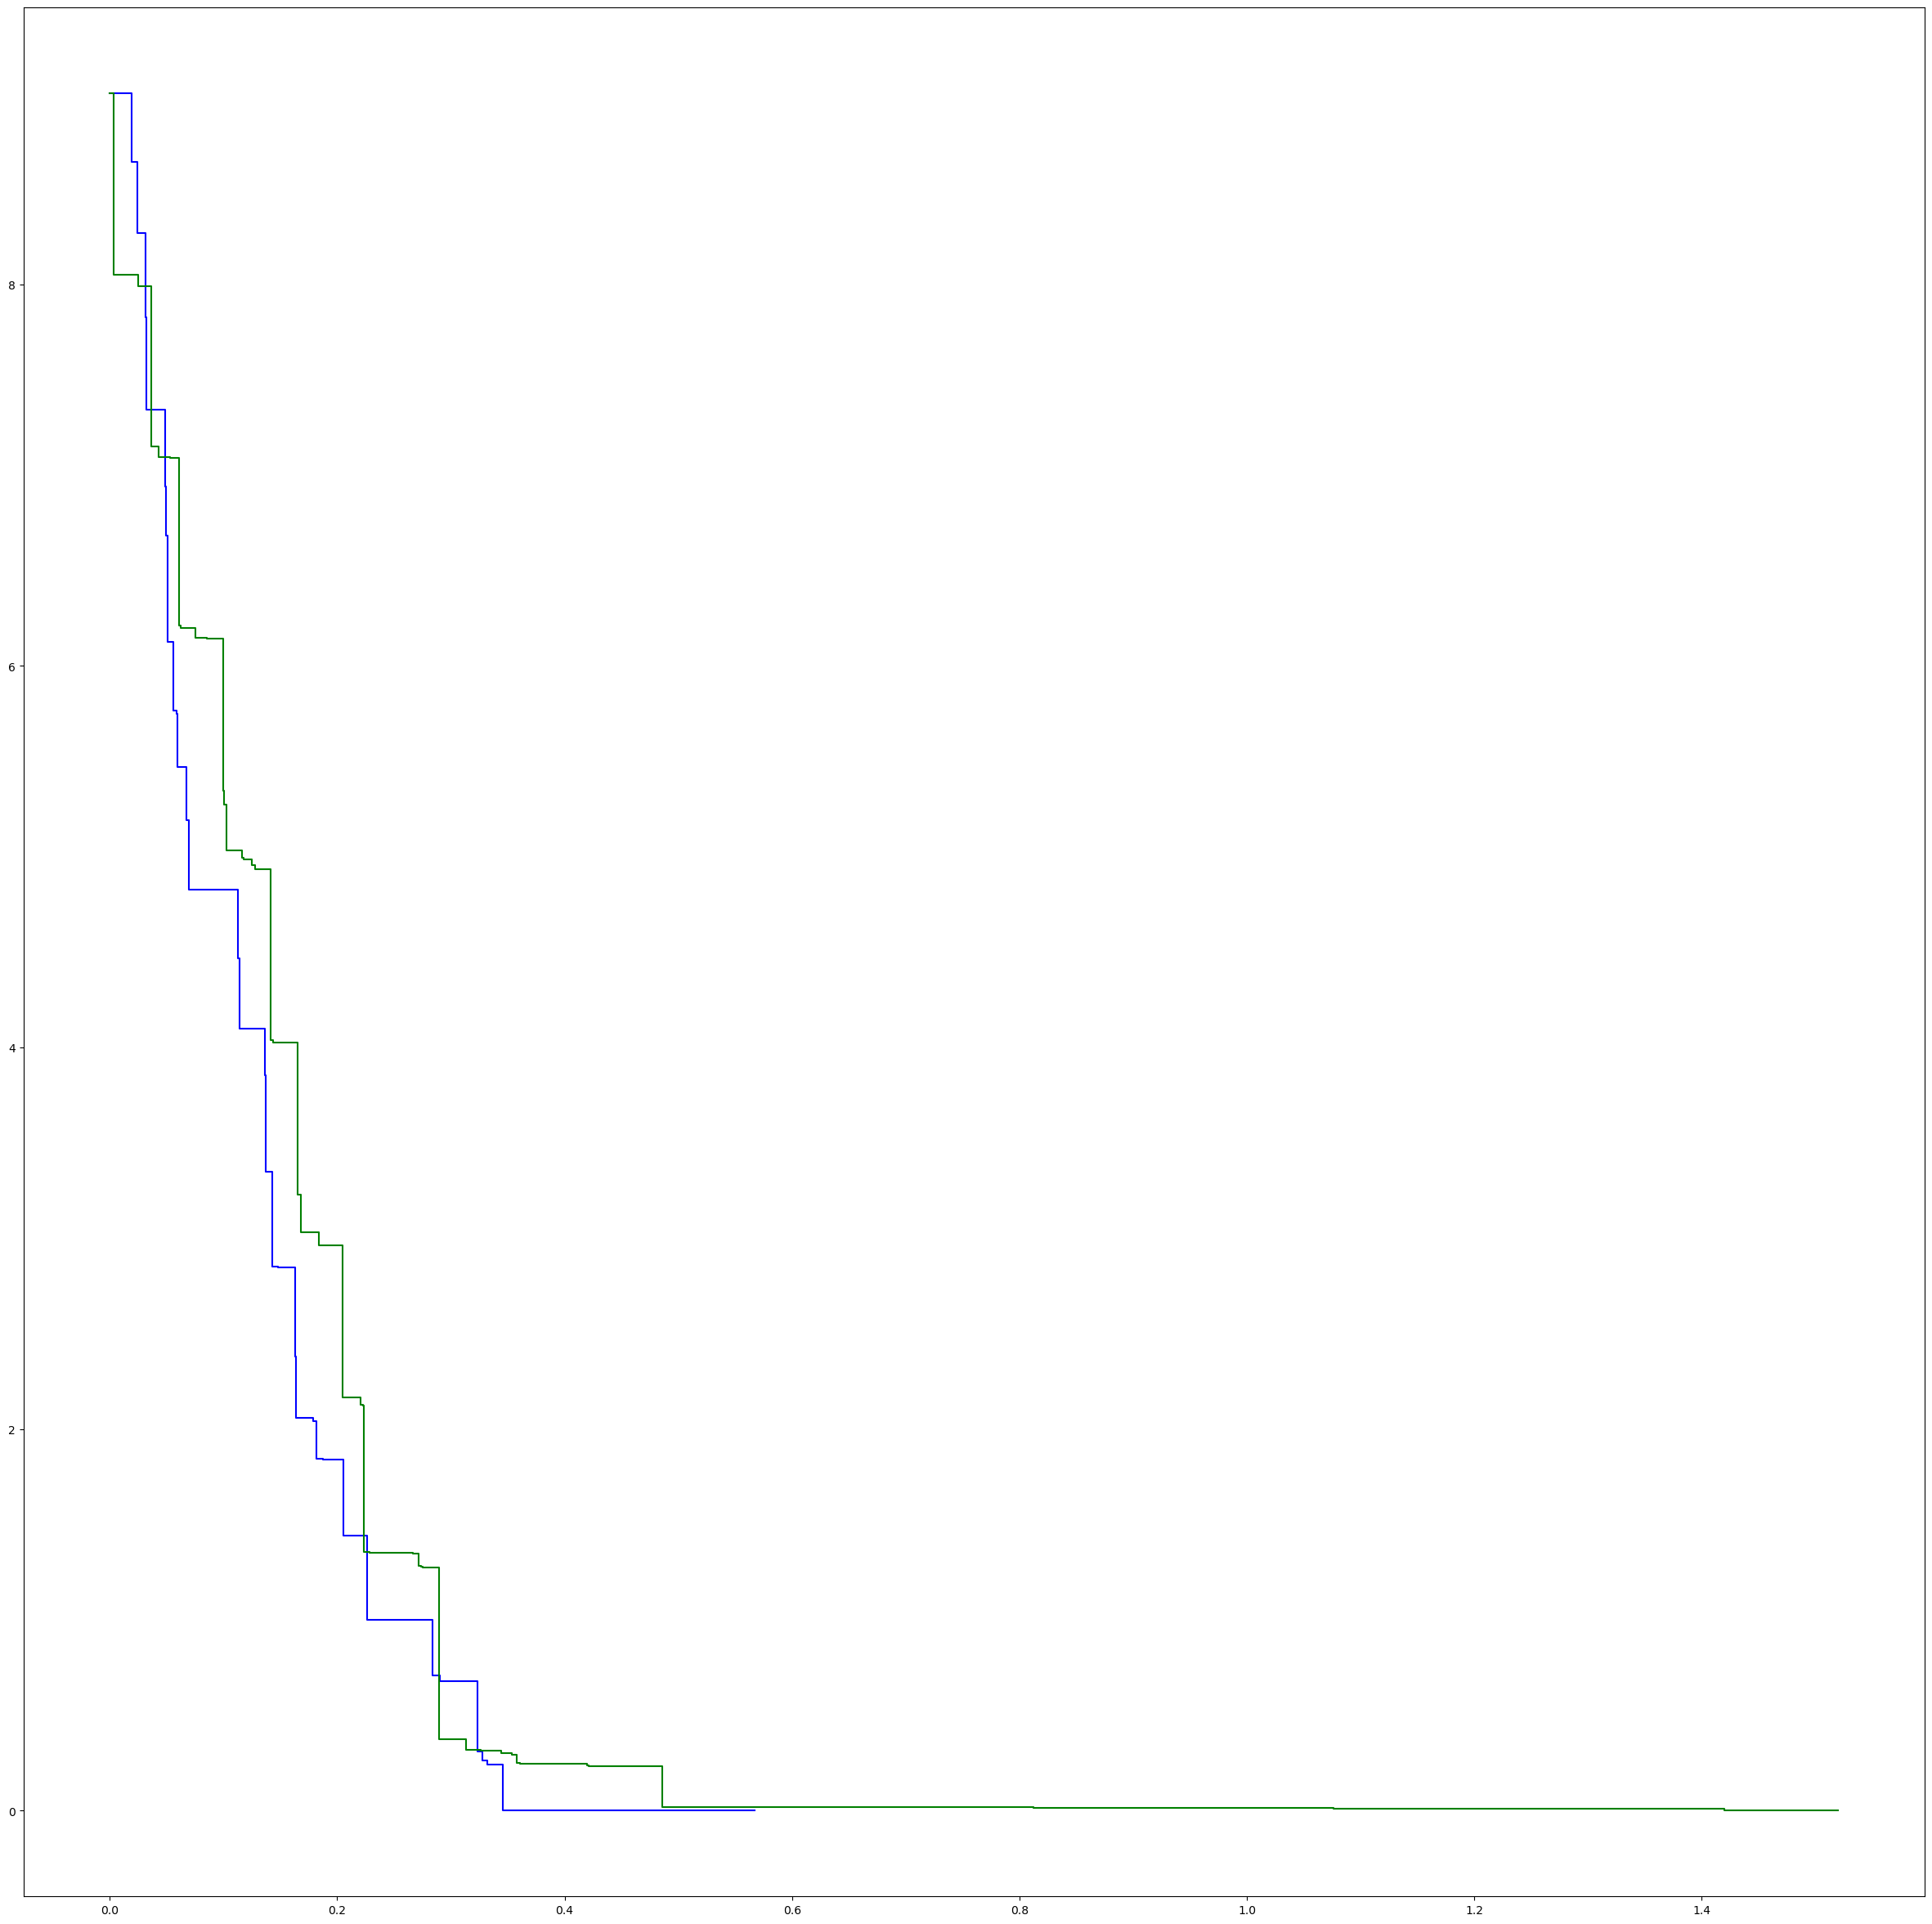

In [36]:
for k in distributions.keys():
    fig = plt.figure(k,figsize=(30,30))
    mh0_00[k].plot(color="blue")
    mh0_10[k].plot(color="green")
    
#I put here the srank of the zeroes wr themselves and of the ones with respect to the zeroes. This are computed knowing that
#The point of reference is a zero.

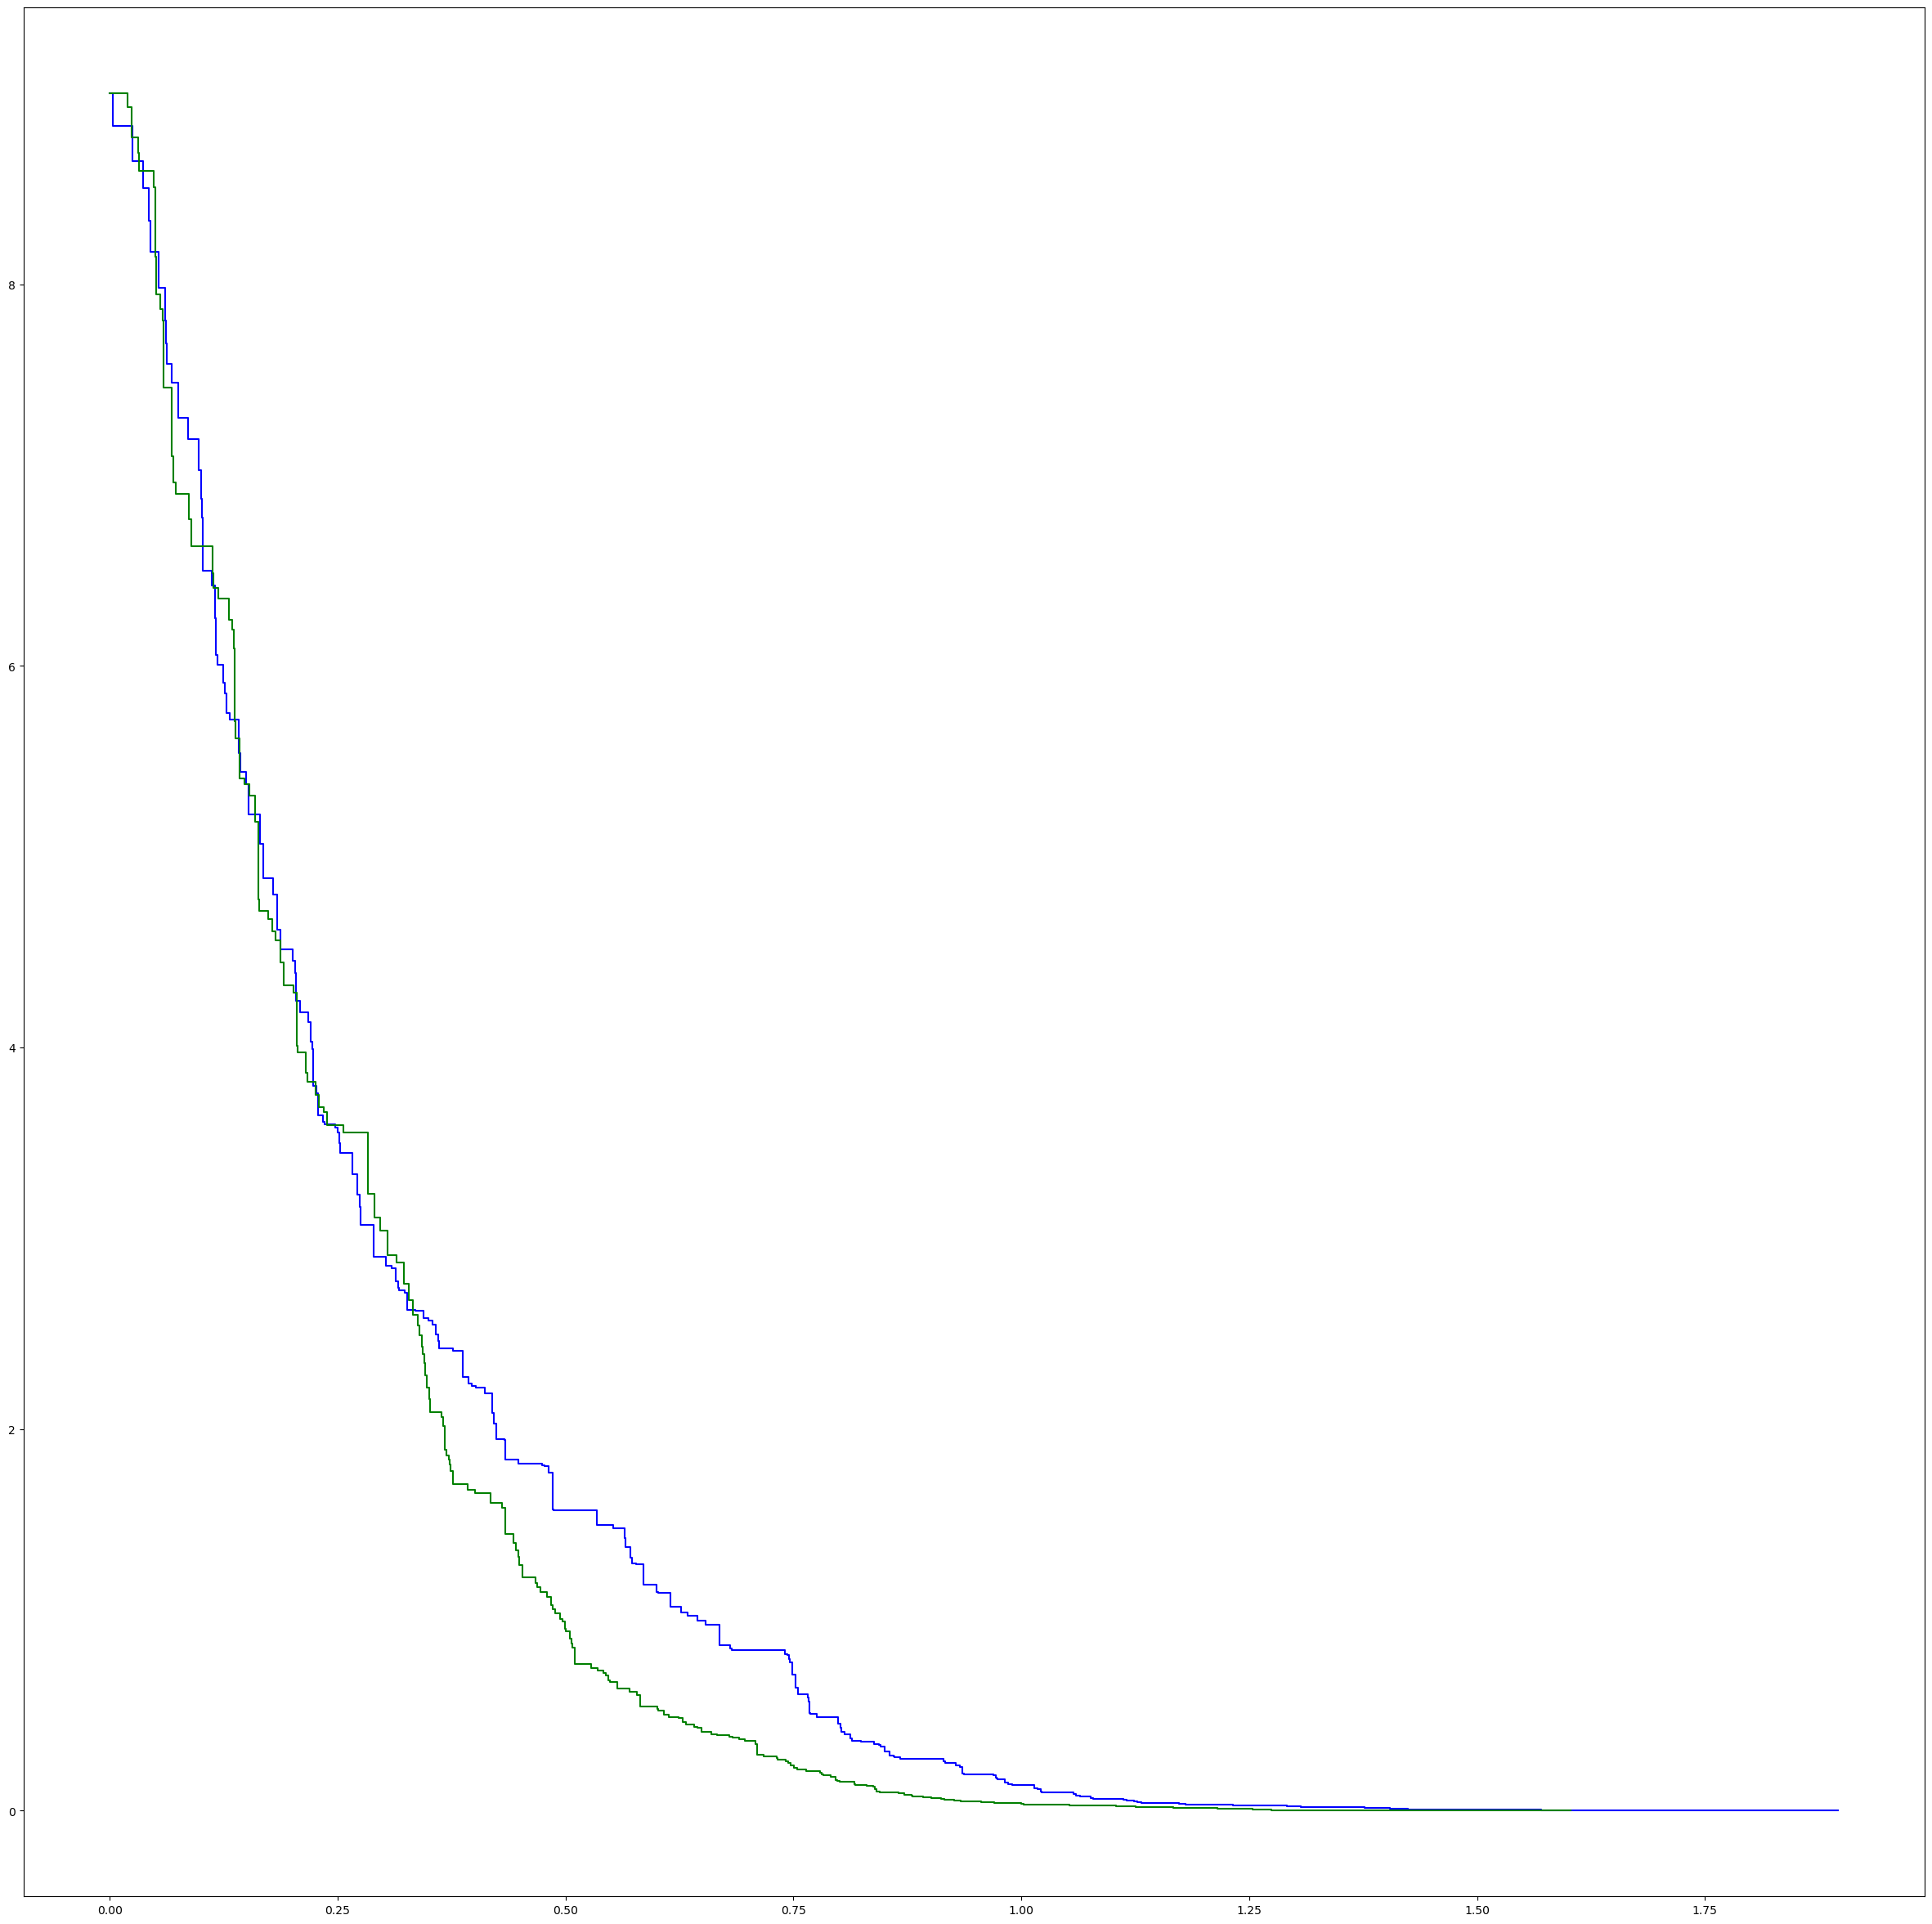

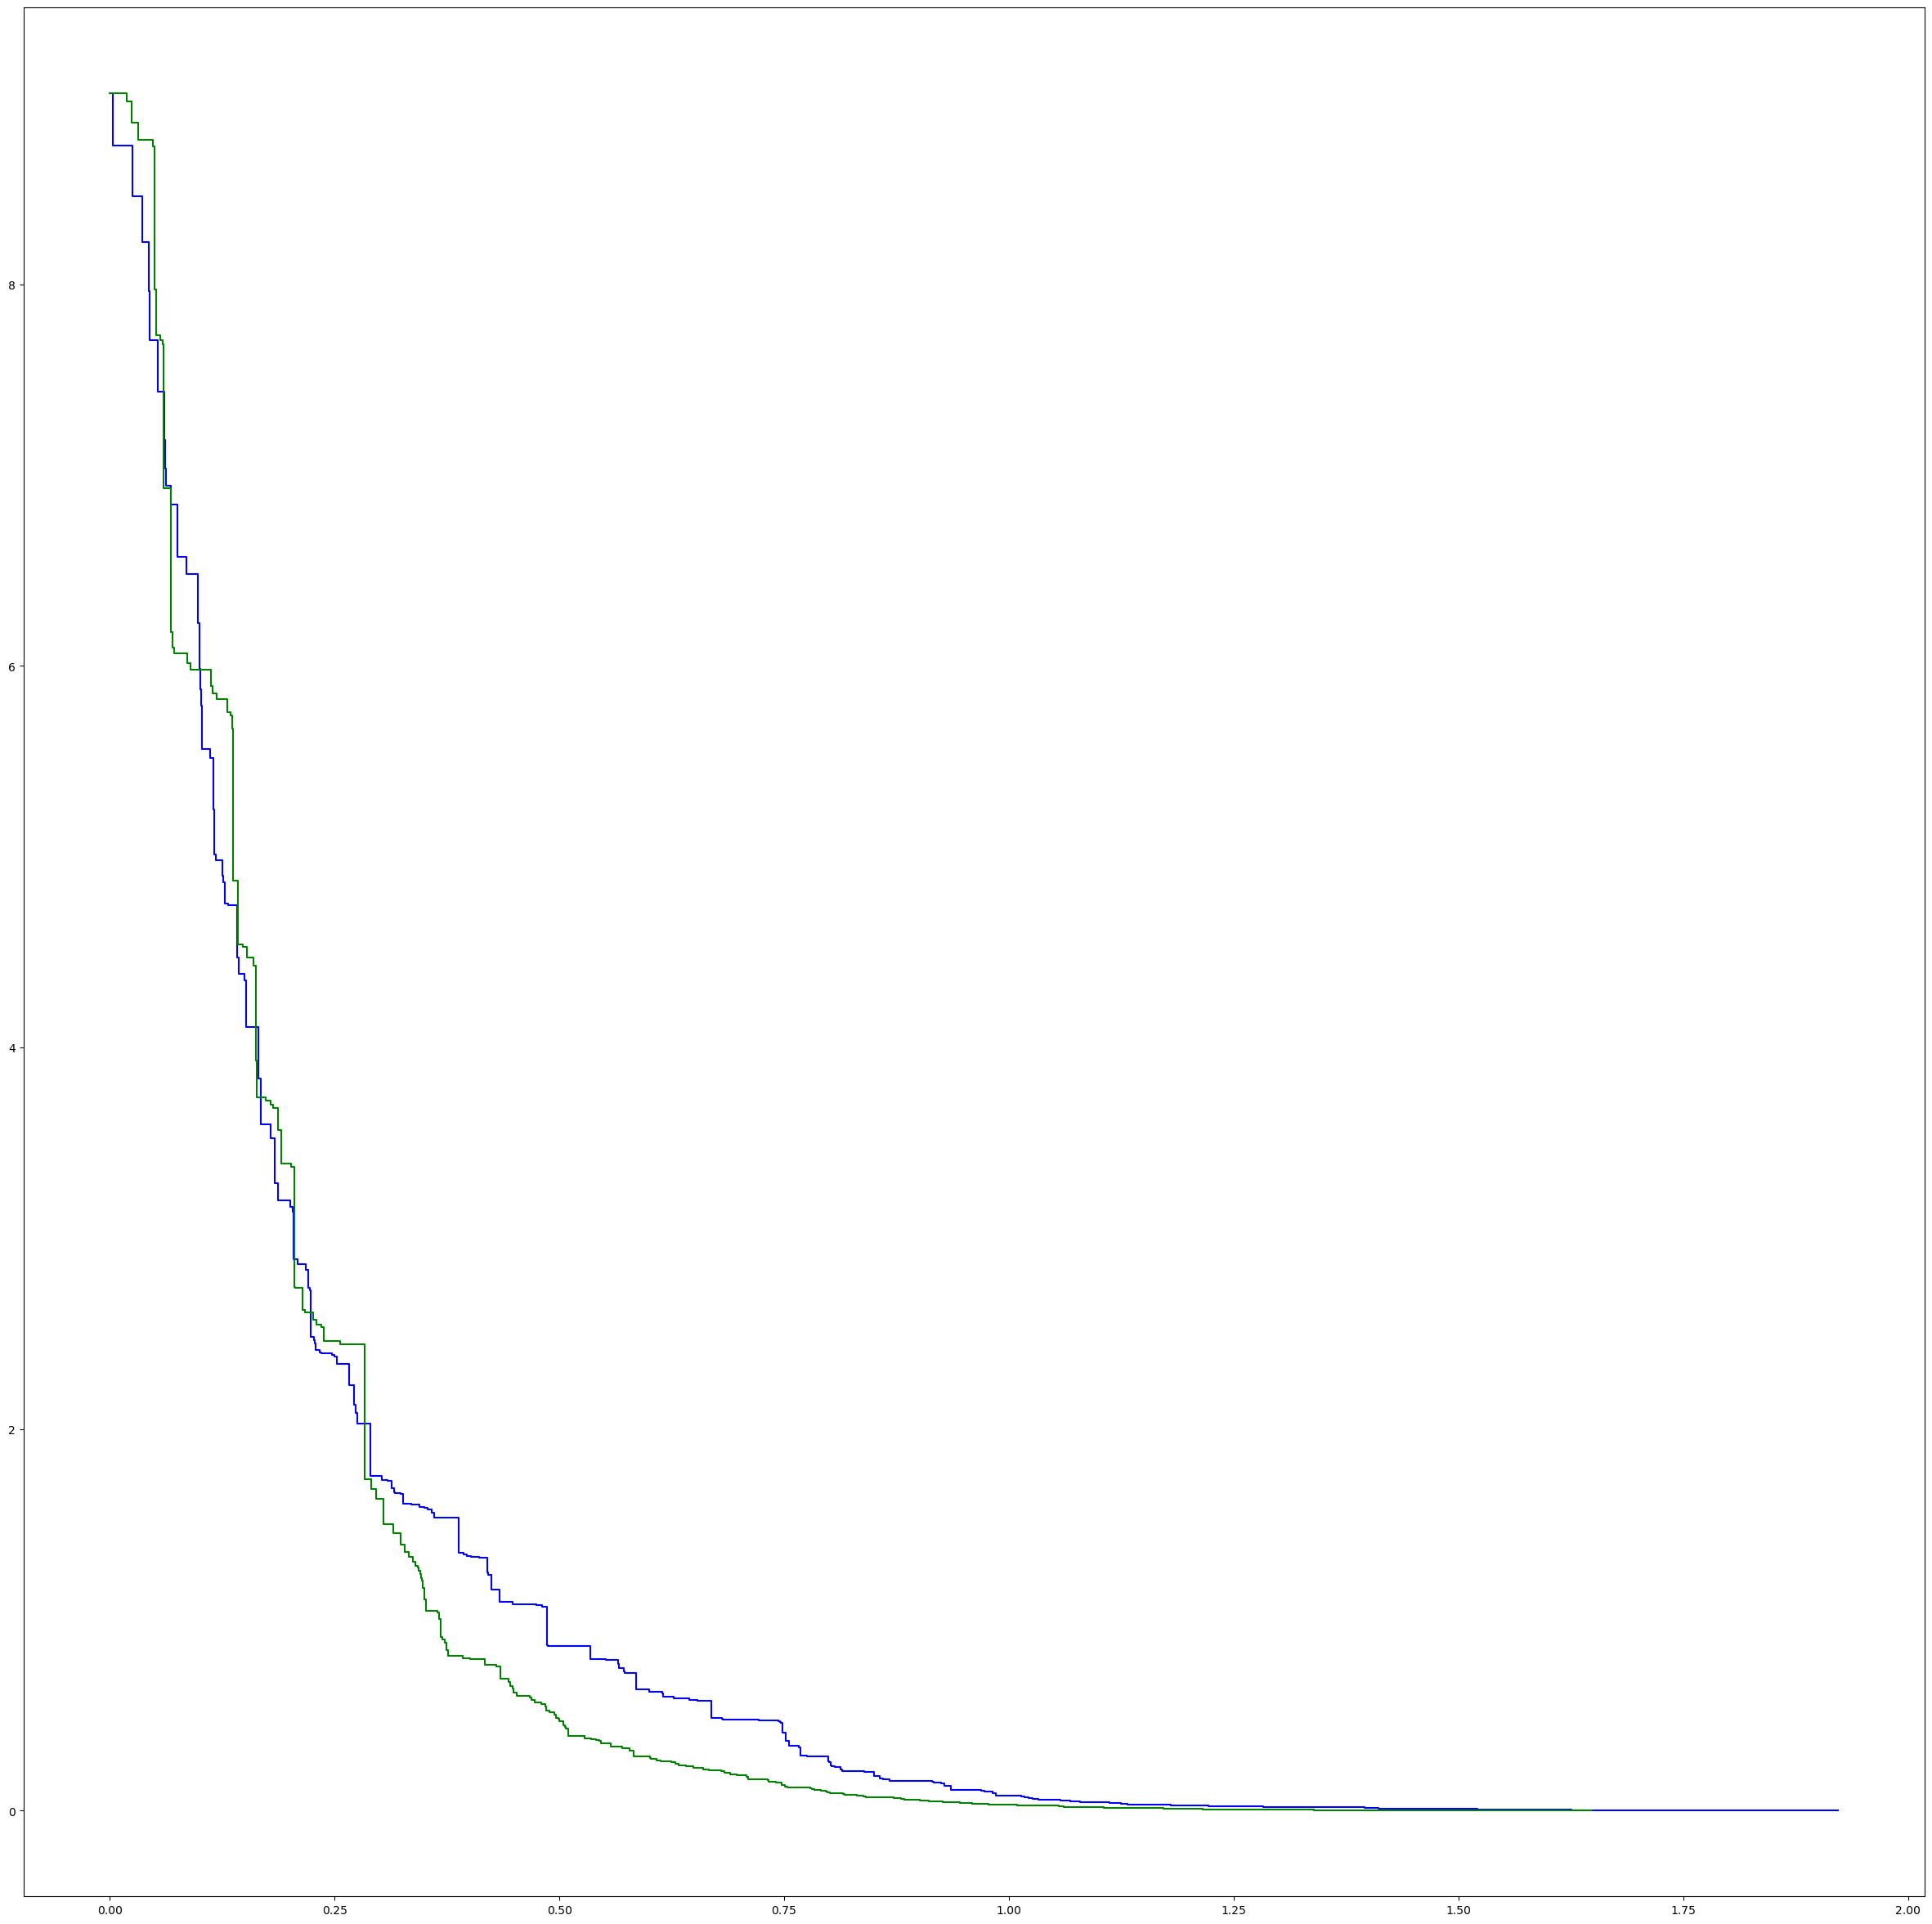

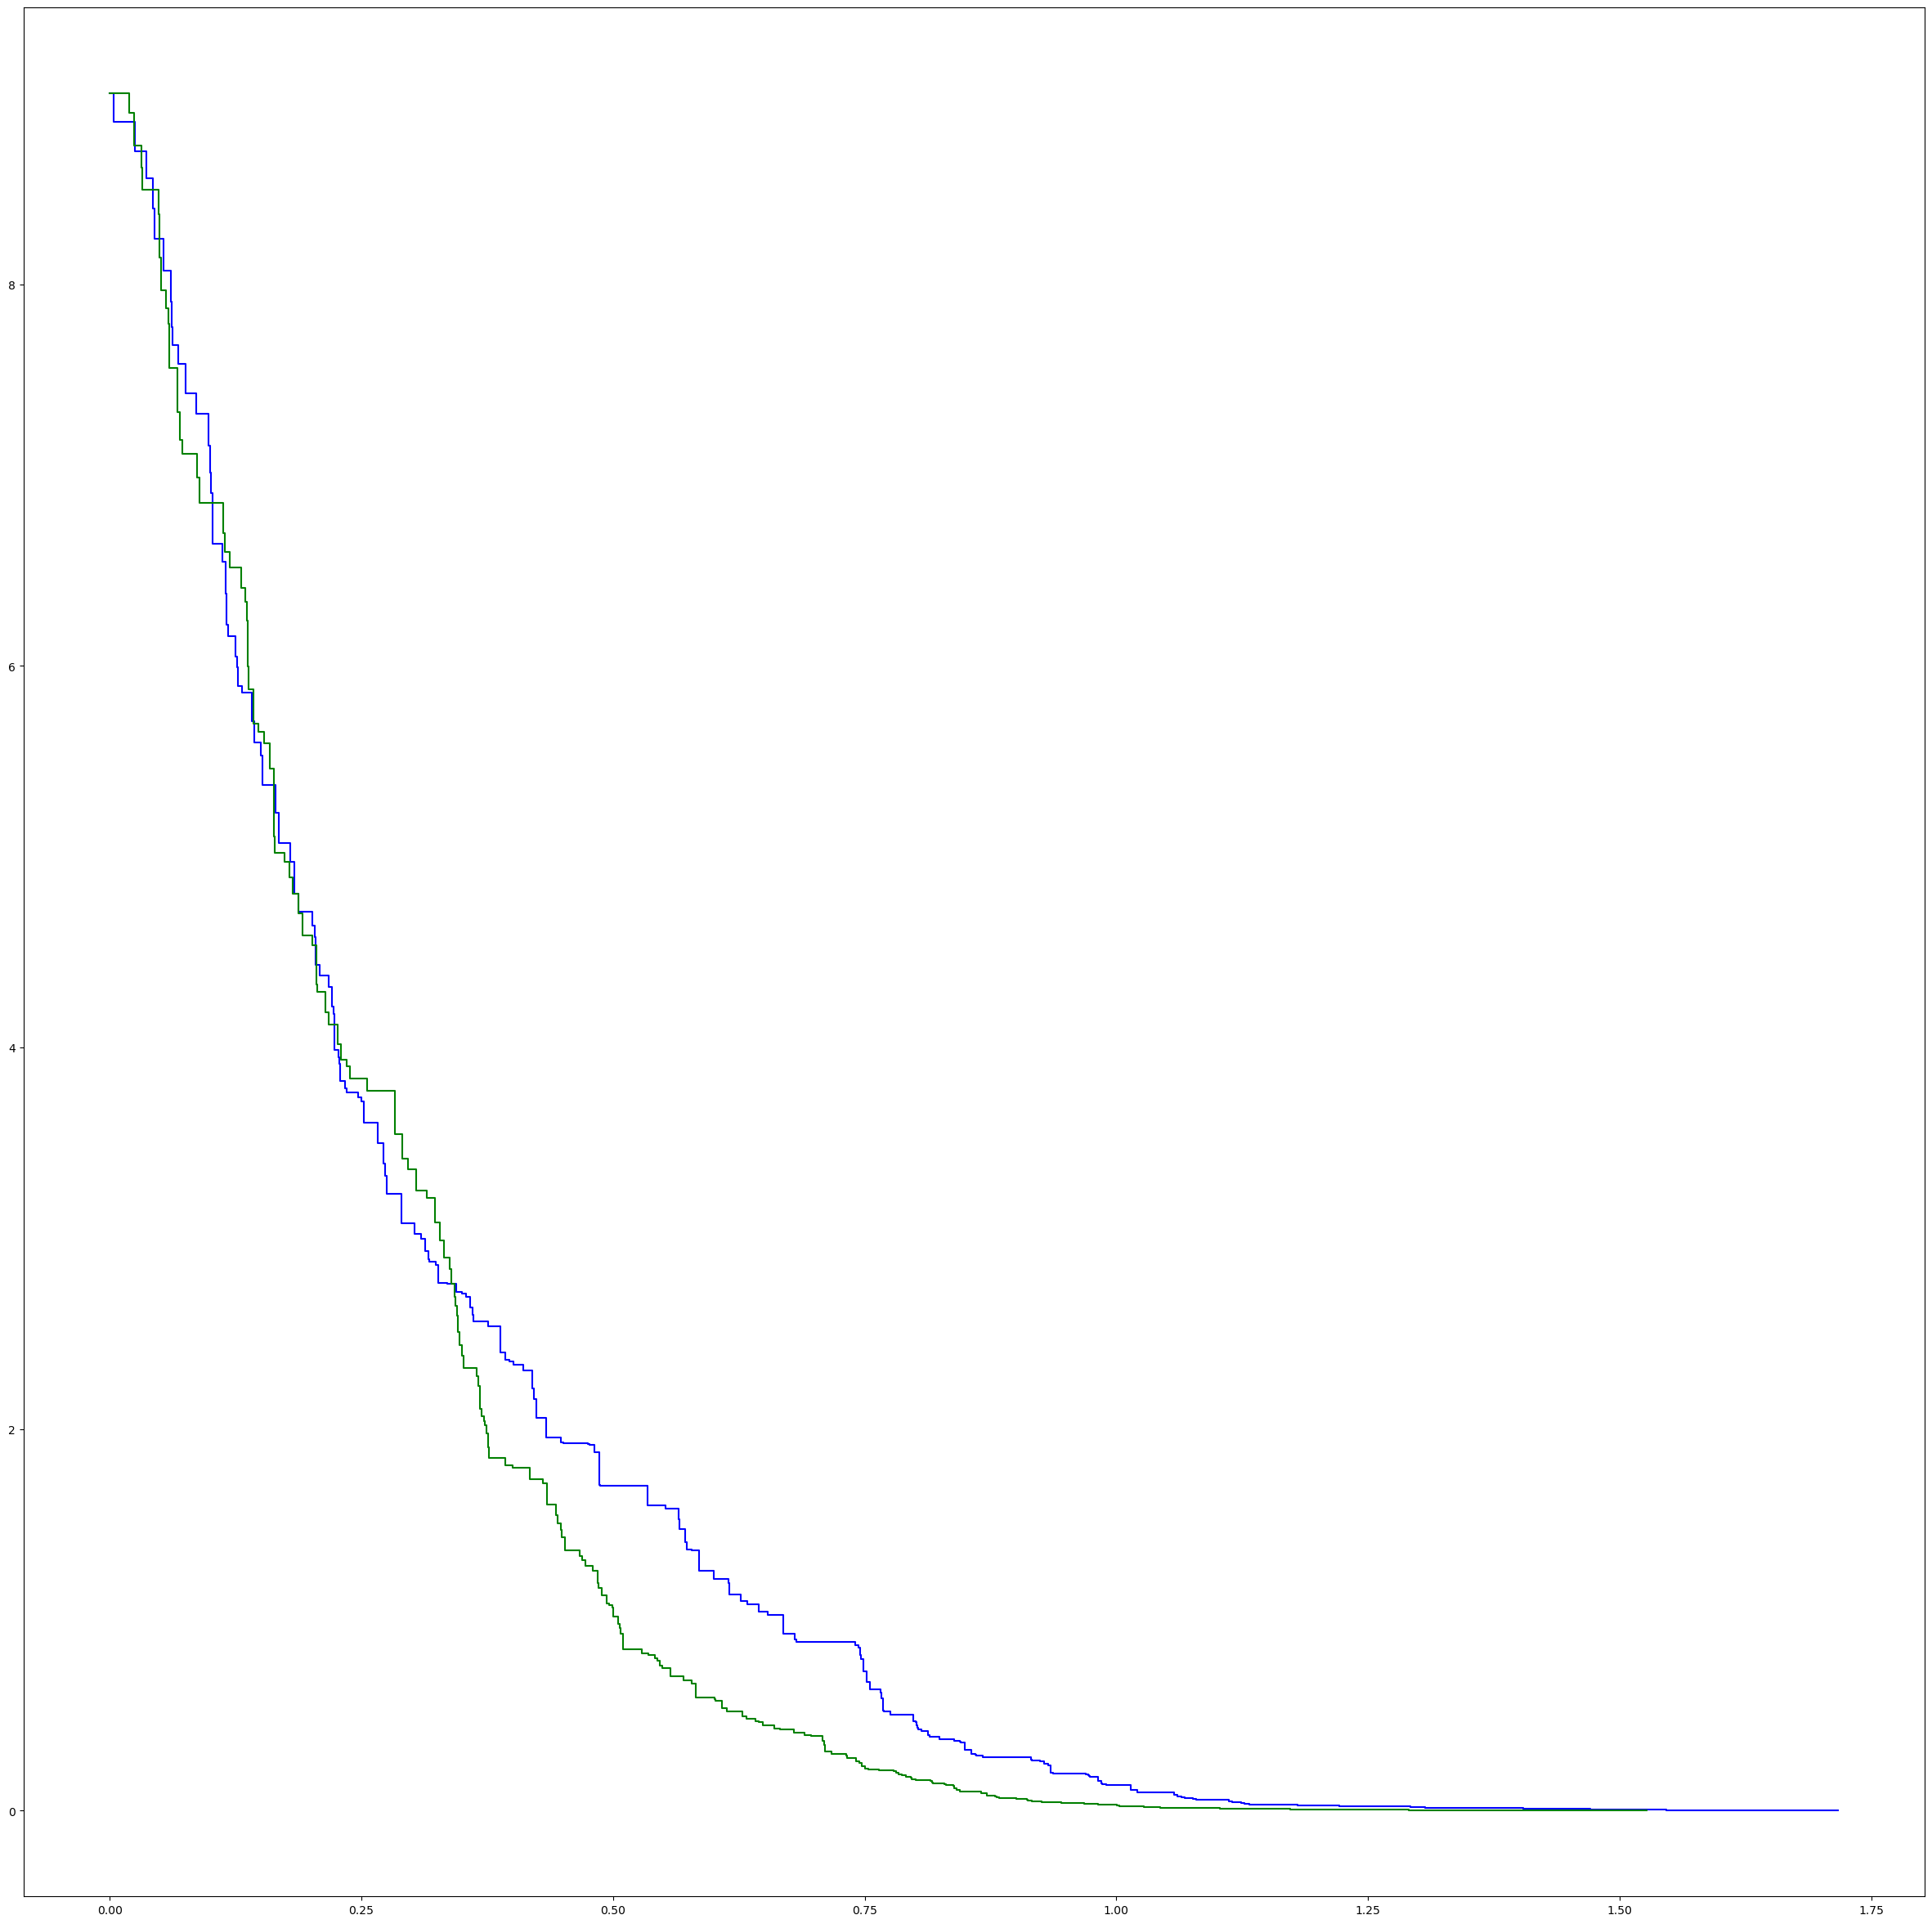

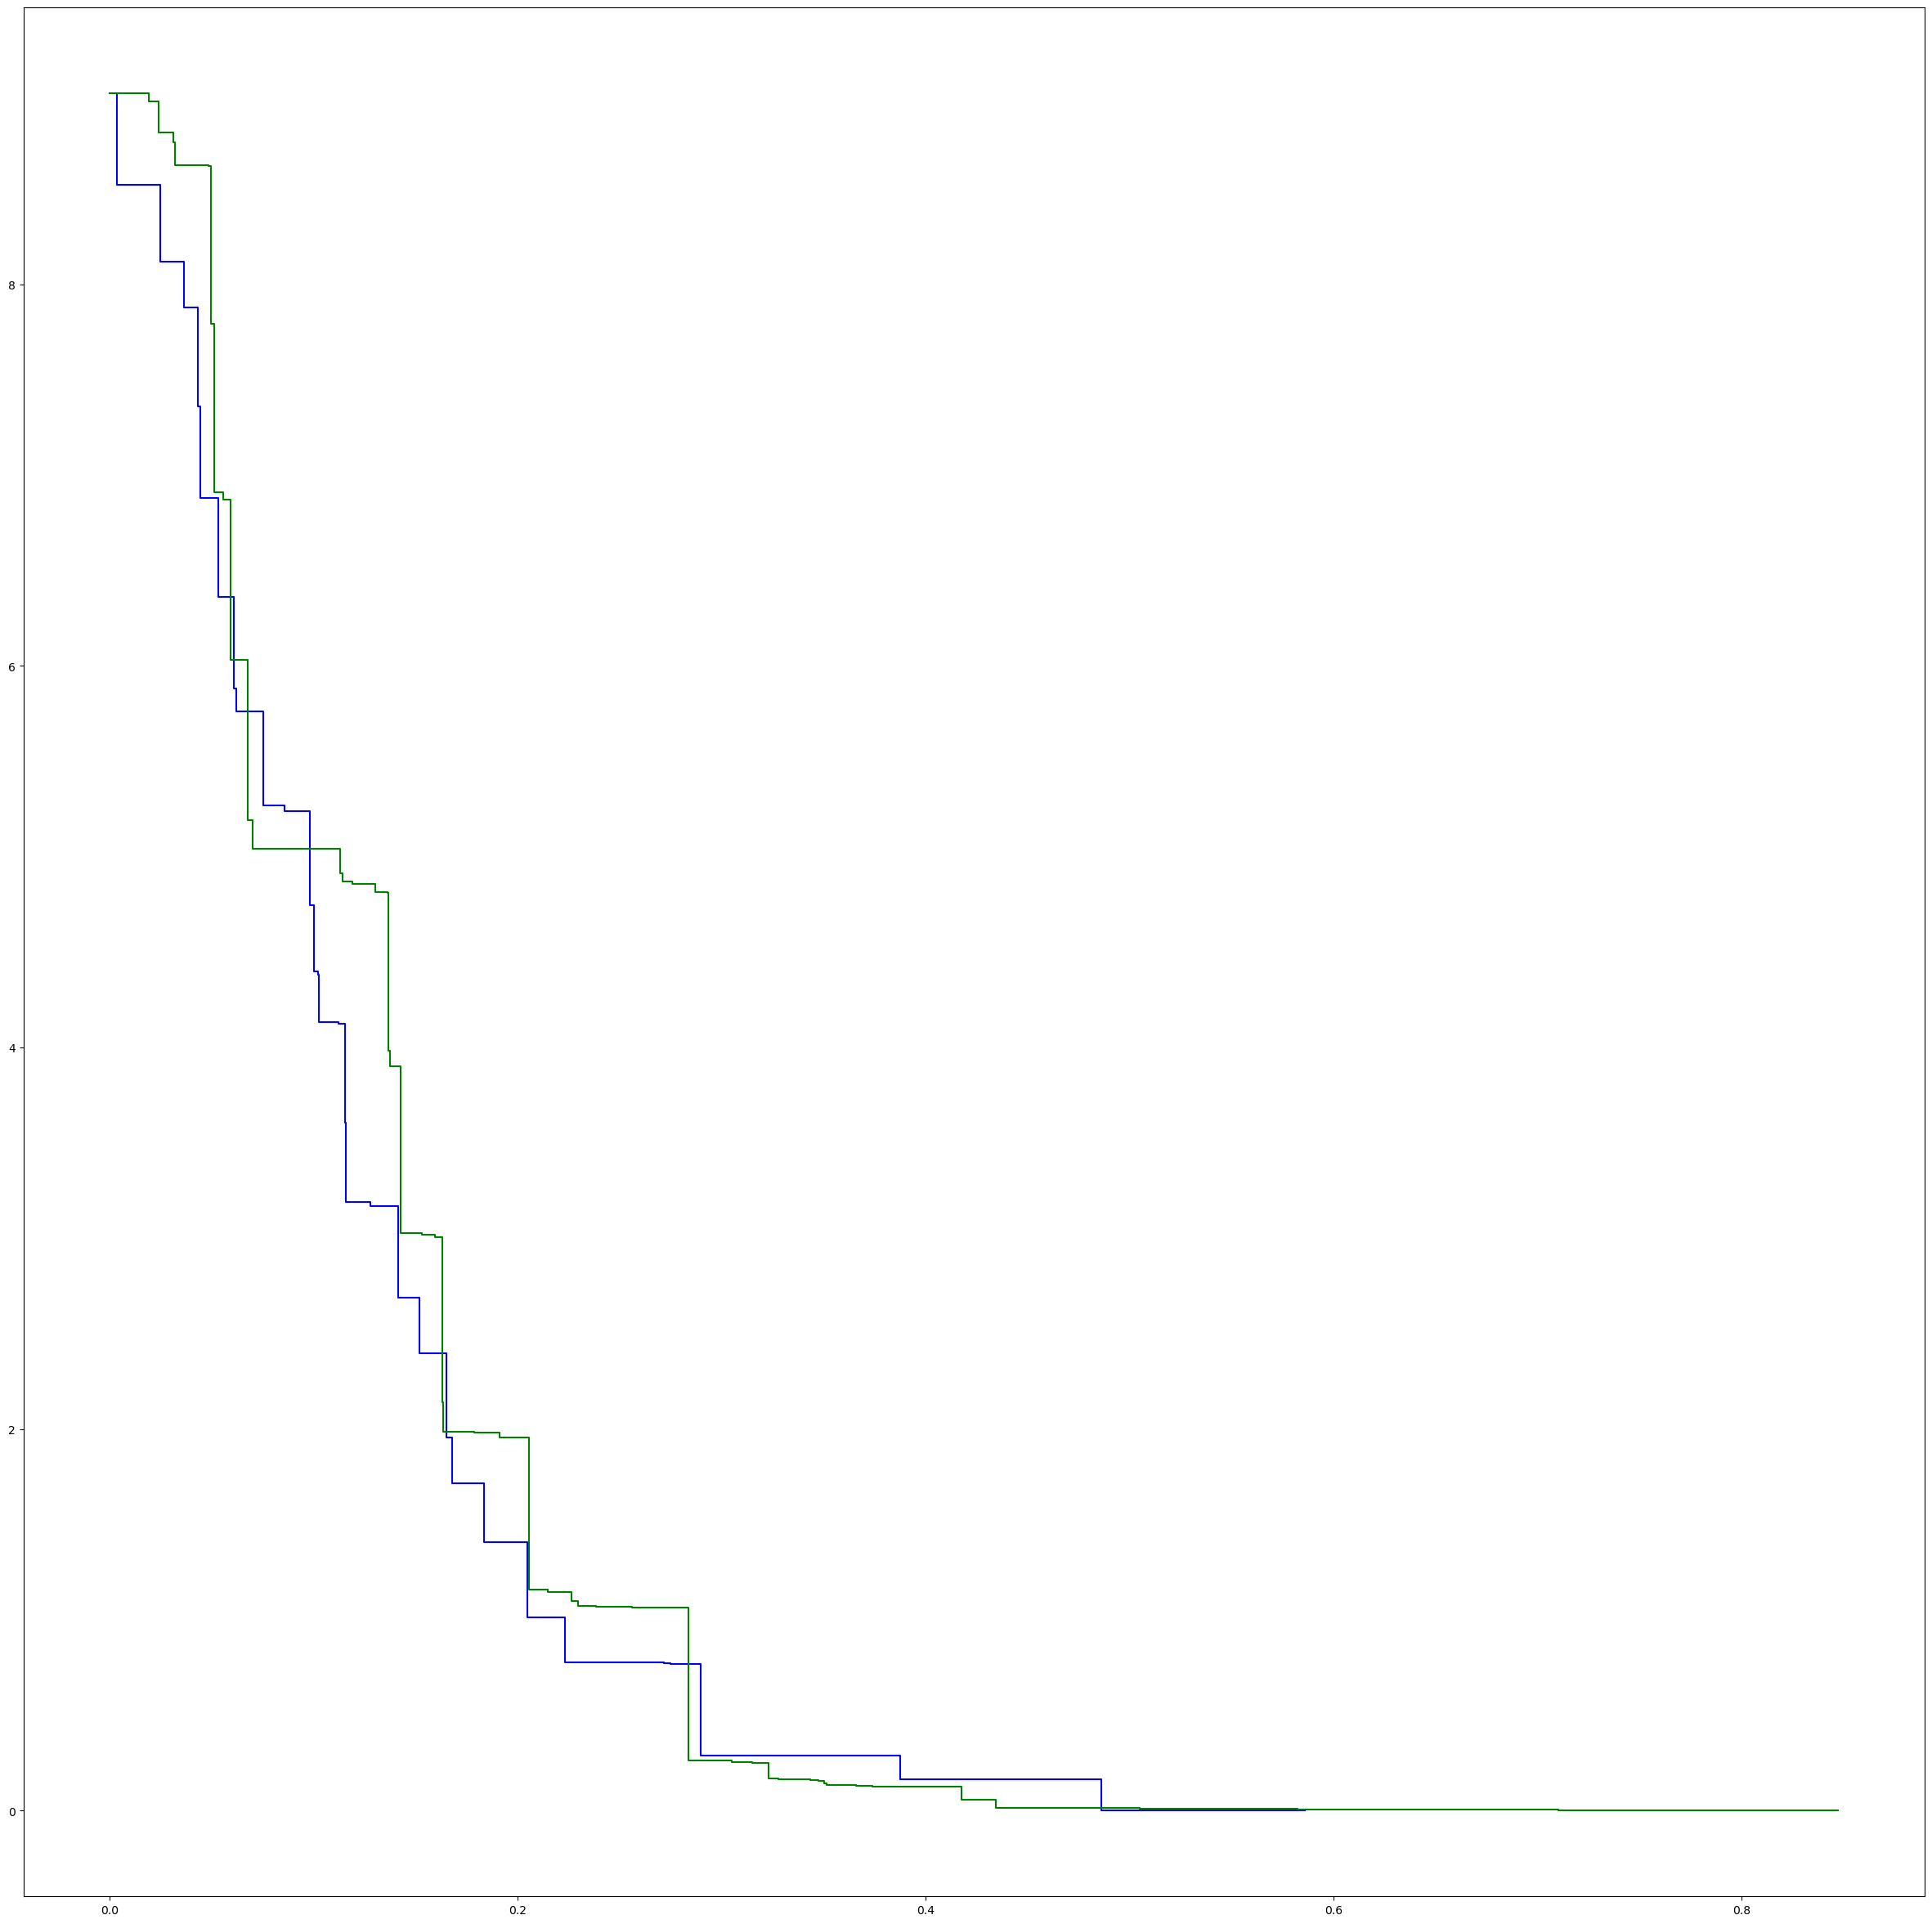

In [37]:
for k in distributions.keys():
    fig = plt.figure(k,figsize=(30,30))
    mh0_11[k].plot(color="blue")
    mh0_01[k].plot(color="green")

In [33]:
(mh0_00_p,mh0_11_p,mh0_01_p,mh0_10_p,mh1_00_p,mh1_11_p,mh1_01_p,mh1_10_p)=calcular_sranks_punto_v_muestra(X_unlabeled[0],ceros_toy,unos_toy,distributions,number_instances,sample_size,clustering_method="complete")

0:00:02.401293
{'N1': [<stablerank.rtorf.Pcnif object at 0x0000023BEA49D650>], 'N2': [<stablerank.rtorf.Pcnif object at 0x0000023BEA442A90>], 'N3': [<stablerank.rtorf.Pcnif object at 0x0000023BEA406190>], 'N4': [<stablerank.rtorf.Pcnif object at 0x0000023BEA360FD0>]}
{'N1': [<stablerank.rtorf.Pcnif object at 0x0000023BEA2E5010>], 'N2': [<stablerank.rtorf.Pcnif object at 0x0000023BEA311B10>], 'N3': [<stablerank.rtorf.Pcnif object at 0x0000023BEA2E6E50>], 'N4': [<stablerank.rtorf.Pcnif object at 0x0000023BEA482610>]}


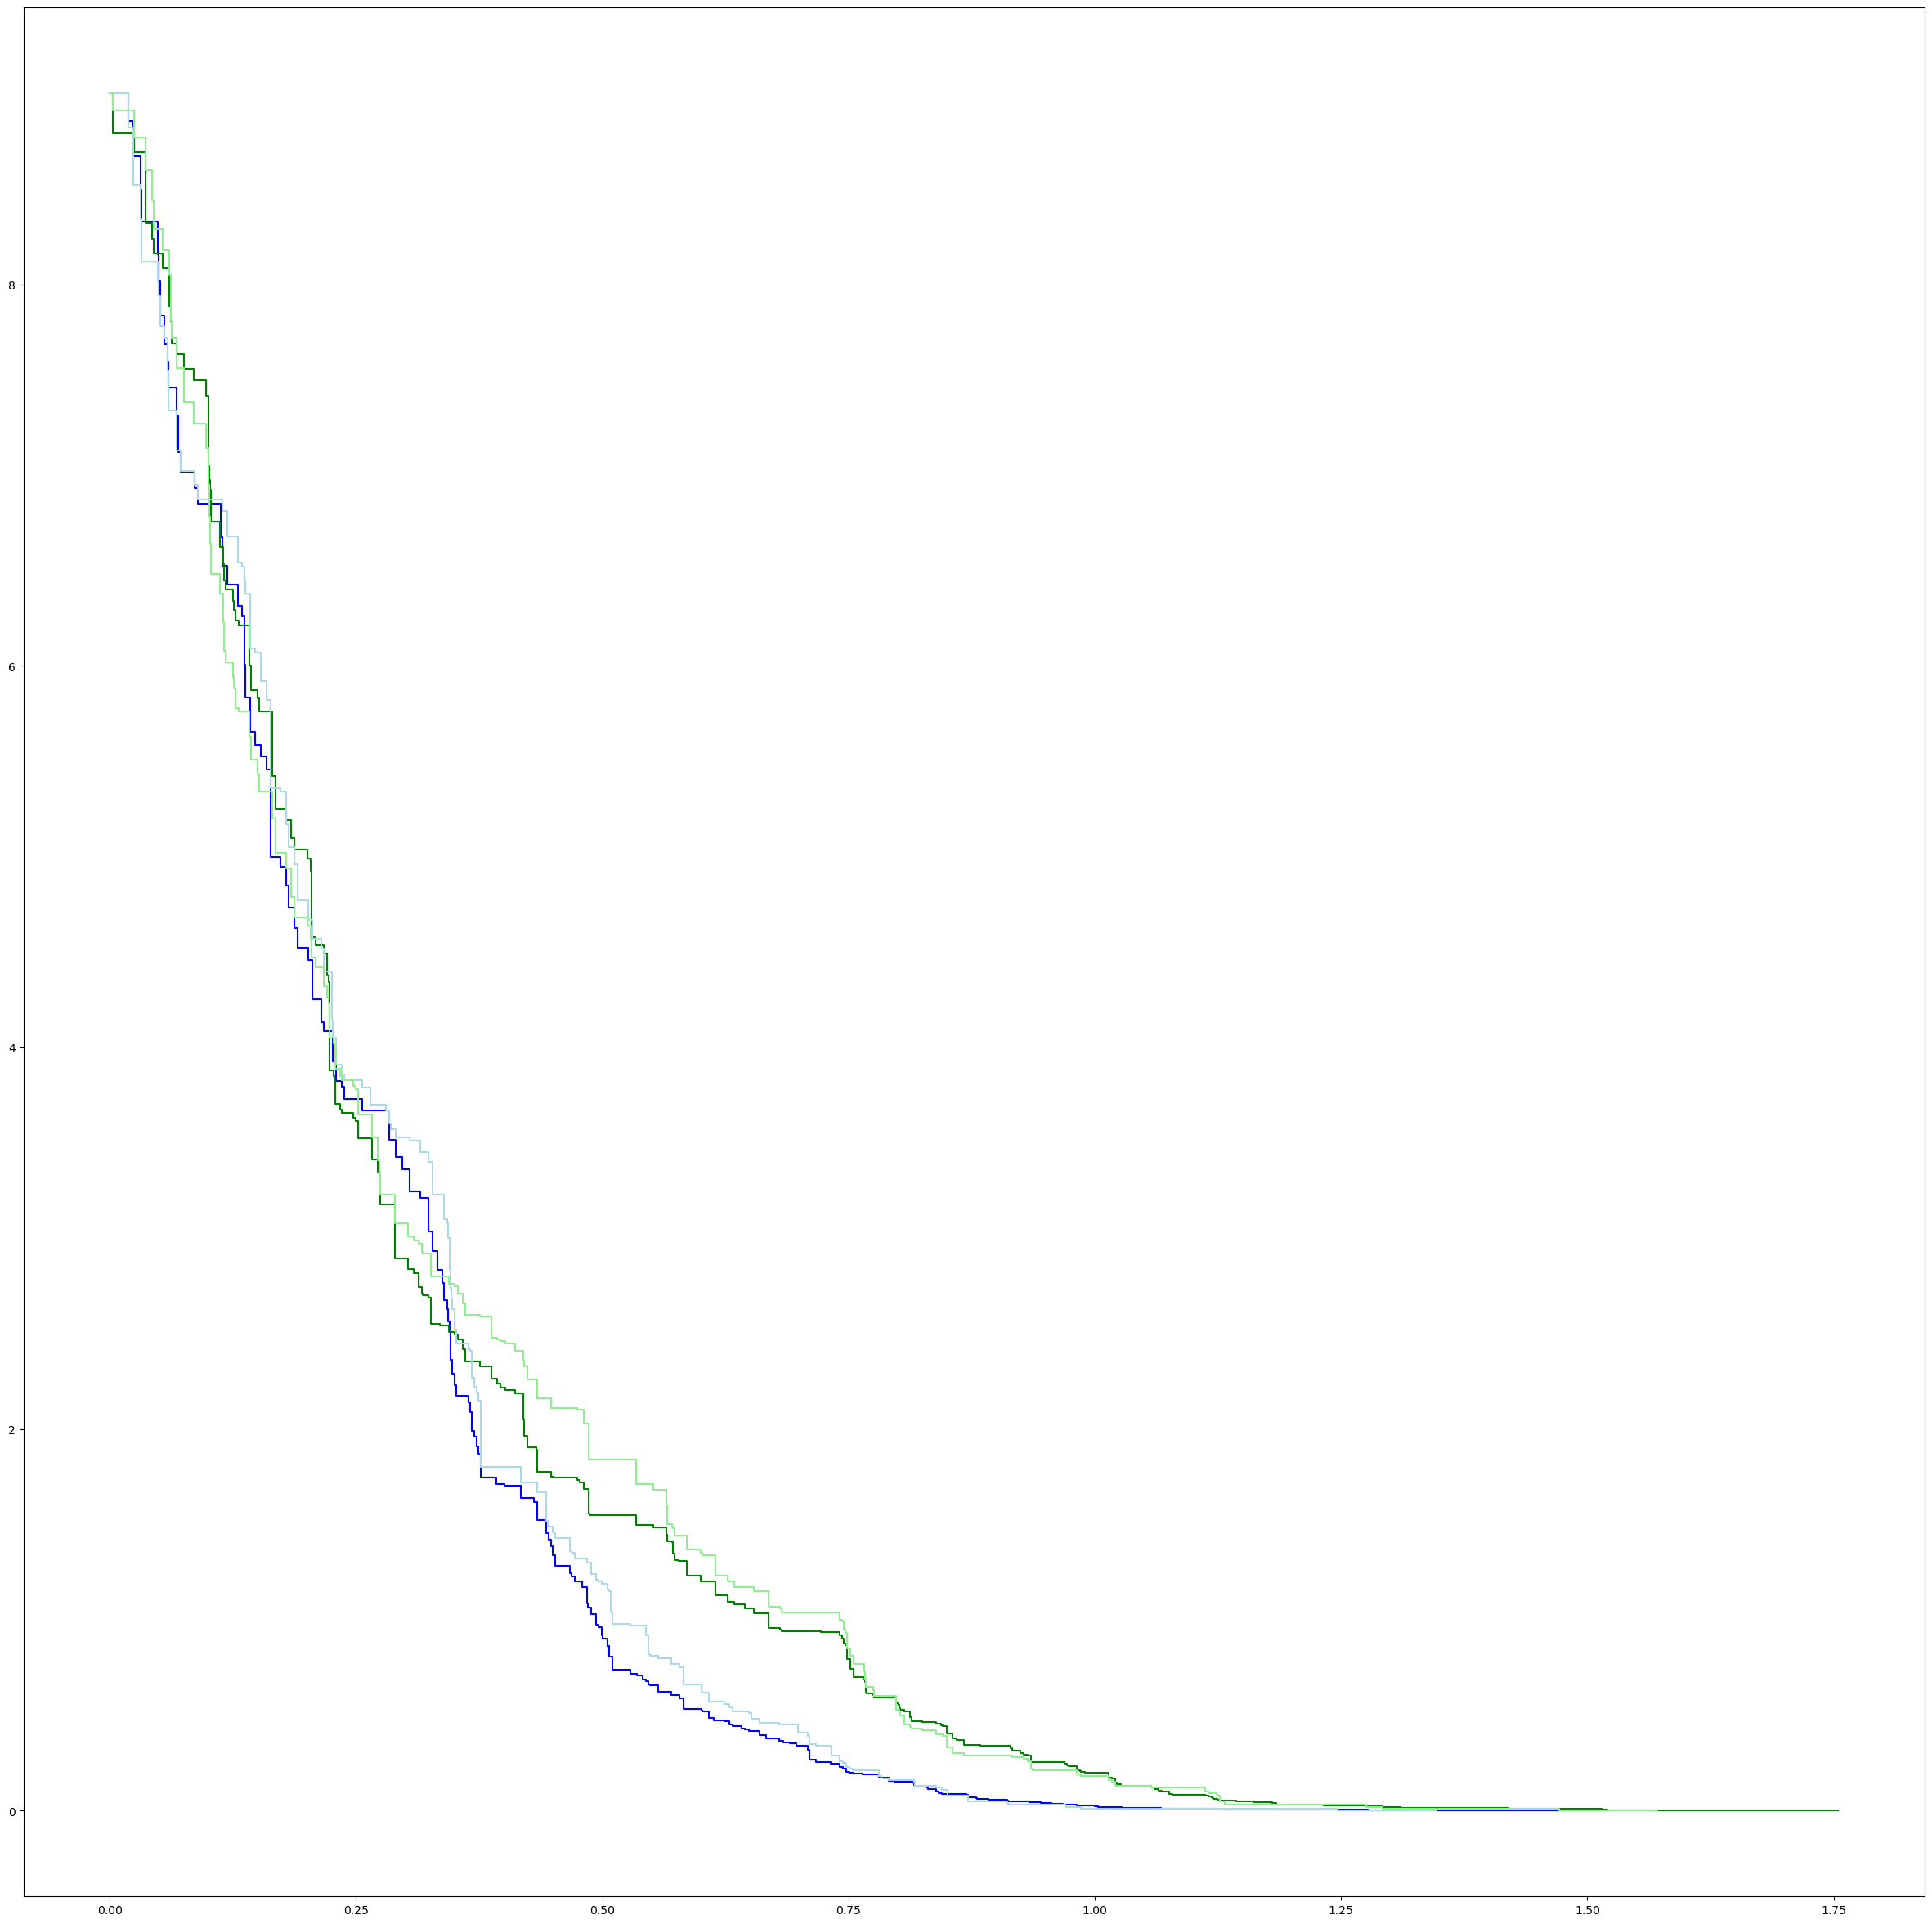

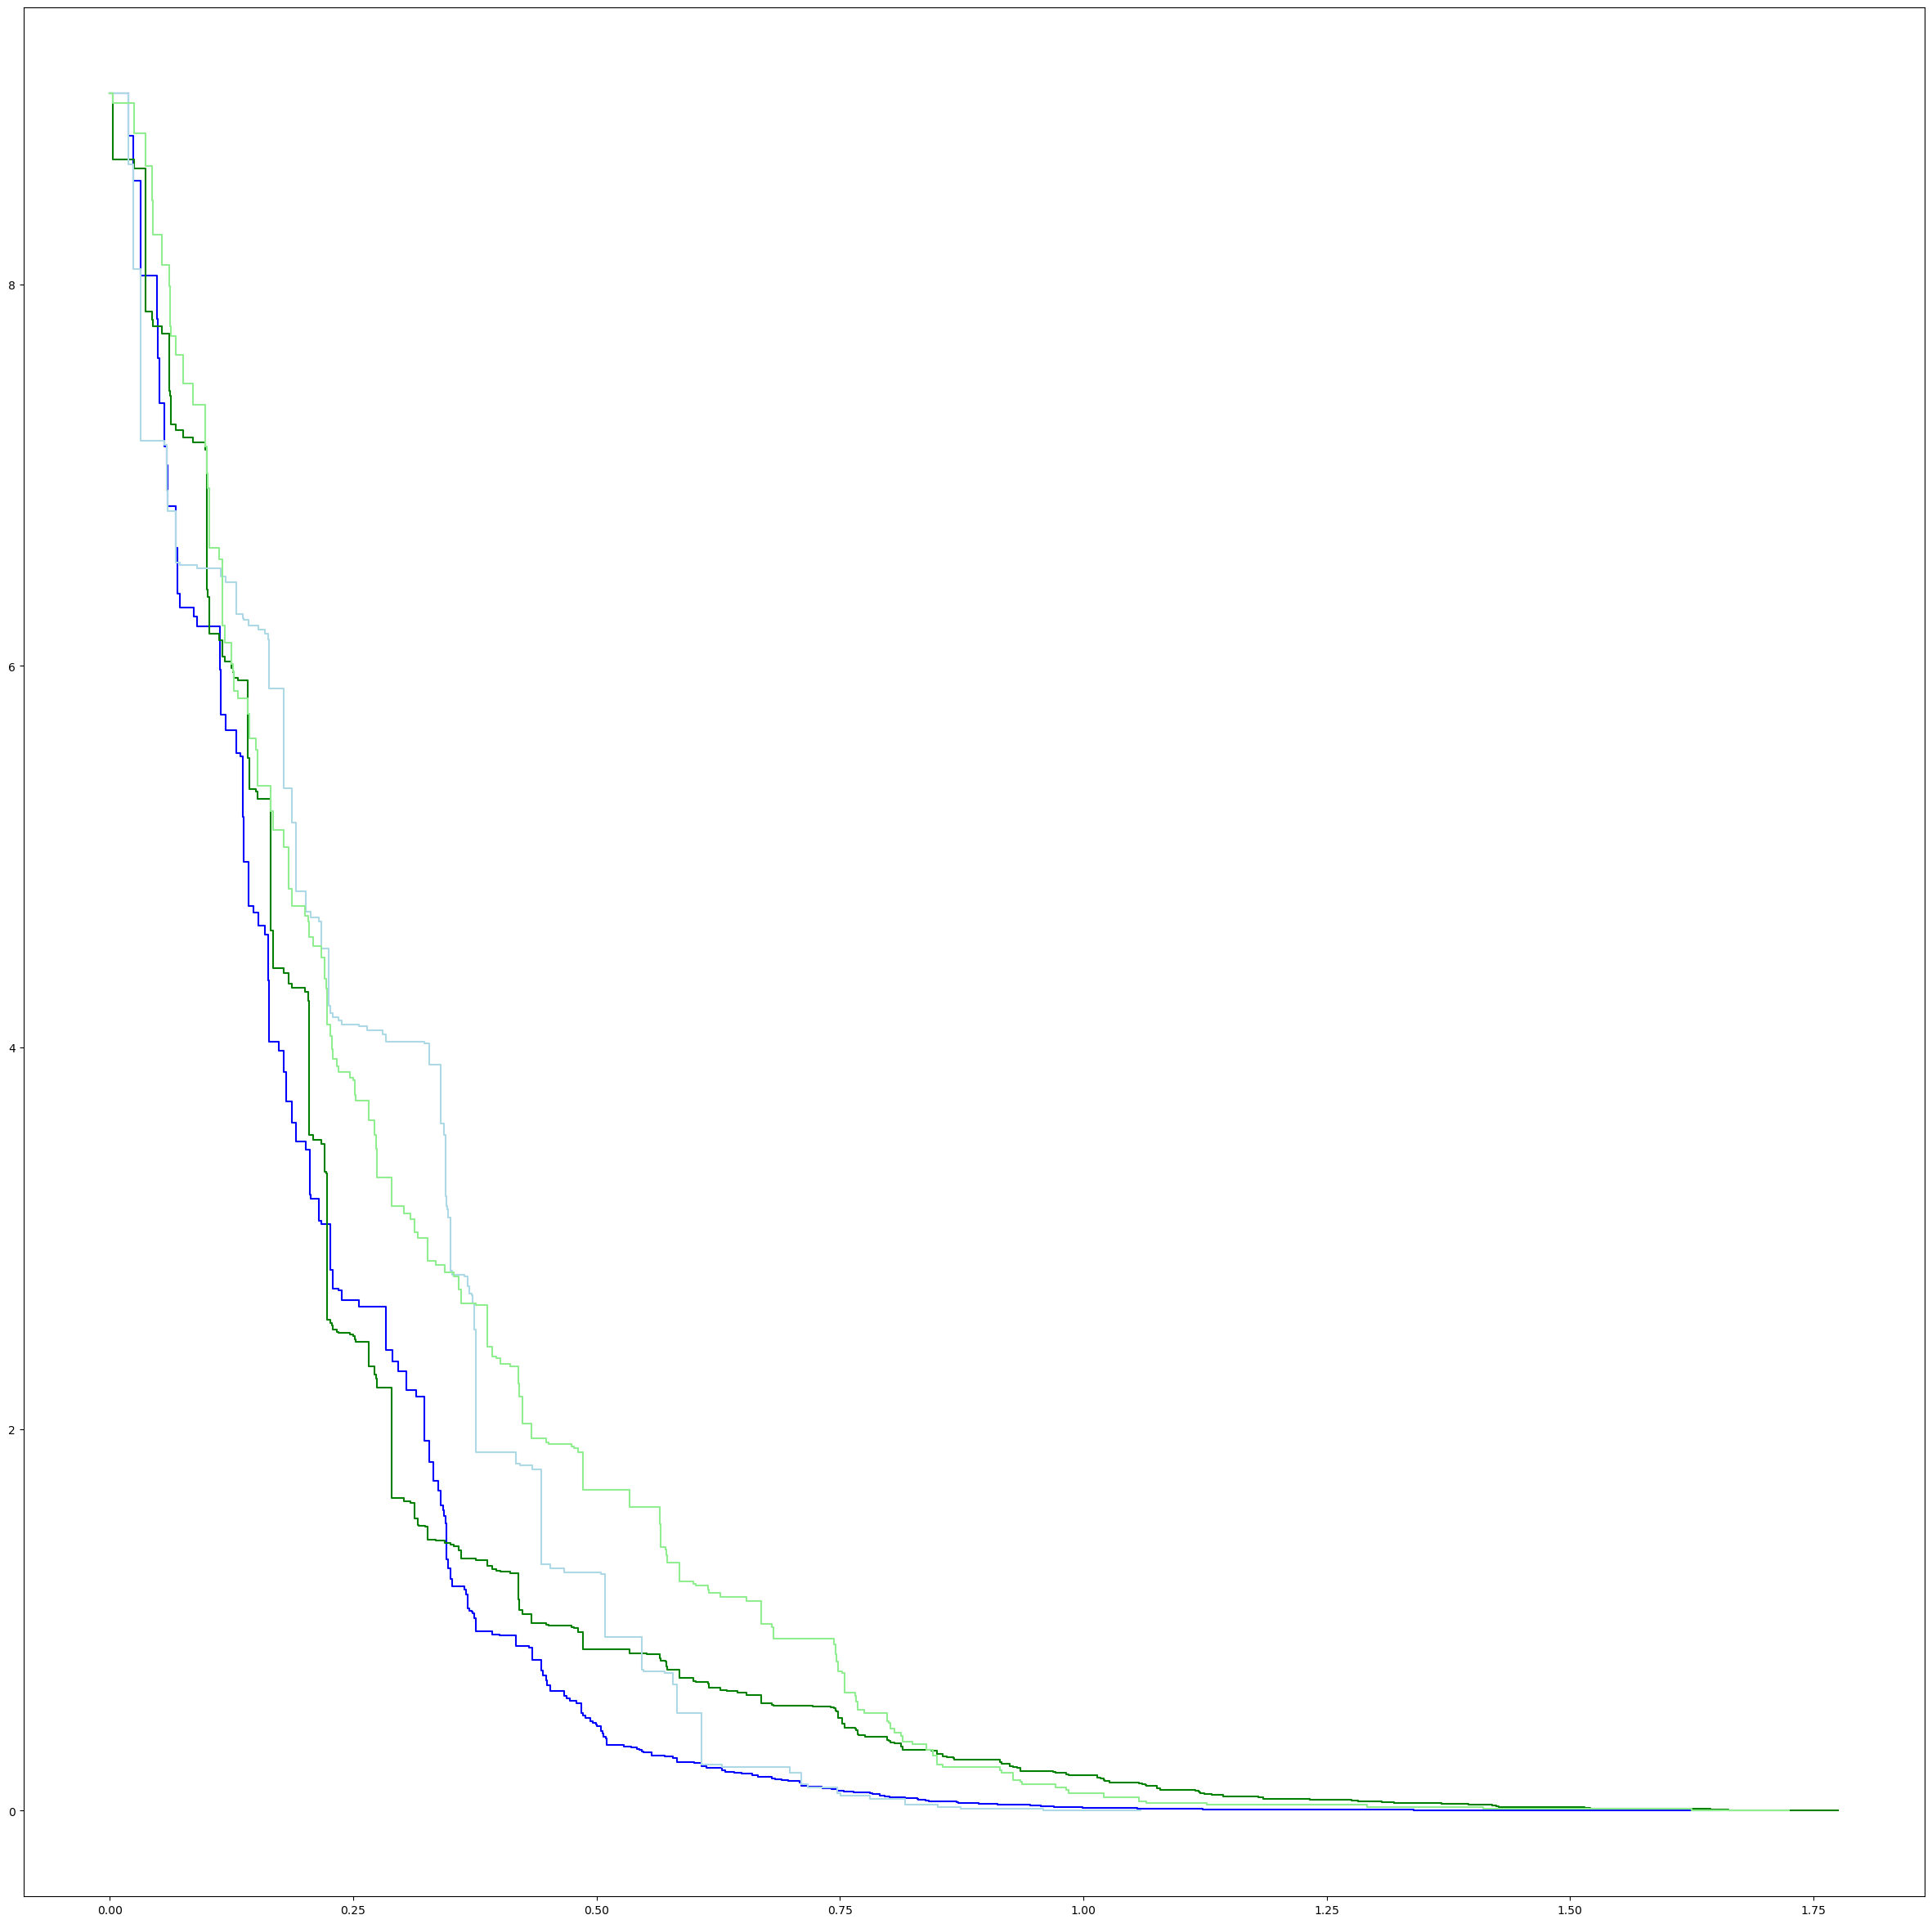

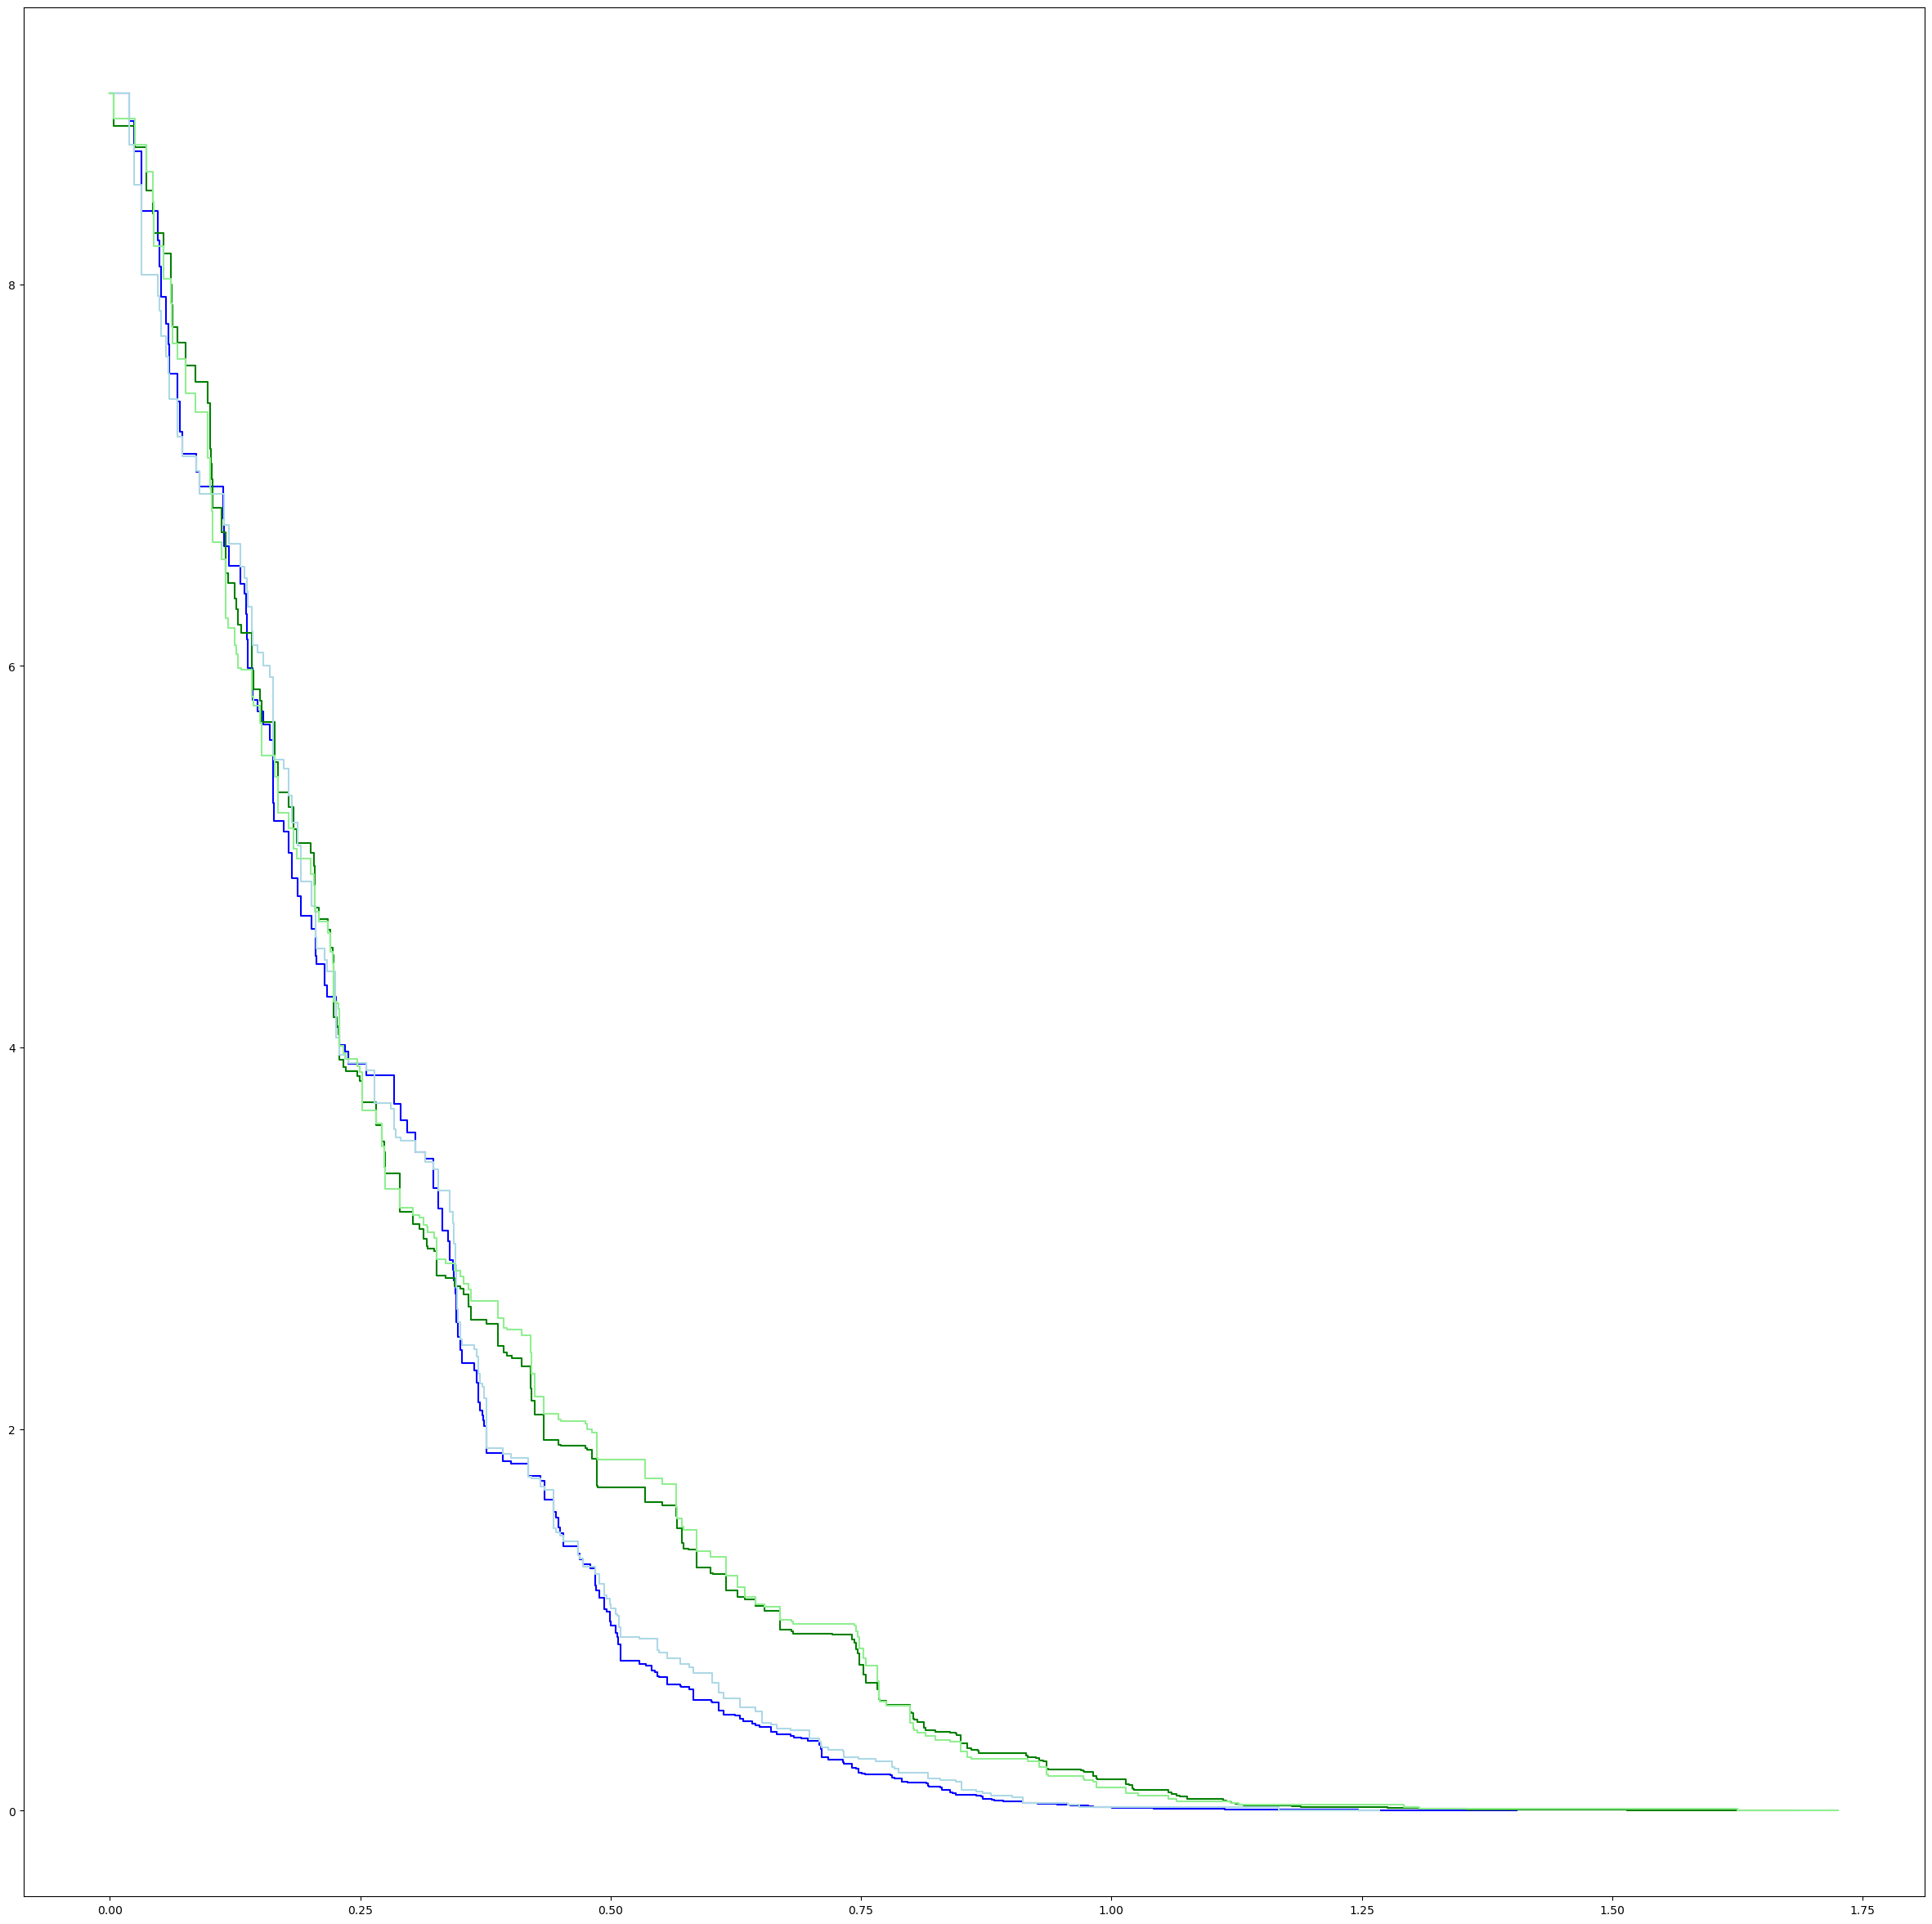

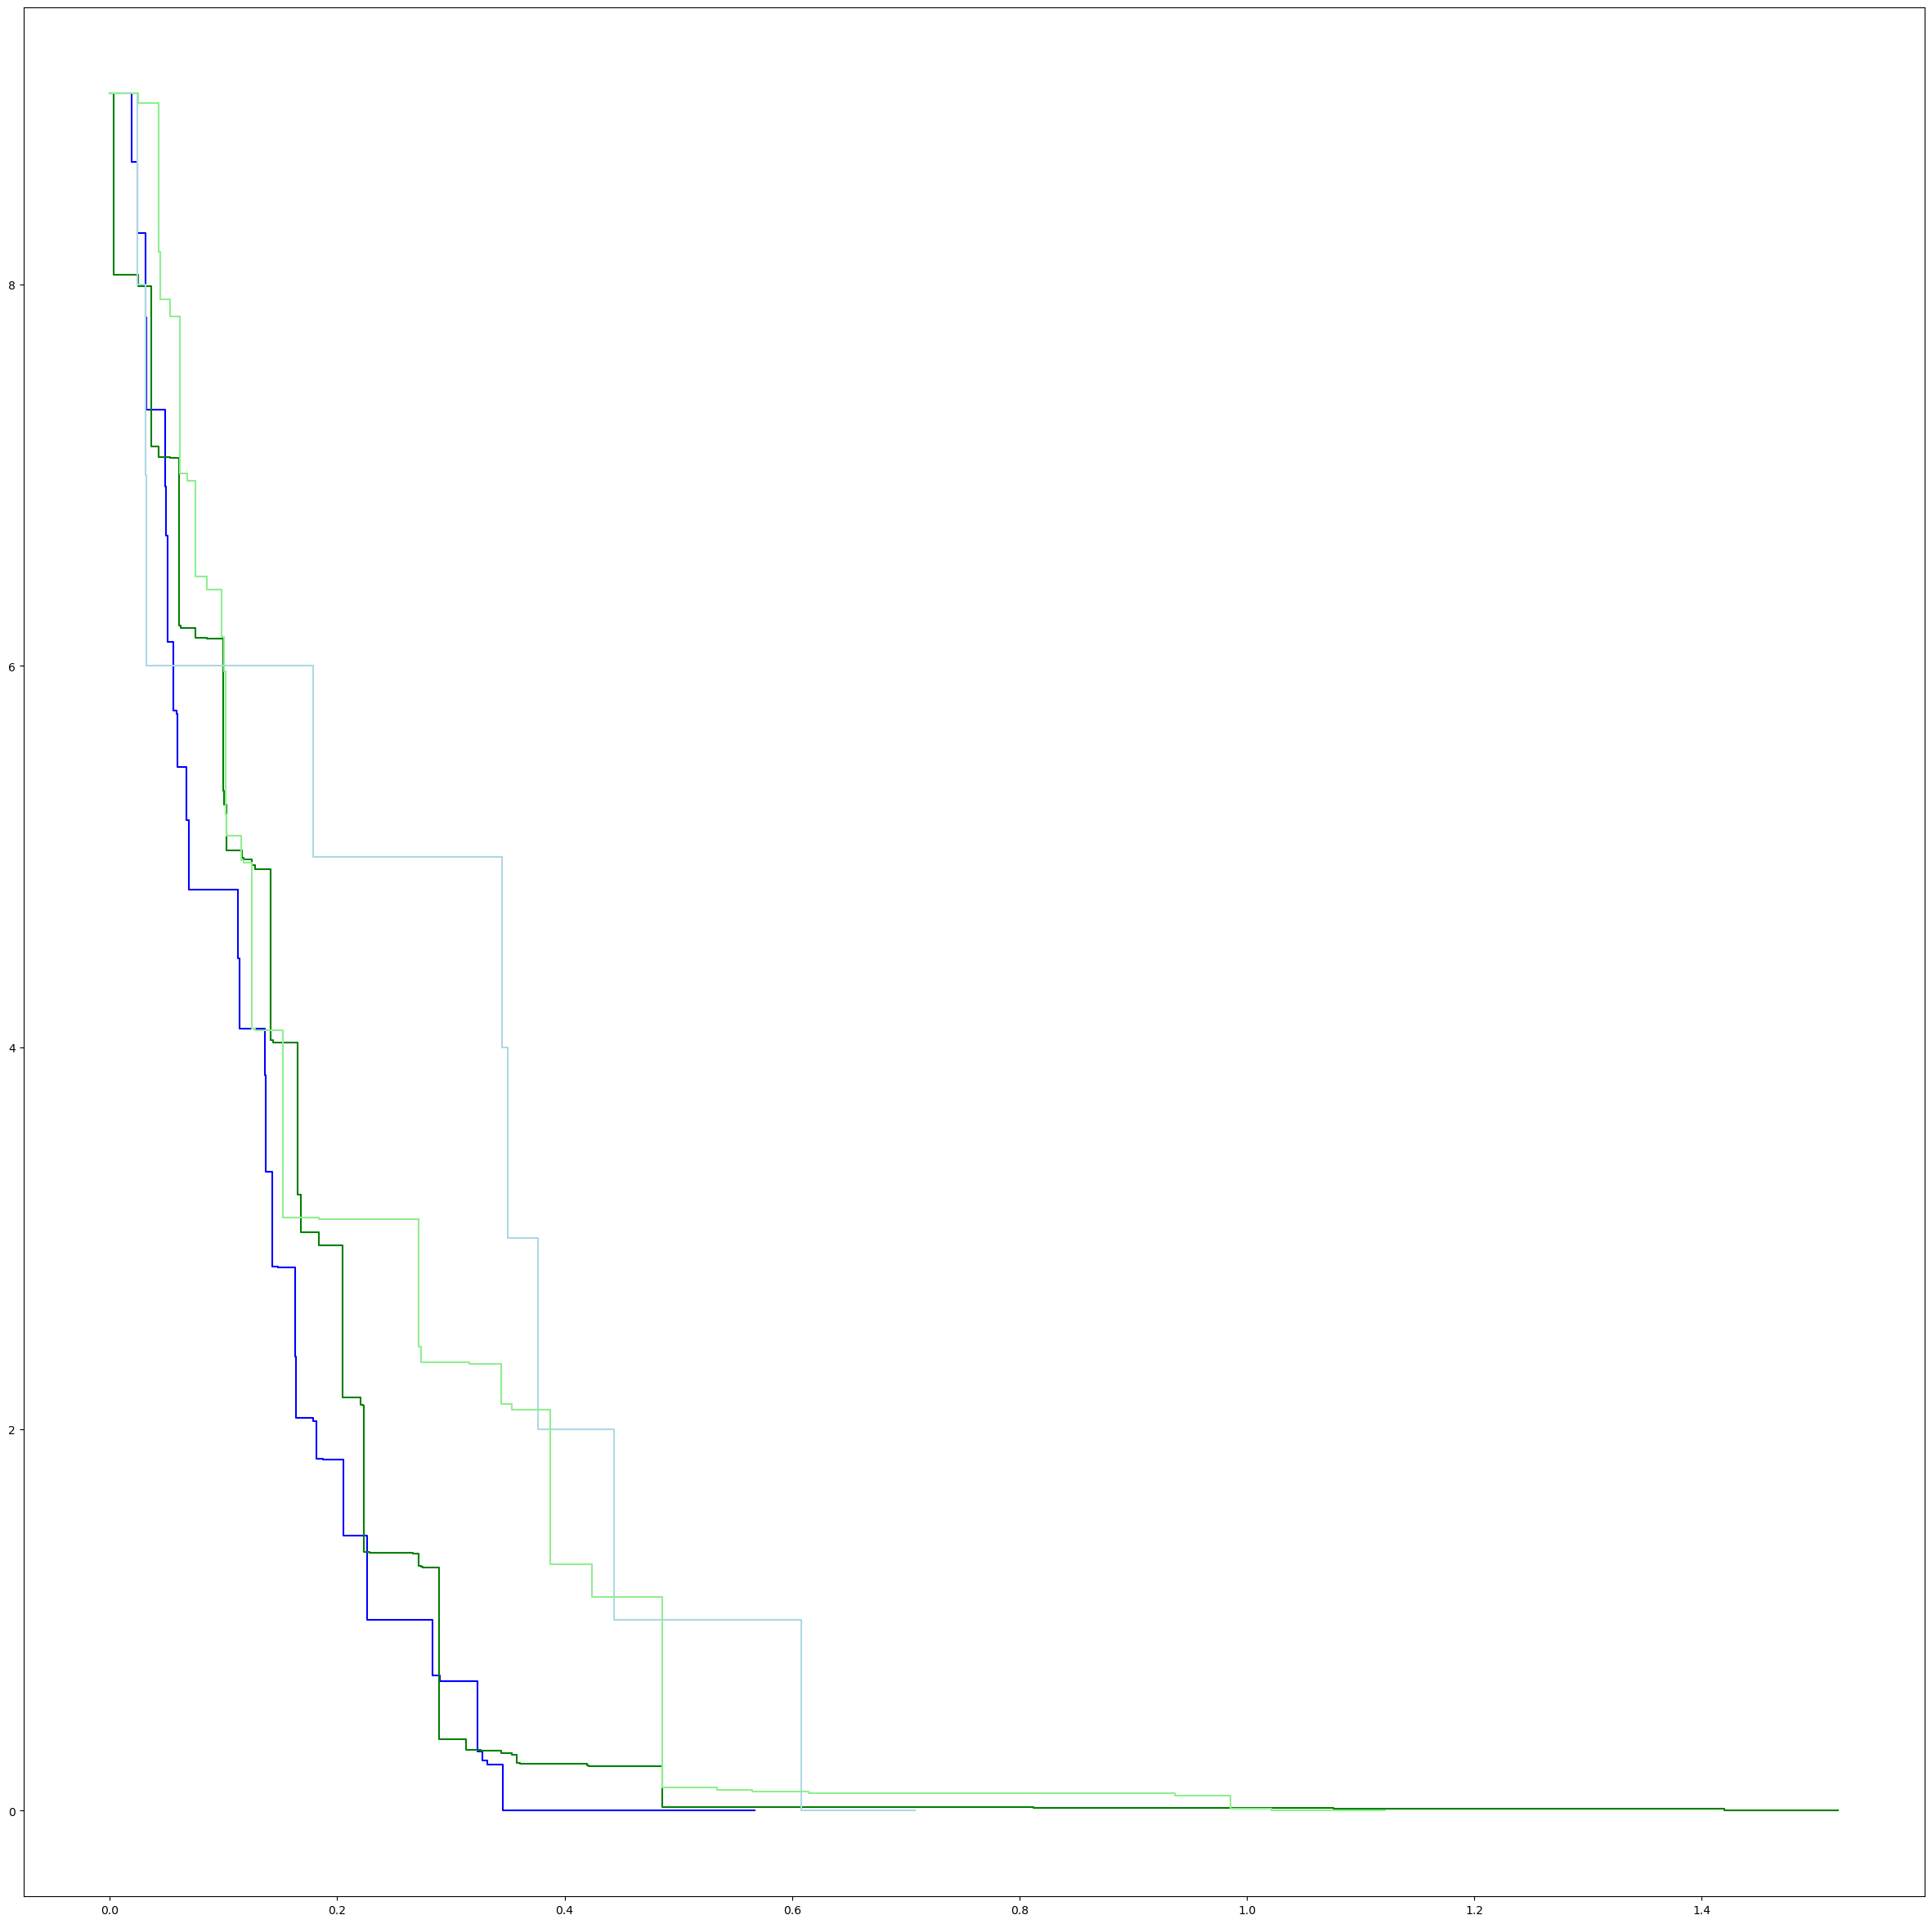

In [38]:
for k in distributions.keys():
    fig = plt.figure(k,figsize=(30,30))
    mh0_00[k].plot(color="blue")
    mh0_10[k].plot(color="green")
    mh0_00_p[k].plot(color="#ADD8E6")
    mh0_10_p[k].plot(color="#90EE90")

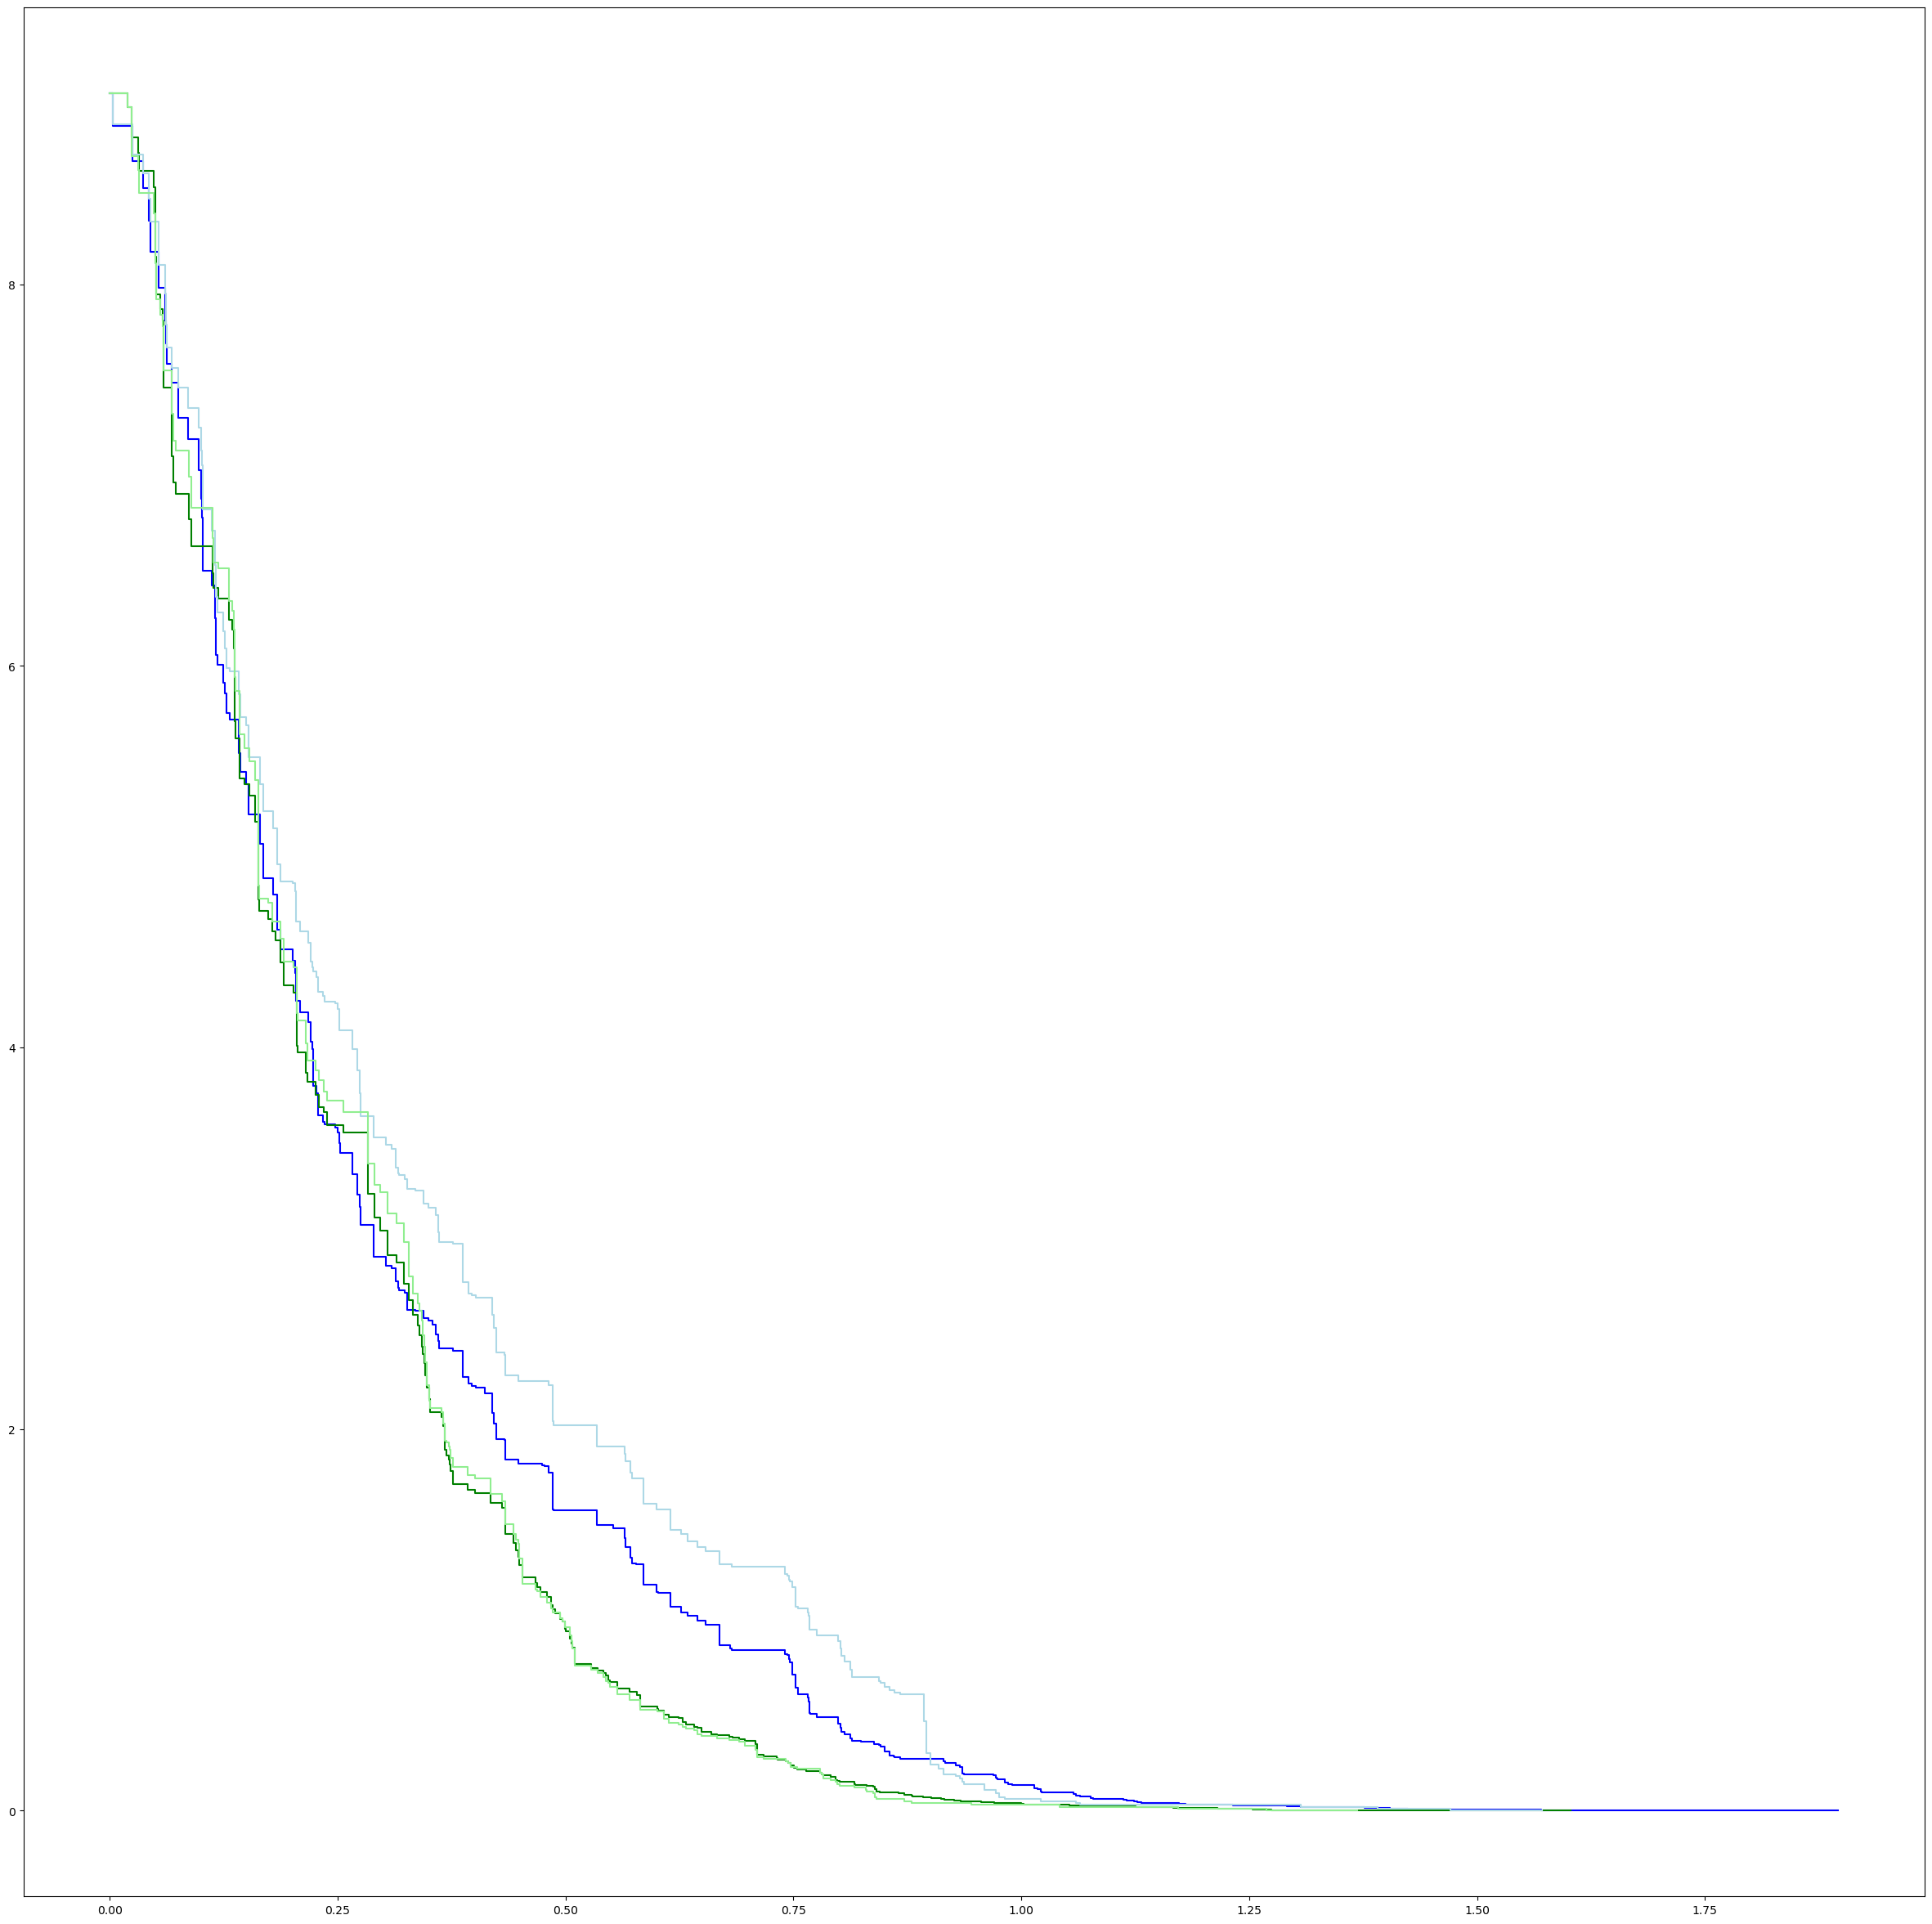

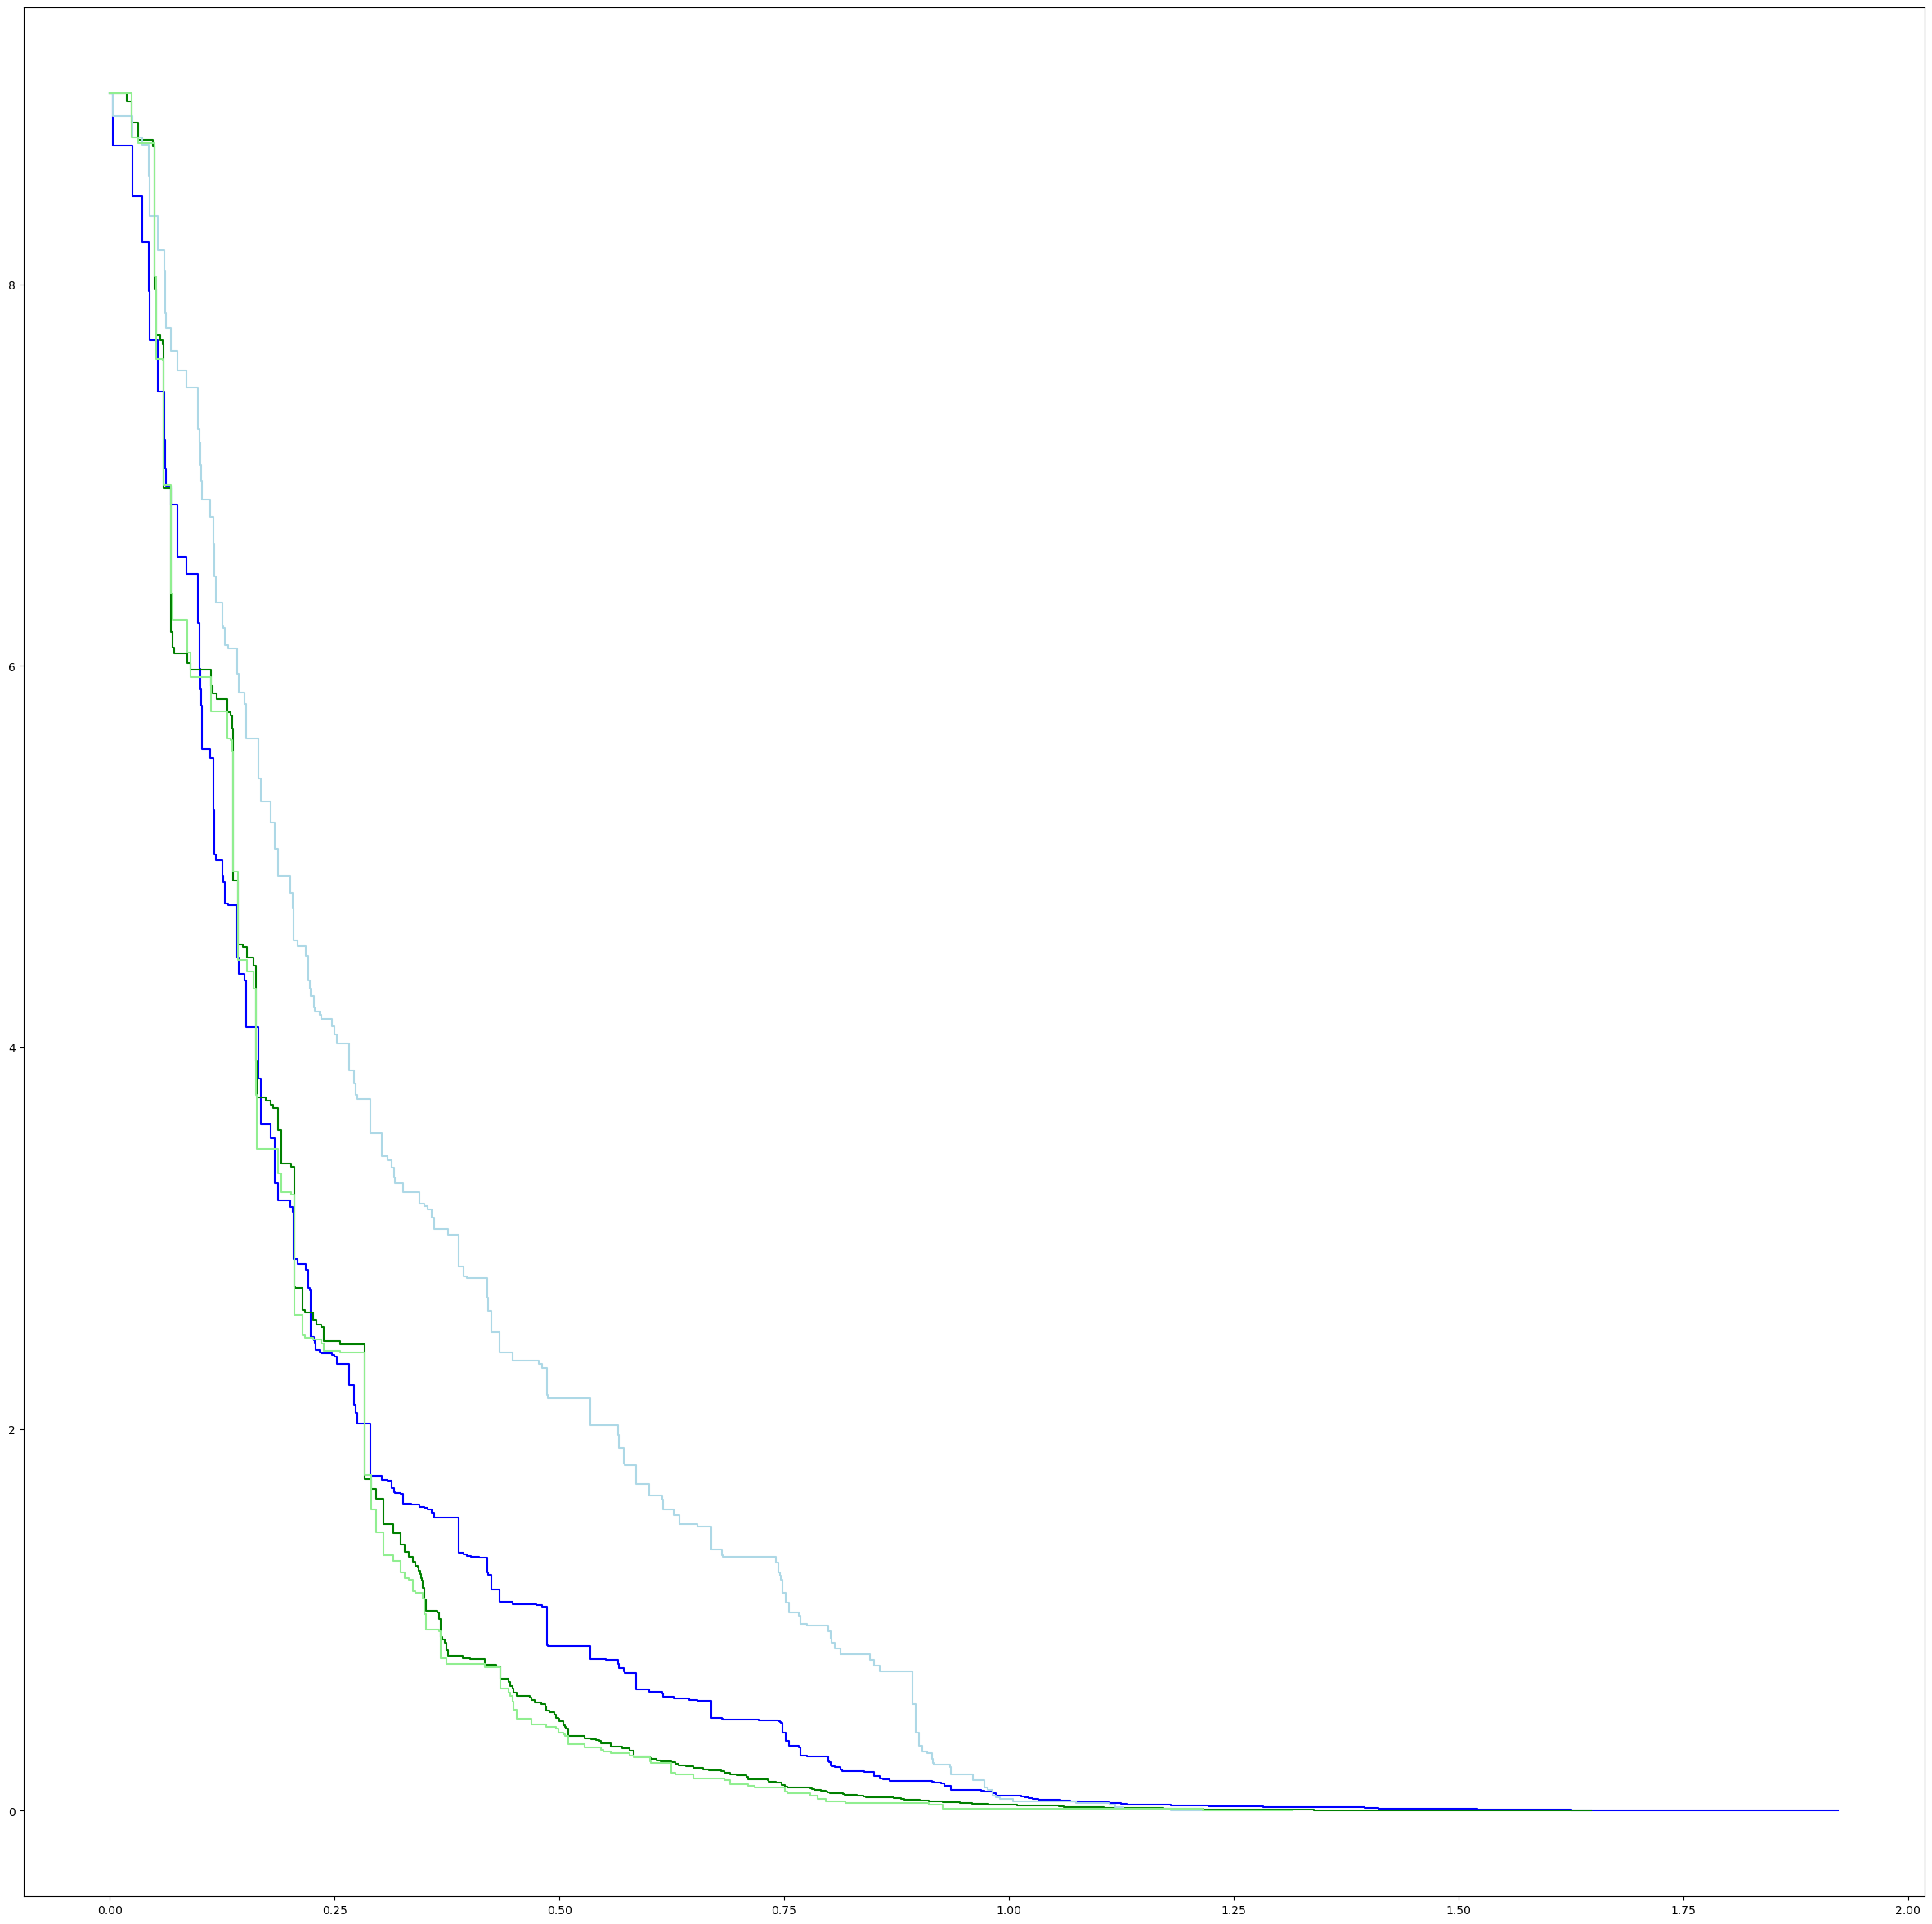

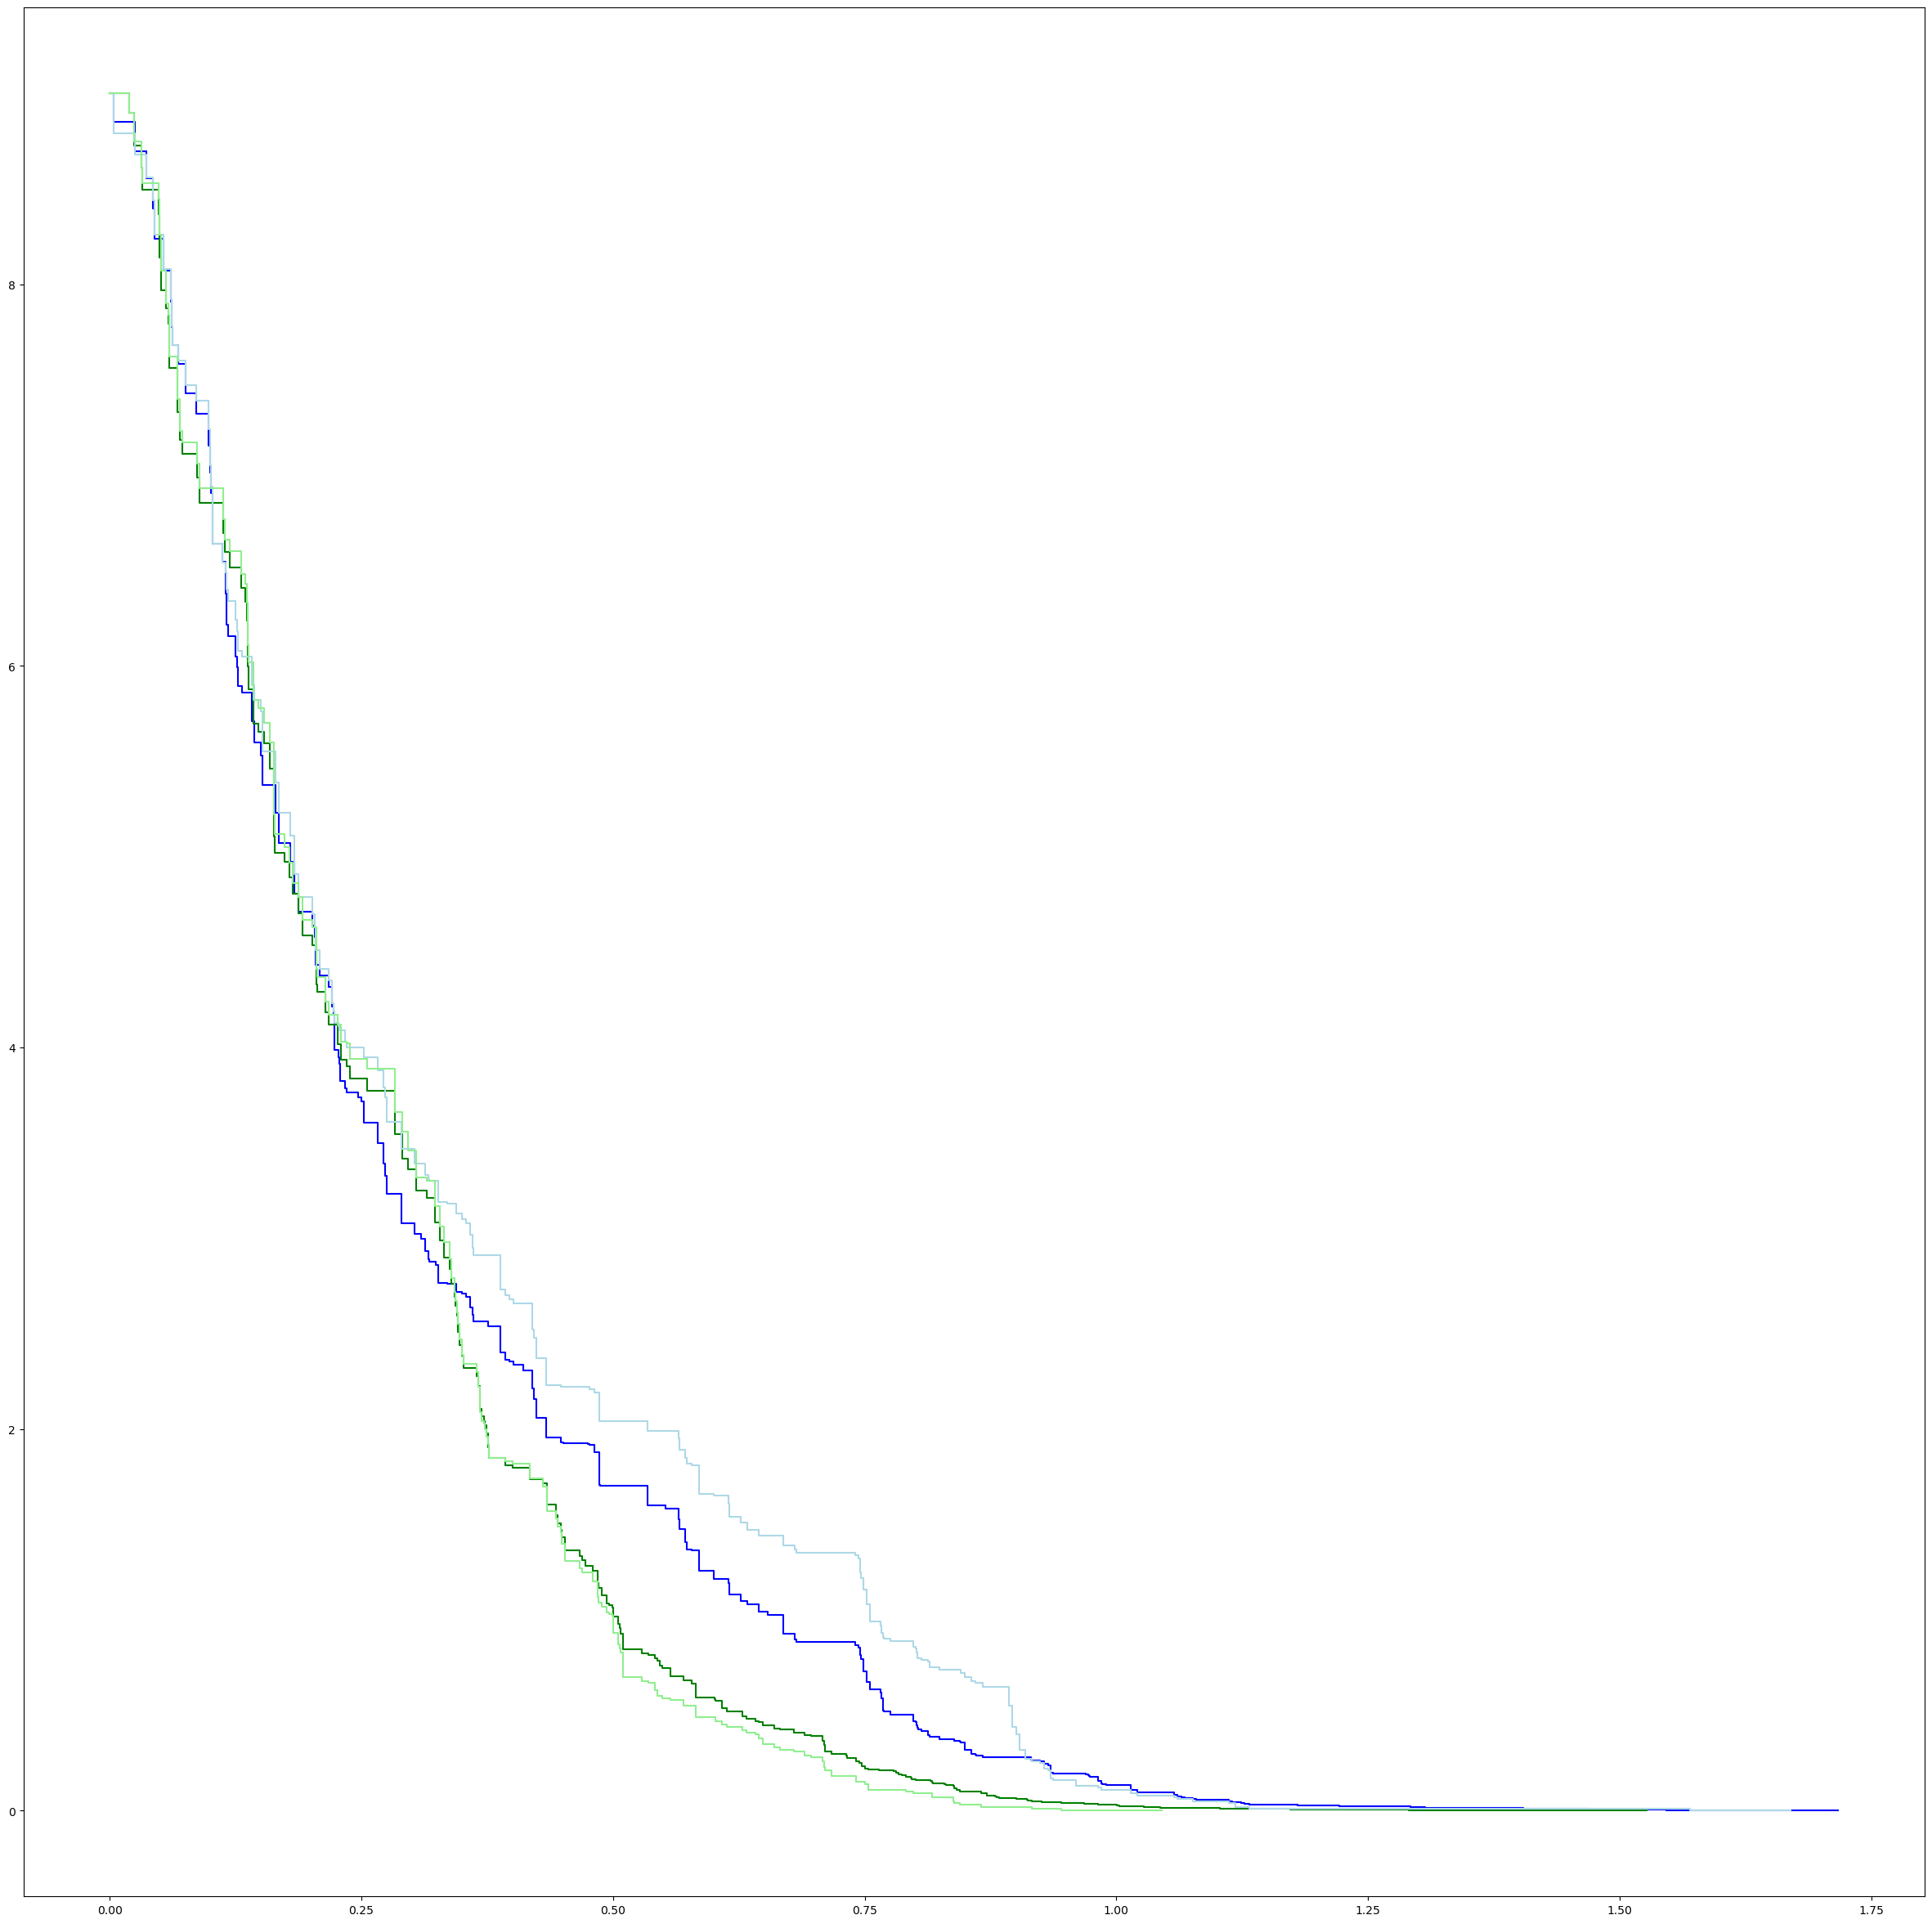

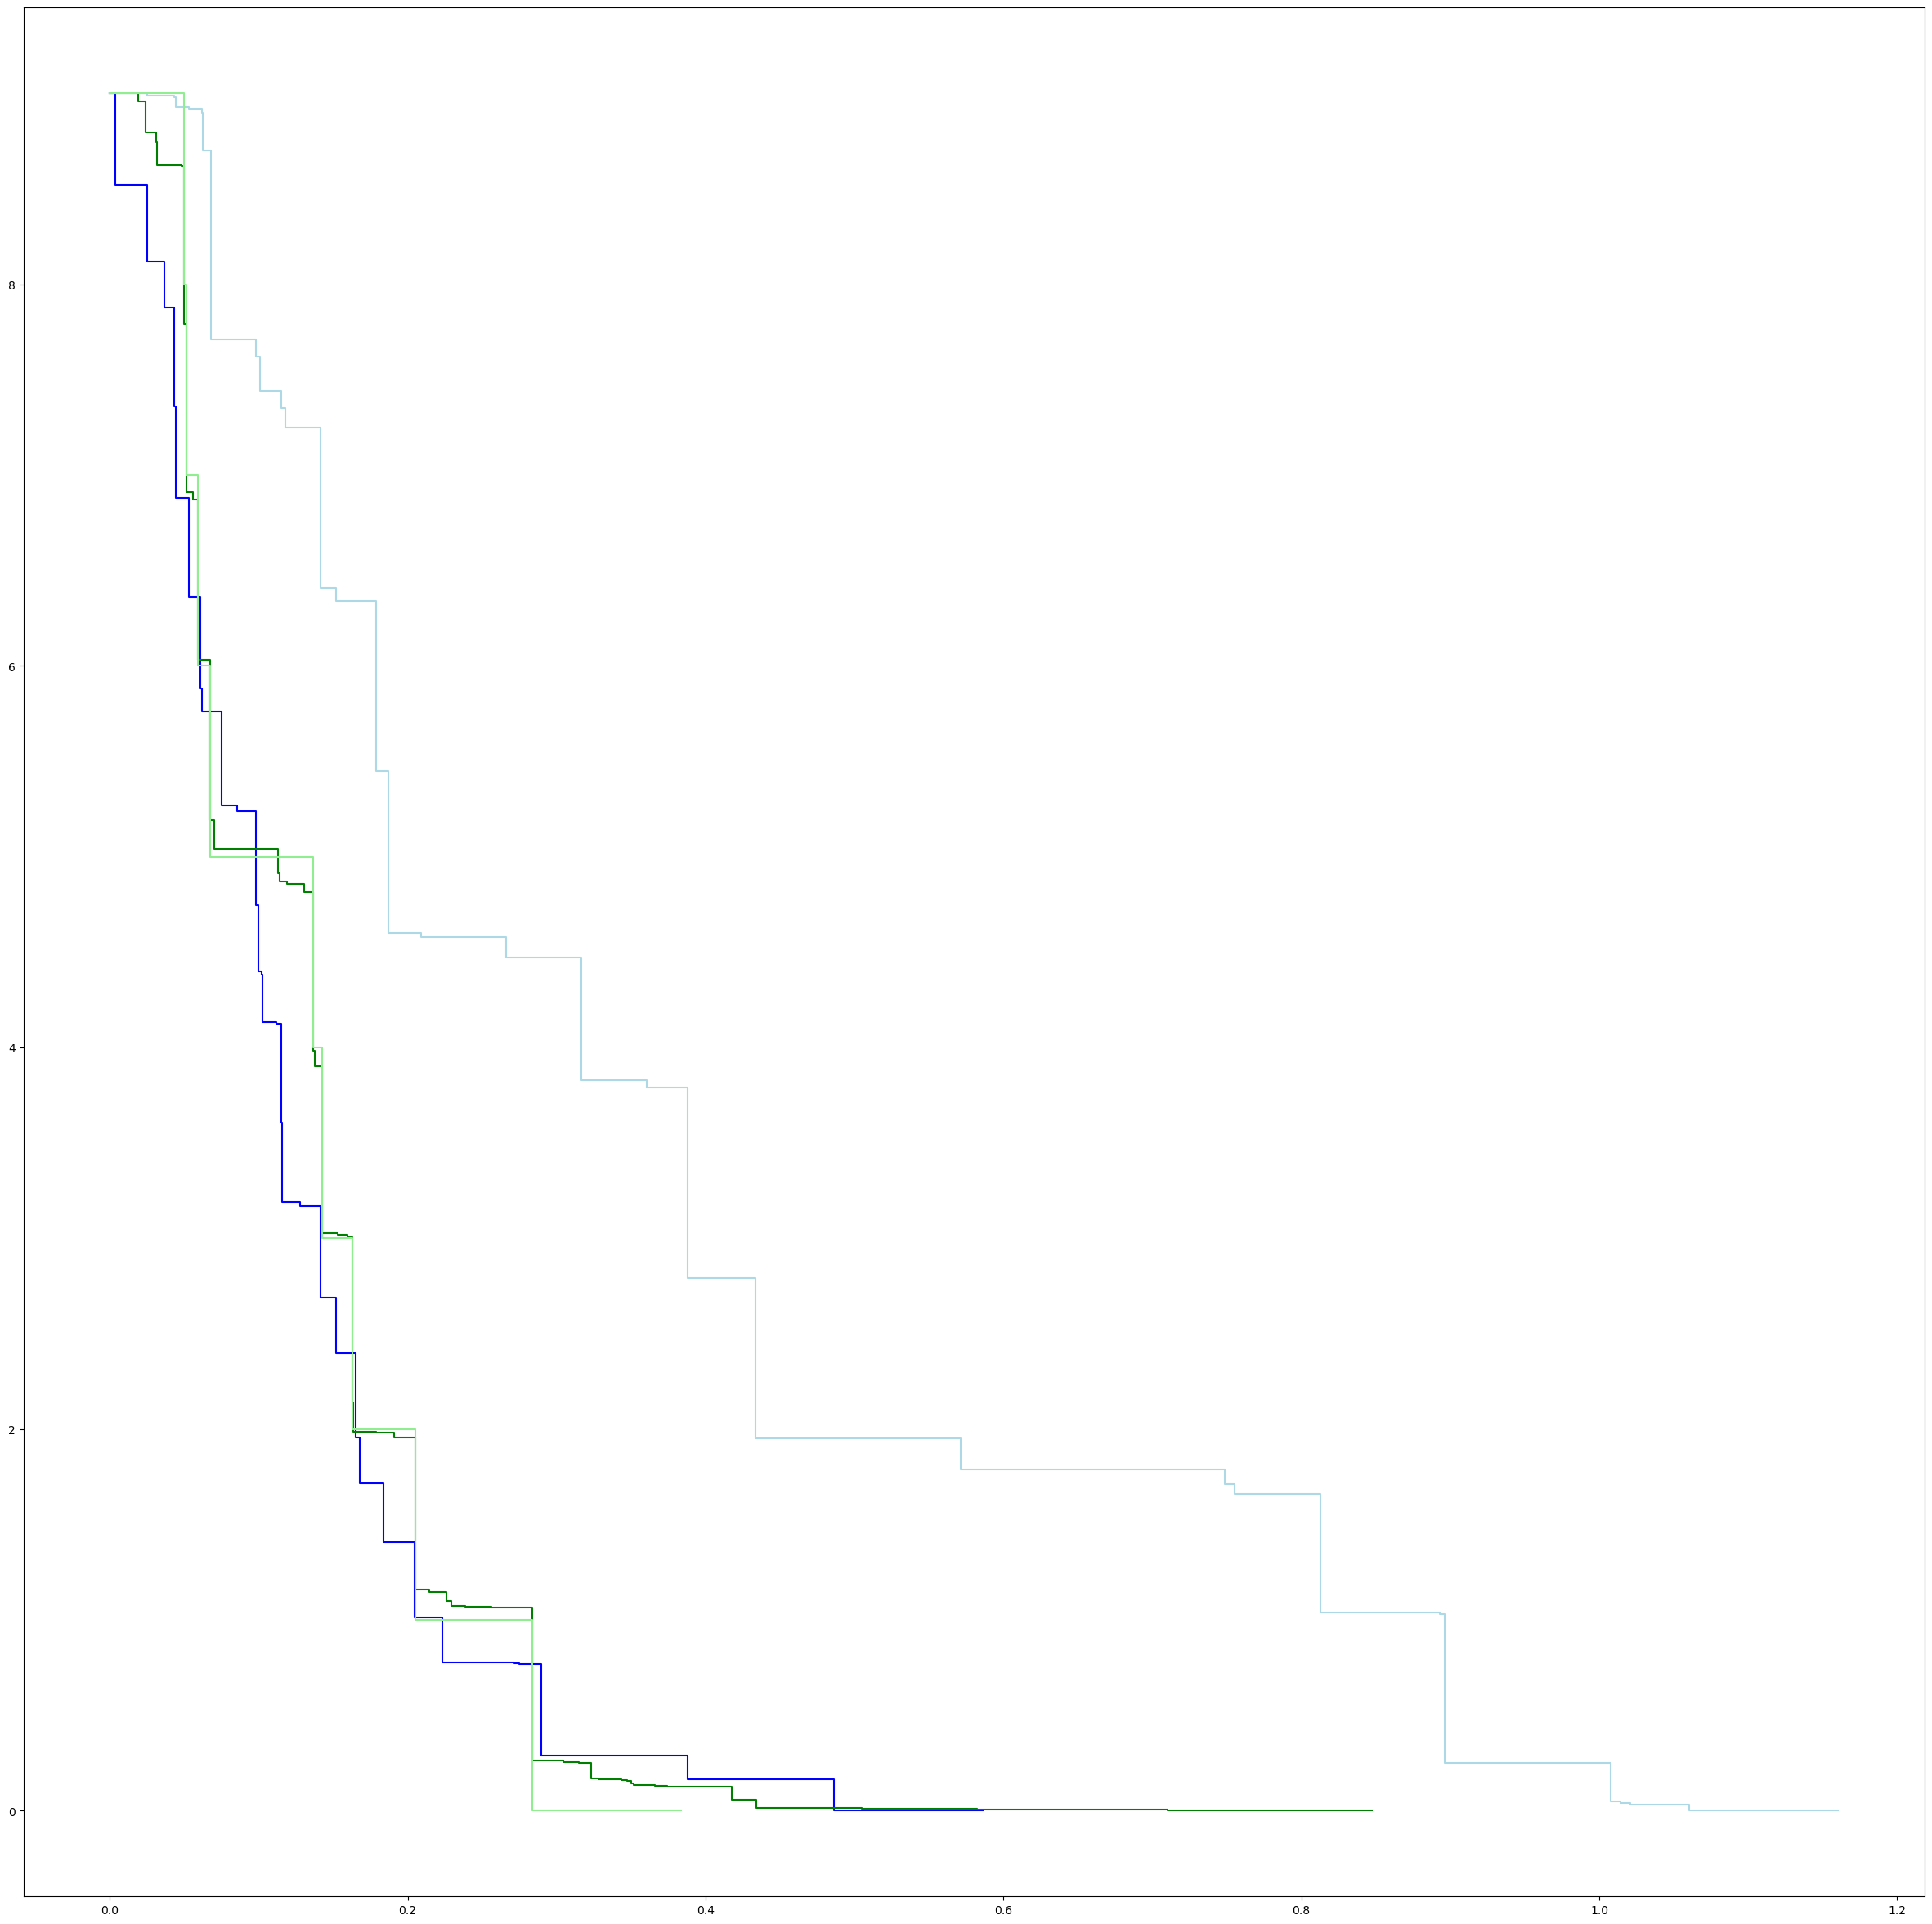

In [39]:
for k in distributions.keys():
    fig = plt.figure(k,figsize=(30,30))
    mh0_11[k].plot(color="blue")
    mh0_01[k].plot(color="green")
    mh0_11_p[k].plot(color="#ADD8E6")
    mh0_01_p[k].plot(color="#90EE90")

In [55]:
clase=analizar_punto_stable_rank(X_unlabeled[0],ceros_toy,unos_toy,mh0_00,mh0_11,mh0_01,mh0_10,mh1_00,mh1_11,mh1_01,mh1_10,distributions,number_instances,sample_size,clustering_method="complete")

0:00:02.362333
{'N1': [<stablerank.rtorf.Pcnif object at 0x0000023BE9FEDAD0>], 'N2': [<stablerank.rtorf.Pcnif object at 0x0000023BE1AAF890>], 'N3': [<stablerank.rtorf.Pcnif object at 0x0000023BE9CF2F10>], 'N4': [<stablerank.rtorf.Pcnif object at 0x0000023BDDB02D50>]}
{'N1': [<stablerank.rtorf.Pcnif object at 0x0000023BEA2D9590>], 'N2': [<stablerank.rtorf.Pcnif object at 0x0000023BE9CF3E50>], 'N3': [<stablerank.rtorf.Pcnif object at 0x0000023BEA2E5650>], 'N4': [<stablerank.rtorf.Pcnif object at 0x0000023BEA2E4990>]}


In [56]:
clase

{'N1': 0, 'N2': 0, 'N3': 0, 'N4': 0}